Žana Bogetić

<h1><center> </center></h1>

<center>

# **PROCJENA CIJENA DIONICA**

<center>
                                                      

#Učitavanje podataka

Bavit ćemo se procjenom cijena dionice tvrtke Schlumberger Limited (SLB).

Povijesni podatci su od 01.01.2010. do i 1.12.2023. godine te su preuzeti s
yahoo finance:

https://finance.yahoo.com/quote/SLB/history?period1=1262304000&period2=1701475200&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true

In [ ]:
# imports

import pandas as pd
import numpy as np
import math

from datetime import datetime

import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [ ]:
SLB_dataset = pd.read_csv("SLB.csv")
SLB_dataset.shape

(3503, 7)

Skup podataka za dionicu SLB sadrži:

* **date** - datum trgovanja
* **open** - cijena dionice pri otvaranju tržista
* **close** - cijena pri zatvaranju tržista
* **high** - najviša cijena toga dana
* **low** - najniža cijena tog dana
* **adj close** - prilagođena završna cijena dionice (uzima u obzir usitnjavanje dionica, isplate dividendi i razne druge korporativne akcije)
* **volume** - vlumen trgovanja (broj dionica kojim se trgovalo na burzi tog dana)

In [ ]:
SLB_dataset.head()

Date       Open       High        Low      Close  Adj Close    Volume
0  2010-01-04  66.389999  67.199997  66.120003  67.110001  48.436951   5771300
1  2010-01-05  66.989998  67.620003  66.730003  67.300003  48.574089   7365300
2  2010-01-06  67.169998  68.940002  67.029999  68.800003  49.656719   9950000
3  2010-01-07  68.489998  69.809998  68.209999  69.510002  50.169178   7691900
4  2010-01-08  69.190002  72.000000  69.089996  70.650002  50.991962  13487200

In [ ]:
SLB_dataset.tail()

Date       Open       High        Low      Close  Adj Close  \
3498  2023-11-27  52.480000  52.639999  51.750000  52.549999  52.297501   
3499  2023-11-28  52.700001  52.869999  52.160000  52.310001  52.058655   
3500  2023-11-29  52.700001  52.759998  51.480000  51.869999  51.620770   
3501  2023-11-30  52.580002  53.400002  51.549999  52.040001  51.789955   
3502  2023-12-01  51.980000  53.090000  51.730000  52.389999  52.138271   

        Volume  
3498   6371200  
3499   5620900  
3500   8002000  
3501  11520300  
3502   6377200

Stupac Date trenutno koristi stringove za datume trgovanja. Da bismo olakšali analizu i manipulaciju vremenima, promijenimo tip podatka u Pandas Timestamp.

In [ ]:
type(SLB_dataset['Date'] [0])

str

In [ ]:
SLB_dataset['Date'] = pd.to_datetime(SLB_dataset['Date'])

In [ ]:
type(SLB_dataset['Date'] [0])

pandas._libs.tslibs.timestamps.Timestamp

#Vrijednosti koje nedostaju

In [ ]:
SLB_dataset.isna().sum().sum()

0

Nema nedostajućih vrijednosti.

#Eksplorativna analiza podataka (EDA) i vizualizacija

In [ ]:
print("Početni dan promatranja: ", SLB_dataset.iloc[0,0])
print("Zadnji dan promatranja: ", SLB_dataset.iloc[-1,0])
print("Razdoblje promatranja: ", SLB_dataset.iloc[-1,0] - SLB_dataset.iloc[0,0])

Početni dan promatranja:  2010-01-04 00:00:00
Zadnji dan promatranja:  2023-12-01 00:00:00
Razdoblje promatranja:  5079 days 00:00:00


## Grafikon japanskih svijeća

Grafički prikaz s japanskim svijećama najčešći je oblik grafičkog prikaza kretanja cijena dionica, a razlog tome je mogućnost prikaza sve četiri razine cijena (open, high, low i close) u danom vremenskom razdoblju.

In [ ]:
# Widget za odabir godine
import ipywidgets as widgets
year_dropdown = widgets.Dropdown(options=list(range(2010, 2024)), value=2023, description='Select Year:')
display(year_dropdown)

Dropdown(description='Select Year:', index=13, options=(2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, …

In [ ]:
#prikaz kretanja cijena kroz odabranu godinu
SLB_dataset_god=SLB_dataset[SLB_dataset['Date'].dt.year==year_dropdown.value] #izdvojimo samo odabranu godinu

import plotly.graph_objects as go
SLB_dataset_god.set_index(pd.DatetimeIndex(SLB_dataset_god["Date"].values))

fig = go.Figure(data=[go.Candlestick(x=SLB_dataset_god['Date'],
                open=SLB_dataset_god['Open'],
                high=SLB_dataset_god['High'],
                low=SLB_dataset_god['Low'],
                close=SLB_dataset_god['Close'])])

fig.update_layout(title= f"Kretanje cijena dionice kroz {year_dropdown.value}-u godinu")
fig.show()

## Linijski grafikon

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets
import datetime

#postavljanje  widgeta za interaktivno podešavanje vremenskog raspona i odabir stupaca (open, high, low i close)

#vremenski raspon
date_picker_start = widgets.DatePicker(value=SLB_dataset["Date"].min(), description='Datum početka:')
date_picker_end = widgets.DatePicker(value=SLB_dataset["Date"].max(), description='Datum završetka:')

#odabir stupaca
odabrani_stupci=['Open', 'High', 'Low', 'Close']
multi_selection = widgets.SelectMultiple(options=odabrani_stupci, value=[odabrani_stupci[0]], description='Stupci:')


#funkcija za crtanje grafa i interaktivno postavljanje vremenskog raspona i odabira stupaca
def plot_columns(date_start, date_end, selected_columns):

    if isinstance(date_start, datetime.date):
      date_start = pd.Timestamp(date_start)

    if isinstance(date_end, datetime.date):
      date_end = pd.Timestamp(date_end)

    if date_start > date_end:
      print("Datum kraja je oznacen prije datuma pocetka! Korigirajte redosljed datuma.")
      return

    elif date_start<SLB_dataset["Date"].min():
      print()
      print("Unesen je datum koji prethodi prvom datumu koji je uzet u razmatranje!")
      return

    elif date_end>SLB_dataset["Date"].max():
      print()
      print("Unesen je datum nakon posljednjeg dana koji je uzet u razmatranje!")
      return

    else:
      plt.figure(figsize=(10, 6))
      for column in selected_columns:
        plt.plot(SLB_dataset["Date"], SLB_dataset[column], label=column)
      df_filtered = SLB_dataset[(SLB_dataset["Date"] >= date_start) & (SLB_dataset["Date"] <= date_end)]
      ylim_min = df_filtered[selected_columns[0]].values.min()
      ylim_max = df_filtered[selected_columns[0]].values.max()

      plt.xlabel('Vrijeme')
      plt.ylabel('Cijena')
      plt.legend()
      plt.title('Graf mijenjanja cijene dionice SLB kroz vrijeme')

      #raspon na osima
      plt.xlim(date_start, date_end)
      plt.ylim(ylim_min, ylim_max)
      plt.show()

#stvaranje interaktivne funkcije
interact(plot_columns, date_start=date_picker_start, date_end=date_picker_end, selected_columns=multi_selection)

interactive(children=(DatePicker(value=Timestamp('2010-01-04 00:00:00'), description='Datum početka:'), DatePi…

<function __main__.plot_columns(date_start, date_end, selected_columns)>

/usr/local/lib/python3.10/dist-packages/traitlets/traitlets.py:711: FutureWarning:

Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.



# Osnove trgovanja dionicama (Basic Stock Trading)

Osnovni protokoli kupnje i prodaje:

- Kupi ako cijena dionice raste b  uzastopnih dana --> jer se nadamo da će i dalje rasti

- Prodaj ako se cijena dionice smanjuje s uzastopnih dana (i mi smo ostvarili dobit tj. kupili smo je po manjoj cijeni nego što je prodajemo)     --> jer mislimo da će nastaviti padati

In [ ]:
SLB_dataset_Open=SLB_dataset[["Date","Open"]]
SLB_dataset_Open= SLB_dataset_Open.set_index('Date')
SLB_dataset_Open.head()

Open
Date                 
2010-01-04  66.389999
2010-01-05  66.989998
2010-01-06  67.169998
2010-01-07  68.489998
2010-01-08  69.190002

In [ ]:
def get_buying_selling_days(price_data, b, s): #b = broj uzastopnih dana za koje zahtjevamo rast cijene dionice
                                               #s = broj uzastopnih dana za koje zahtjevamo pad cijene dionice

    #postotna promjena cijene dionice dan za danom
    pct_change = price_data.pct_change()[1:] # (cijena_danas - cijena_jucer)/cijena_jucer


    #definiramo funkciju koja provjerava uvjete kupnje dionice
    def buying_condition(sub_series):
        return (sub_series > 0).all()

    #definiramo funkciju koja provjerava uvjete prodaje dionice
    def selling_condition(sub_series):
        return (sub_series < 0).all()


    #dohvacanje svih dana kada cemo kupovat dionice iz skupa podataka
    buying_days = pct_change.rolling(b).apply(buying_condition) #na svako b podataka primjenjujemo funkciju buying_condition


    #dohvacanje svih potencijalnih dana kada cemo prodavat dionice iz skupa podataka
    potential_selling_days = pct_change.rolling(s).apply(selling_condition)

    #funkcija ce vracat rjecnik
    return {'buying_days': buying_days, 'potential_selling_days': potential_selling_days}

Pogledajmo hoćemo li koristeći ovaj osnovni model  uspijeti nešto zaraditit ulažući 1000$ kroz 2023. godinu kupovinom dionice kada cijena raste 5 uzastopnih dana i prodajom dionice kada cijena pada 2 dana (pazeći pri tome da prodajemo po većoj cijeni nego po kojoj smo kupili).

In [ ]:
SLB_dataset_Open_od_2023=SLB_dataset_Open[SLB_dataset_Open.index.year==2023]

In [ ]:
info_dict_od_2023 = get_buying_selling_days(SLB_dataset_Open_od_2023, 5, 2)

In [ ]:
buying_days_od_2023 = info_dict_od_2023['buying_days']                       #na dan kupnje vrijednost je 1, a 0 kada nije
potential_selling_days_od_2023 = info_dict_od_2023['potential_selling_days'] #na potencijalni dan prodaje vrijednost je 1, a 0 kada nije

In [ ]:
#sacuvajmo te informacije u DataFrame-u
df_stocks_od_2023 = pd.DataFrame(index = buying_days_od_2023.index)

df_stocks_od_2023['buying_day'] = (buying_days_od_2023 == 1)
df_stocks_od_2023['potential_selling_day'] = (potential_selling_days_od_2023 == 1)
df_stocks_od_2023['price'] = SLB_dataset_Open_od_2023

#zadrzimo samo one dane kada kupujemo ili potencijalno prodajemo
df_stocks_od_2023 = df_stocks_od_2023[(df_stocks_od_2023.buying_day | df_stocks_od_2023.potential_selling_day)]

In [ ]:
df_stocks_od_2023.head(7)

buying_day  potential_selling_day      price
Date                                                    
2023-01-11        True                  False  55.950001
2023-01-12        True                  False  56.230000
2023-01-13        True                  False  57.990002
2023-01-17        True                  False  58.150002
2023-01-18        True                  False  58.939999
2023-01-31       False                   True  56.279999
2023-02-03       False                   True  52.820000

In [ ]:
from datetime import datetime, timedelta

#definirajmo pomocnu funkciju koja prima 3 argumenta cijenu dionice, dan kada smo kupili dionicu i potencijalni dan prodaje
#a vraca True ako smo ostvarili profit i False ako nismo
def check_cumulative_percent_change(price_data, buy_date, potential_sell_date):

    #postotna promjena cijene dionice dan za danom
    pct_change = price_data.pct_change()[1:]

    #uzimamo samo postotne promjene cijene dionice od trenutka kupovine (buy_date + timedelta(hours=1)) do potencijalnog datuma prodaje (potential_sell_date)
    sub_series = 1 + pct_change[buy_date + timedelta(hours=1): potential_sell_date]

    return sub_series.product() > 1 #vraca True ako smo ostvarili profit i False ako nismo
                                    #npr. vidimo da 2023-01-11	kupujemo 17 dionica za $55.950001 po dionici,
                                    #a 2023-01-31 prodajemo za $56.279999 po dionici
                                    #bitno nam je da ostvarimo profit sta ovde stvarno i jesmo

In [ ]:
def get_investing_result(df_stocks, starting_funds, verbose=False):


    price_data = df_stocks.price

    #inicijalizacija varijabli
    holding = False                #u pocetku nemamo dionicu
    current_funds = starting_funds #na pocetku imamo novaca koliko smo ulozili
    current_shares = 0
    last_buy_date = None
    events_list = []               #rjecnik u koji cemo spremati datume kada kupujemo i prodajemo dionice

    #for petljom idemo po svim datumima kada kupujemo ili potencijalno prodajemo
    for date,data in df_stocks.iterrows():

        #ako nemamo dionice i dan je kupnje onda kupujemo dionice
        if (not holding) and data.buying_day:

            #racunamo koliko dionica mozemo kupiti
            num_shares_to_buy = int(current_funds / data.price)

            #koliko sada imamo dionica(jer smo odredeni broj dionica kupili)
            current_shares += num_shares_to_buy

            #koliko sada imamo novaca(potrosili smo nesto novaca jer smo kupili odredeni broj dionica)
            current_funds -= num_shares_to_buy * data.price


            last_buy_date = date             #sada ce to biti zadnji dan kupnje
            events_list.append(('b', date))  #zbog crtanja

            holding = True                  #sada posjedujemo dionice

            if verbose: #ako smo u funkciji postavili parametar da zelimo ispis
                print('Kupili smo %s dionica po $%s na datum %s. Ulozeno/dobiveno: $%s'%(num_shares_to_buy, data.price, date.date(), round(num_shares_to_buy*data.price,2)))

        #ako posjedujemo dionice i potencijalni dan je prodaje
        elif holding and data.potential_selling_day:

            #uz pomoc funkcije check_cumulative_percent_change provjeravamo imamo li profit
            if check_cumulative_percent_change(price_data, last_buy_date, date): #ako smo ostvarili profit prodajemo

                current_funds += current_shares * data.price #zarada je: koliko imamo dionica * cijena jedne dionice

                if verbose:
                    print('Prodali smo %s dionica po $%s na datum %s. Ulozeno/dobiveno:  $%s'%(current_shares, data.price, date.date(), round(num_shares_to_buy*data.price,2)))
                    print('---------------------------------------------------------------------------------------')

                current_shares = 0 #sada vise nemamo dionoca(jer mi cijelo vrijeme kupujemo ili prodajemo SVE dionice)
                holding = False

                events_list.append(('s', date))


    final_stock_price = price_data[-1] #cijena dionice na kraju vremenskog raspona

    #na kraju  vrijednost koju imamo (iznos zaraden prodajom i kupovinom  i vrijednost dionica koje jos posjedujemo(ako ih posjedujemo))
    final_value = current_funds + final_stock_price * current_shares

    #vraca postonu promjenu  i listu dogadaja tj listu sacinjenu od toga jesmo li kupili/prodali
    return round((final_value - starting_funds) / starting_funds,4), events_list

In [ ]:
percent_change_od_2023, events_list_od_2023 = get_investing_result(df_stocks_od_2023, 1000, True)

Kupili smo 17 dionica po $55.950001 na datum 2023-01-11. Ulozeno/dobiveno: $951.15
Prodali smo 17 dionica po $56.279999 na datum 2023-01-31. Ulozeno/dobiveno:  $956.76
---------------------------------------------------------------------------------------
Kupili smo 17 dionica po $55.900002 na datum 2023-02-13. Ulozeno/dobiveno: $950.3
Prodali smo 17 dionica po $56.0 na datum 2023-02-16. Ulozeno/dobiveno:  $952.0
---------------------------------------------------------------------------------------
Kupili smo 20 dionica po $49.0 na datum 2023-06-30. Ulozeno/dobiveno: $980.0
Prodali smo 20 dionica po $56.619999 na datum 2023-07-17. Ulozeno/dobiveno:  $1132.4
---------------------------------------------------------------------------------------
Kupili smo 19 dionica po $60.200001 na datum 2023-09-05. Ulozeno/dobiveno: $1143.8
Prodali smo 19 dionica po $61.060001 na datum 2023-09-15. Ulozeno/dobiveno:  $1160.14
----------------------------------------------------------------------------

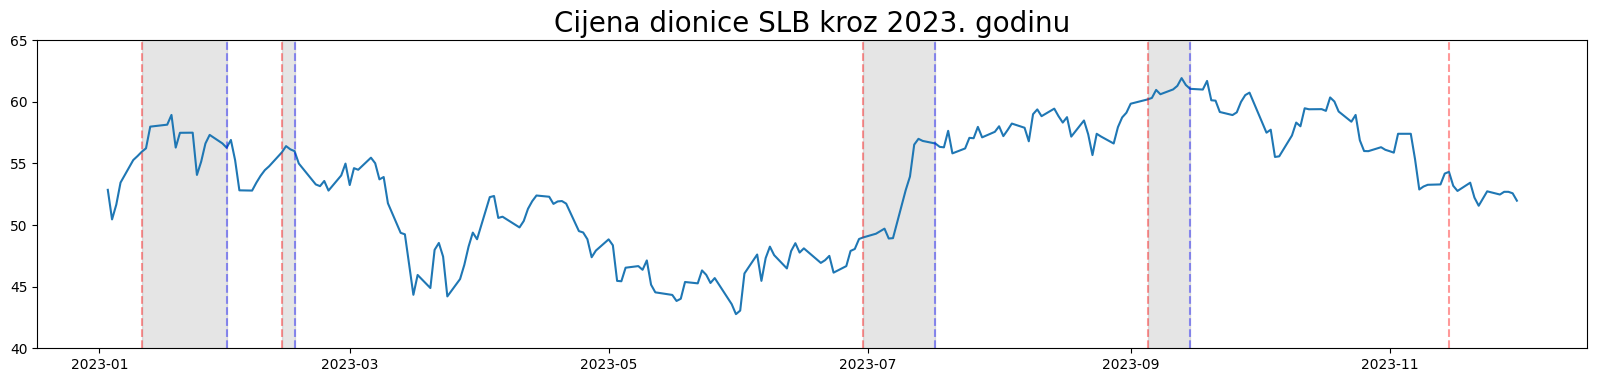

In [ ]:
plt.figure(figsize=(20,4))
plt.plot(SLB_dataset_Open_od_2023)

y_lims = (int(SLB_dataset_Open_od_2023.min()*.95), int(SLB_dataset_Open_od_2023.max()*1.05))
shaded_y_lims = int(SLB_dataset_Open_od_2023.min()*.5), int(SLB_dataset_Open_od_2023.max()*1.5)

for idx, event in enumerate(events_list_od_2023):
    color = 'red' if event[0] == 'b' else 'blue'         #crvena linija je kada kupujemo,a plava koja slijedi odmah nakon crvene je kada prodajemo
    plt.axvline(event[1], color=color, linestyle='--', alpha=0.4)
    if event[0] == 's':
        plt.fill_betweenx(range(*shaded_y_lims), event[1], events_list_od_2023[idx-1][1], color='k', alpha=0.1) #sivo je vrijeme drzanja(razdoblje izmedu kupnje i prodaje)

plt.title("Cijena dionice SLB kroz 2023. godinu" ,fontsize=20)
plt.ylim(*y_lims)
plt.show()

In [ ]:
print(percent_change_od_2023)

0.1269


U ovom periodu nas inicijalni ulog od 1000\$ je porastao za $12.69\% $. \
Možemo primjetiti da  smo 15.11.2023. kupili 21 komad dionica, ali ih nismo prodali jer smo zahtjevali da je prodajna cijena veća od kupovne.


Zanima nas možemo li predvidjeti što će biti s cijenom dionice tvrtke Schlumberger Limited (SLB) u budućnosti i cilj ovog rada  je pokazati je li to moguće i ako je, koliko je isplativo.

#Što ćemo predviđati?

Predvidljivost događaja ili količine ovisi o nekoliko čimbenika uključujući:

* koliko dobro razumijemo čimbenike koji tome pridonose
* koliko podataka je dostupno
* koliko je budućnost slična prošlosti
* mogu li prognoze utjecati na stvar koju pokušavamo prognozirati


Kod prognoziranja cijena dionice zadovoljen je samo jedan od uvjeta, a to je da postoji obilje dostupnih podataka.


Imamo ograničeno razumijevanje čimbenika koji utjeću na cijenu dionice, budućnost može biti drugačija od prošlosti (ako dode do gospodarske ili političke krize, rata...), predviđanja cijena dionice ima izravan učinak na same cijene dionice. (Ako javno dostupni izvještaji sugeriraju da će cijena dionica rasti, to može potaknuti investitore da počnu kupovati dionice te tvrtke. Povečani interes za kupnju može rezultirati porastom cijene. Međutim, ako visoka cijena dionica dosegne razinu koja smanjuje opću potražnju, investitori mogu početi prodavati dionice, što može rezultirati padom cijene. Ova dinamika između ponude i potražnje često utječe na promjene u  cijenama dionica.)


Svako se okruženje mijenja, a dobar model predviđanja bilježi način na koji se stvari mijenjaju. Logično je pretpostaviti da će se način na koji se okolina mijenja nastaviti i u budućnosti. Vrlo nestabilno okruženje će i dalje biti vrlo nestabilno, dionica s fluktuirajućom cijenom i dalje će imati flukturirajuću cijenu...


 Dobra predviđanja hvataju prave obrasce i odnose koji postoje u povijesnim podatcima, ali ne ponavljaju događaje iz prošlosti koji se više neće dogoditi. Ako u povijesnim podatcima imamo znatne poraste  cijene dionice, model će ekstrapolirati znatne poraste i predvidjeti će znatne poraste i u budućnosti. Analogno, ako u povijesnim podatcima imamo neznatne poraste cijena dionice, model će ekstrapolirati te neznatne poraste i predvidjet će neznatne poraste u budućnosti.


Točnost samog modela ovisi o povijesnim podatcima. Pretpostavljamo da će se ciljana varijabla ponašati u budućnosti kako se ponašala u prošlosti.
Dakle, ako cijena dionice nije flukturirala u prošlosti očekujemo da neće ni u budućnosti. Ako se pak u nekom budućem vremenskom trenutku dogodi nagli porast/pad cijene dionice model to neće predvidjeti jer je istreniran na povijesnim podatcima u kojima se sa tim događajem nije susreo ili ga nije uzeo kao bitan događaj koji treba ekstrapolirati.




**Predviđat ćemo zaključnu cijenu dionice (close) SLB** jer se ona smatra najtočnijom procjenom dionice sve dok se trgovanje ne nastavi sljedeći dan.


**Napomena:**

Važno je istaknuti da zaključna cijena obično ne odražava nikakve vijesti koje je tvrtka objavila toga dana. U pravilu, informacije od velikih tvrtki o zaradama, podjelama dionica, dividendama... objavljuju se nakon završetka redovnog dana trgovanja. Ova praksa omogućuje trgovcima da imaju vremena za analizu vijesti prije donošenja bilo kakvih odluka.
Te vijesti obično izazivaju značajne fluktuacije cijena dionica izvan redovnih radnih sati. Takvo trgovanje obuhvaća manji volumen, ali objavljene vijesti mogu utjecati na početnu cijenu dionice sljedeći dan.

Za predviđanje ćemo odabrati **time series modele** jer:
* ne razumijemo koje varijable utječu na zaključnu cijenu (stoga ne znamo njihove vrijednosti u prošlosti, a onda njihove vrijednosti  ne znamo ni predvidjeti u budućnosti)
* samo nas zanima hoće li zaključna cijena rasti ili padati (ne zanimaju nas razlozi)



In [ ]:
SLB_dataset_Close=SLB_dataset[["Date","Close"]]
SLB_dataset_Close= SLB_dataset_Close.set_index('Date')
SLB_dataset_Close.head()

Close
Date                 
2010-01-04  67.110001
2010-01-05  67.300003
2010-01-06  68.800003
2010-01-07  69.510002
2010-01-08  70.650002

# EDA i vizulalizacija završne cijene

Prikažimo kretanje završne cijene dionice SLB kroz promatrano vrijeme.

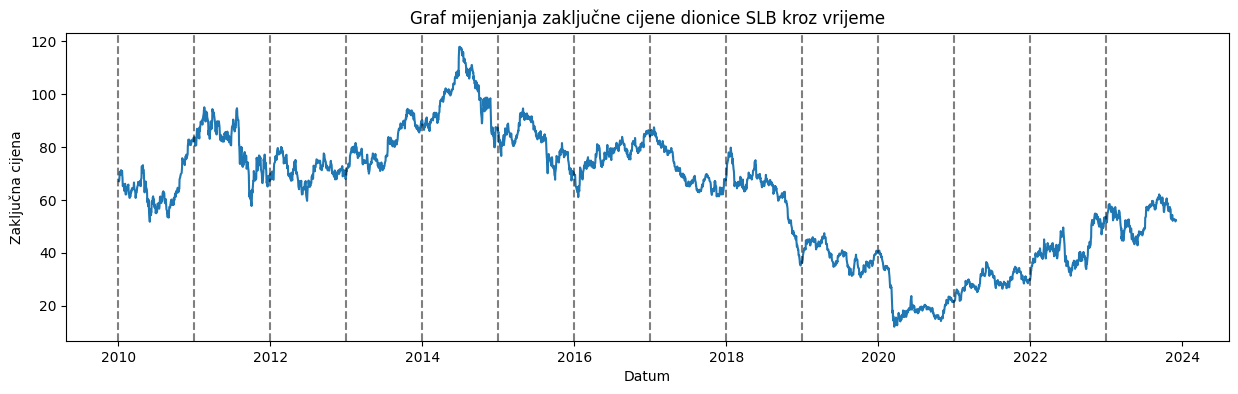

In [ ]:
plt.figure(figsize=(15,4))
plt.plot(SLB_dataset_Close)
plt.title("Graf mijenjanja zaključne cijene dionice SLB kroz vrijeme")
plt.xlabel("Datum")
plt.ylabel("Zaključna cijena")

from datetime import datetime
for year in range(2010,2024):
  plt.axvline(datetime(year,1,1), color='k', linestyle='--', alpha=0.5)

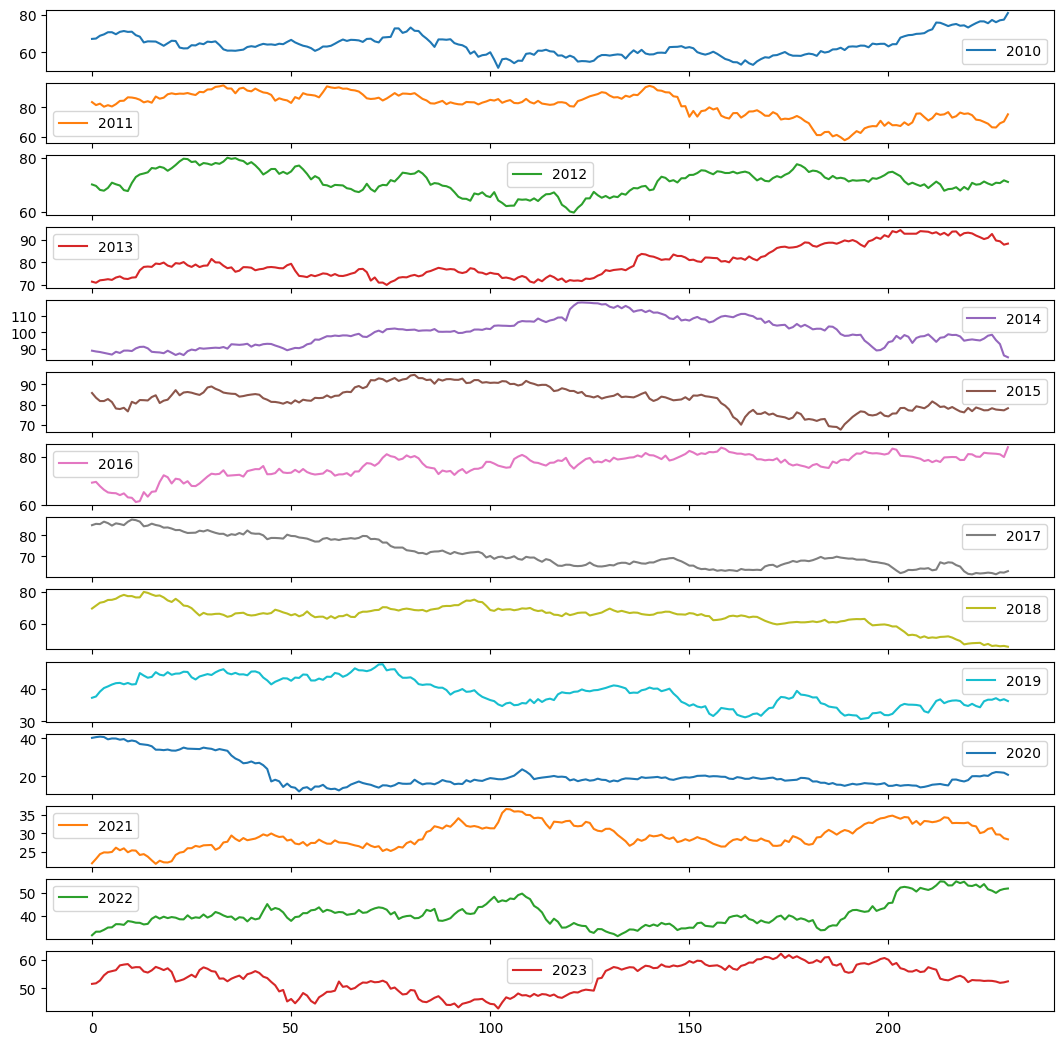

In [ ]:
#Godišnje kratanje cijene dionice

god_grupe = SLB_dataset_Close.groupby(pd.Grouper(freq ='A')) #grupiranje podataka po godinama

#u close_po_godinama spremat cemo godisnje vrijednosti close cijene po stupcima
close_po_godinama = pd.DataFrame()

for datum, grupa in god_grupe:
    #print(yr.year)
    close_po_godinama = close_po_godinama.reindex(range(len(grupa)))
    close_po_godinama[datum.year] = grupa.values.ravel()

close_po_godinama.plot(figsize = (13,13), subplots=True, legend=True )
plt.show()

Za svaku promatranu godinu prikaz kretanja cijena dionica na jednom grafu.

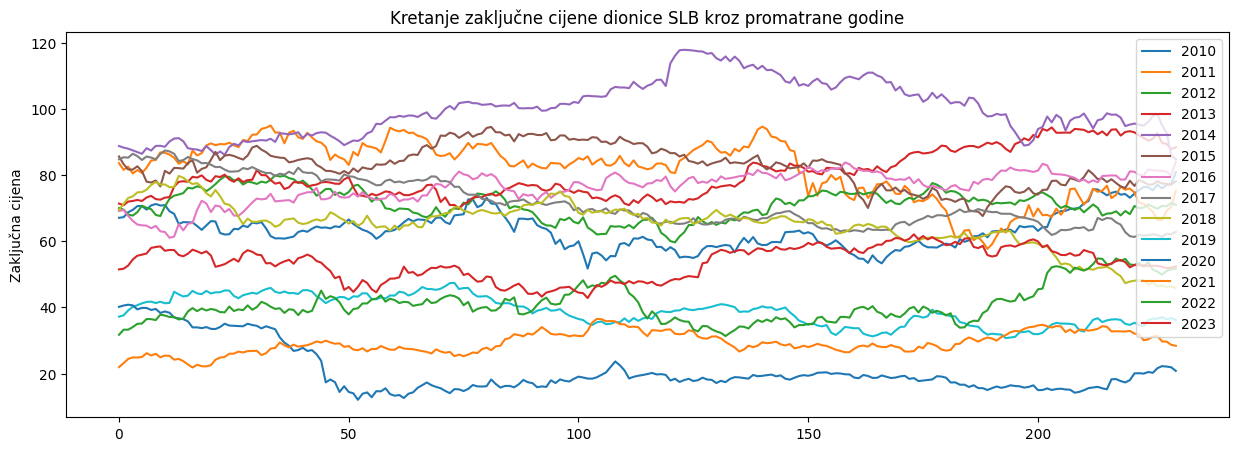

In [ ]:
close_po_godinama.plot(figsize = (15,5), subplots=False, legend=True)
plt.title("Kretanje zaključne cijene dionice SLB kroz promatrane godine")
plt.ylabel("Zaključna cijena")
plt.show()

##distribucija

Distribucija podataka

Jesu li podatci o završnoj cijeni normalno distribuirani?

Ta informacija nam je bitna kako bi znali možemo li određene  statističke metode primijeniti.

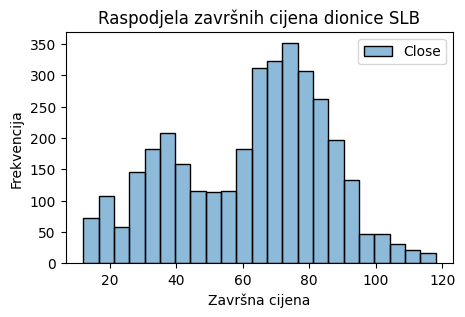

In [ ]:
fig = plt.figure(figsize=(5,3))
sns.histplot(SLB_dataset_Close)
plt.title("Raspodjela završnih cijena dionice SLB")
plt.xlabel("Završna cijena")
plt.ylabel("Frekvencija")
plt.show()

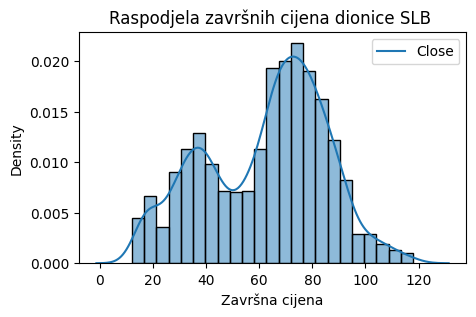

In [ ]:
fig, axes = plt.subplots(figsize=(5, 3))
axes.set_title('Raspodjela završnih cijena dionice SLB ')
axes.set_xlabel("Završna cijena")
sns.histplot(SLB_dataset_Close, stat='density') #crtamo histogram
sns.kdeplot(SLB_dataset_Close)                  #funkcija gustoce
plt.show()

**Testiranje hipoteze**

Hipoteze:
> * $H_0$: podaci su normalno distribuirani
> * $H_1$: podaci nisu normalno distribuirani

Uzmimo razinu značajnosti $\alpha = 0.05$.

Provjerimo prati li završna cijena dionice normalnu distribuciju:

In [ ]:
import scipy.stats as stats
statistic, pvalue = stats.normaltest(SLB_dataset_Close) #testiramo razlikuje li  od normalne distribucije
print(f"pvalue: {pvalue}")
print(f"pvalue < 0.05: {pvalue < 0.05}")

pvalue: [8.07655945e-54]
pvalue < 0.05: [ True]


p-vrijednost je manja od 0.05 --> odbacujemo $H_0$ tj. podaci nisu normalno distribuirani

Box Plot (dijagram pravokutnika)

* prikazuje distribuciju tijekom vremena (možemo vidjeti je li u nekoj godini bila veća fluktuacija)
* može pomoći u uočavanju outliera


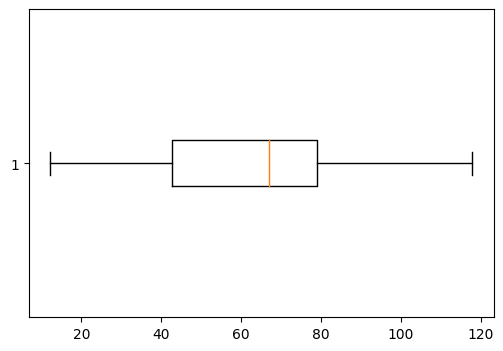


min:  12.05
Q1:  42.58
medijan:  67.04
Q3:  78.94
max:  117.95


In [ ]:
plt.figure(figsize=(6, 4))
plt.boxplot(SLB_dataset_Close, vert=False)
plt.grid(False)
plt.show()

print()
print("min: ",SLB_dataset_Close.min()[0])
print("Q1: ",SLB_dataset_Close.quantile(0.25)[0])
print("medijan: ",round(SLB_dataset_Close.median()[0],2))
print("Q3: ",round(SLB_dataset_Close.quantile(0.75)[0],2))
print("max: ",round(SLB_dataset_Close.max()[0],2))

Narančasta linija predstavlja medijan, lijeva i desna stranica pravokutnika ("kutije") vrijednost gornjeg (Q3) i donjeg (Q1) kvartila.
Gornji "brk" po defaultu prikazuje manju od ove dvije vrijednosti Q3+1.5 * IQR i maksimalne vrijednosti skupa podataka.
Donji "brk" po defaultu prikazuje veću od ove dvije vrijednosti Q1-1.5 * IQR i minimalne vrijednosti skupa podataka.



Raspon cijena je od 12.05\$ do 117.95\$. \
50% promatranih close cijena dionice SLB je manje od  67.04\$. \
Nema outliera (za ovako definirane "brkove"). \
Gornji interkvartilni raspon (od medijana do gornjeg kvartila ) je kraći od donjeg interkvartilnog raspona (od donjeg kvartila do medijana). \



Box Plot za svaku promatranu godinu ponaosob.

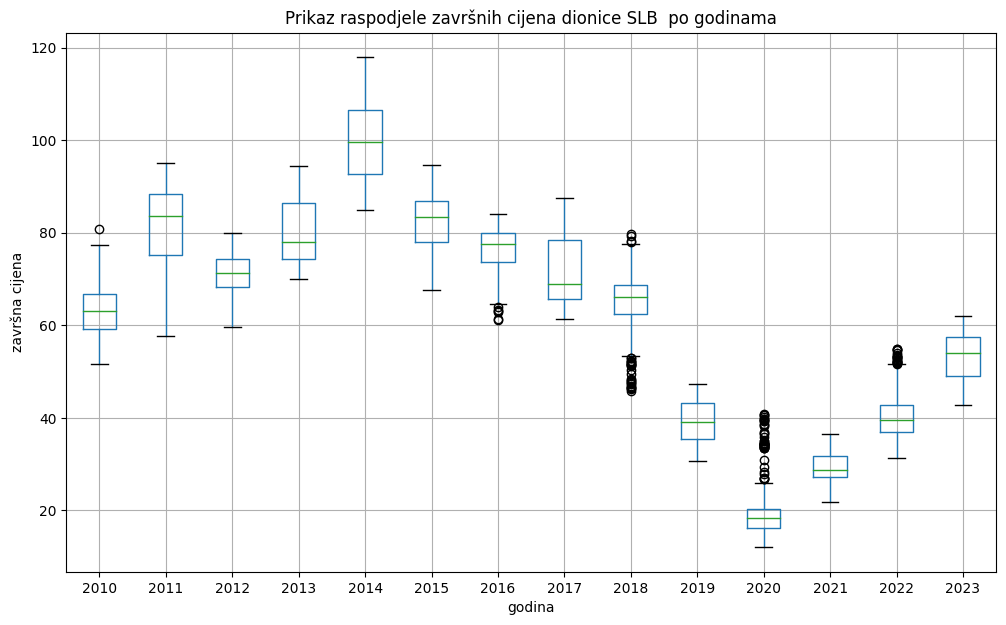

In [ ]:
close_po_godinama.boxplot(figsize = (12,7))
plt.title("Prikaz raspodjele završnih cijena dionice SLB  po godinama")
plt.ylabel("završna cijena")
plt.xlabel("godina")
plt.show()

Možemo primijetiti da godine 2016., 2018., 2020. i 2022. potencijalno  sadrže puno outliera, odnosno vrijednosti koje su značajno odstupale od većine podataka promatrane godine. Dok  2010. godina ima jedan outlier.



Prisustvo izvanrednih i nenormalnih vrijednosti može dovesti do ozbiljnih poteskoća u statističkoj analizi promatranog skupa podataka
(netočni statistički zaključci, nepouzdano testiranja hipoteza i netočni rezultati ). S druge strane, otkriveni outlieri mogu sadržavati informacije koje su od koristi u procesu donošenja odluka. Stoga je  prepoznavanje i analiziranje  izvanrednih vrijednosti jako važno. \

Različiti su razlozi zbog kojih može doći do pojavljivanja outliera u cijenama dionica. \
Neki od potencijalnih razloga:
* izuzetni događaji na tržištu (prirodne katastrofe, geopolitički sukobi, financijske krize...)
* ekonomske promjene (ekonomska neizvjesnost, inflacija...)
* specifični dogadaji tvrtke (objave o zaradama, financijski rezultati, strukturalne promjene...)
* trgovačke strategije
* greške u podatcima (greške u prikupljanju ili unosu podataka)




Napravimo sada dekompoziciju vremenskog niza SLB_dataset_Close, a onda ćemo pronaći točne datume kada su se dogodile izvanredne vrijednosti.

#Dekompozicija vremenskog niza

Glavne komponente vremenskog niza su:

- **trend (T)** : opisuje dugoročni rast ili pad vrijednosti promatranih podataka
  - trend ne mora biti linearan (može biti eksponencijalan,
  polinomijalan...)
  - primjeri vremenskih nizova s rastućim trendom: potražnja za tehnologijom, ukupna proizvodnja električne energije iz obnovljivih izvora, broj putnika u zračnom prometu...
  - primjeri vremenskih nizova s padajućim trendom: stopa smrtnosti, broj pčela u svijetu, broj prodanih novina u Hrvatskoj...
  - koristiti se izraz "promjena smjera trenda" kako bi se  opisala situaciju npr. kada uočavamo uzlazni trend koji potom prelazi u silazni trend

- **sezonalnost (S)**: opisuje obrasce u podacima na koje utječu sezonski čibenici poput doba godine ili dana u tjednu
  - ponavljajući uzorak unutar godine dana
  - uvijek fiksne i poznate učestalosti
  - npr. povećana prodaja sladoleda u ljetnim mjesecima
  
-  **cikličnost**: događa se kada u podacima dolazi do "uspona" i "padova" koji nisu fiksne frekvencije
  - ciklusi se često događaju zbog ekonomskih uvjeta i često se vežu uz "poslovni ciklus"
  - trajanje ovih fluktuacija je obično najmanje 2 godine
  - nepredvidiva


- **ostatak (R)**: kratkoročne fluktuacije koje nisu niti sistematične niti predvidljive
  - takve nestabilnosti uzrokuju nepredviđeni događaji (pandemije, ratovi, teroristički napadi, štrajkovi...)

**Napomena:**
Često se trend i cikličnost spajaju u jednu komponentu.

Radi bolje analize i razumijevanja, vremenski niz se pomoću aditivnog, odnosno multiplikativnog modela može rasčlaniti na trend, sezonsku i slučajnu komponentu.


- **Aditivni model dekompozicije**: $y_t =T_t + S_t + R_t$
  - prikladan ako se opseg sezonskih fluktuacija ili varijacija u trendu ne mijenja zajedno s levelom vremenskog niza (level = srednja vrijednost za određeni period)
  - $y_t, T_t, S_t, R_t$ imaju istu mjernu jednicu
  - jednostavan za intepretaciju
  

- **Multiplikativni model dekompozicije**: $y_t =  T_t \times S_t  \times R_t$
  - prikladan ako se opseg sezonskih fluktuacija ili varijacija u trendu mijenja proporcionalno s levelom vremenskog niza
  - samo $T_t$ ima istu mjernu jedinicu kao i $y_t$ (odnosno kao vrijednost niza)
  - manje intepretabilan od aditivnog modela dekompozicije
  - uobičajen za ekonomske vremenske nizove
  - ekvivalentno: $\log y_t = \log T_t + \log  S_t  + \log R_t$

Kod aditivne i multiplikativne dekompozicije $T_t$ je isti, razlika je što multiplikativna dekompozicija ima manji $S_t$ i $R_t$. Dakle, multiplikativni model ima manje reziduale koji se ne mogu predvidjeti i koji nisu objašnjivi.


<br>

**Napomena:**\
Iako je klasična dekompozicija vremenskog niza i dalje u širokoj upotrebi postoje i bolje metode.\
Ovo su neki od problema klasične dekompozicije:
- procjena trenda nije dostupna za prvih i posljednjih nekoliko opažanja  (posljedično, za ta opažanja nema ni procjene ostataka )
- procjena trenda ima tendenciju previše izgladiti nagle skokove u podatcima
- pretpostavlja da se sezonska komponenta pojavljuje iz godine u godinu (ne može zapazitit sezonske promjene tokom vremena npr. porastom učestalosti korištenja klima uređaja, dinamika potražnje električne energije mijenjala se tijekom vremena. Na mnogim lokacijama, nekadašnji sezonski obrazac, s najvećom potrošnjom zimi zbog grijanja, zamijenjen je s trenutnim obrascem koji ima najvišu potražnju ljeti)
- nije otporan na neobične vrijednosti koje vremenski niz poprima u malom broju razdoblja (npr. promet na cestama može biti značajno pogođen prometnom nesrećom, čineći ga različitim od uobičajenog)


Raščlanimo vremenski niz SLB_dataset_Close pomoću multiplikativnog modela na trend, sezonsku i slučajnu komponentu. \

Podaci su kronološki poredani i vremenski interval bi trebao biti jedan dan, ali pojedini datumi izostaju (uglavnom subote i nedjelje kada burze ne rade ).
Kako podatci trebaju imati fiksan period generirati ćemo sve datume od 2010-01-04 do i 2023-12-01. Završne cijene dionice  za datume koji se nalaze u skupu podataka ćemo zadržat, a za datume koje nemamo ćemo za početak postavit na NaN.

In [ ]:
SLB_dataset_Close.head(7) #vec mozemo primijetiti da nedostaje 2010-01-09, 2010-01-10

Close
Date                 
2010-01-04  67.110001
2010-01-05  67.300003
2010-01-06  68.800003
2010-01-07  69.510002
2010-01-08  70.650002
2010-01-11  70.650002
2010-01-12  69.589996

In [ ]:
#ponovno indeksiranje vremenskog niza s svim datumima od 2010-01-04 do i 2023-12-01
svi_datumi = pd.date_range(start=SLB_dataset_Close.index.min(), end=SLB_dataset_Close.index.max(), freq='D')
df_pun = SLB_dataset_Close.reindex(svi_datumi)
df_pun.head(7)

Close
2010-01-04  67.110001
2010-01-05  67.300003
2010-01-06  68.800003
2010-01-07  69.510002
2010-01-08  70.650002
2010-01-09        NaN
2010-01-10        NaN

Što sada napraviti s vrijednostima koje nedostaju?\
Neke od ideja za nadopunu su srednjom, modalnom, prethodnom poznatom vrijednošću, prvom sljedećom poznatom vrijednošću, linearnom interpolacijom...\
Nadopunit ćemo ih srednjom vrijednošću cijena dionice od 5 susjedih dana za koja znamo cijenu  metodom K-Nearest Neighbors (KNN) Imputer.



In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
df_pun['Redosljed']=[i for i in range(len(df_pun))]
df_pun.head(9)

Close  Redosljed
2010-01-04  67.110001          0
2010-01-05  67.300003          1
2010-01-06  68.800003          2
2010-01-07  69.510002          3
2010-01-08  70.650002          4
2010-01-09        NaN          5
2010-01-10        NaN          6
2010-01-11  70.650002          7
2010-01-12  69.589996          8

In [ ]:
imputer = KNNImputer(n_neighbors=5)
nakon_nadopune = imputer.fit_transform(df_pun)

In [ ]:
nakon_nadopune[5]

array([69.840001,  5.      ])

In [ ]:
nakon_nadopune= nakon_nadopune[:, [0]] #samo prvi stupac tj. stupac sa cijenama
nakon_nadopune

array([[67.110001],
       [67.300003],
       [68.800003],
       ...,
       [51.869999],
       [52.040001],
       [52.389999]])

In [ ]:
SLB_dataset_Close_svi_datumi_nadopunjeno = pd.DataFrame({'Date': df_pun.index})
SLB_dataset_Close_svi_datumi_nadopunjeno["Close"]=nakon_nadopune
SLB_dataset_Close_svi_datumi_nadopunjeno.head(7)

Date      Close
0 2010-01-04  67.110001
1 2010-01-05  67.300003
2 2010-01-06  68.800003
3 2010-01-07  69.510002
4 2010-01-08  70.650002
5 2010-01-09  69.840001
6 2010-01-10  70.250000

In [ ]:
SLB_dataset_Close_svi_datumi_nadopunjeno= SLB_dataset_Close_svi_datumi_nadopunjeno.set_index('Date')
SLB_dataset_Close_svi_datumi_nadopunjeno.head()

Close
Date                 
2010-01-04  67.110001
2010-01-05  67.300003
2010-01-06  68.800003
2010-01-07  69.510002
2010-01-08  70.650002

In [ ]:
fig = px.line(SLB_dataset_Close_svi_datumi_nadopunjeno, x=SLB_dataset_Close_svi_datumi_nadopunjeno.index, y=SLB_dataset_Close_svi_datumi_nadopunjeno.Close)
fig.update_layout(title_text='Završna cijena SLB dionice - nakon nadopune', font_size=15, font_color='black')
fig.update_xaxes(title_text='Datum',showgrid=True)
fig.update_yaxes(title_text='Zavrsna cijena',showgrid=False)
fig.show()

Sada napravimo dekompoziciju.

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
decomposition = seasonal_decompose(SLB_dataset_Close_svi_datumi_nadopunjeno, model="multiplicative")

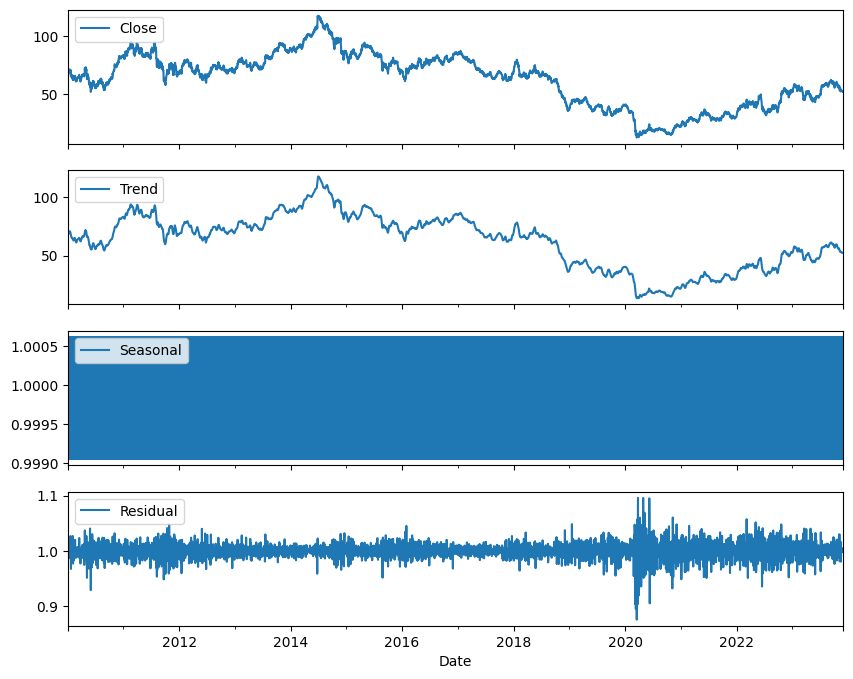

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

SLB_dataset_Close_svi_datumi_nadopunjeno.plot(ax=ax1, label='Original')
decomposition.trend.plot(ax=ax2, label='Trend')
decomposition.seasonal.plot(ax=ax3, label='Seasonal')
decomposition.resid.plot(ax=ax4, label='Residual')

ax1.legend(loc='upper left')
ax2.legend(loc='upper left')
ax3.legend(loc='upper left')
ax4.legend(loc='upper left')
plt.show()

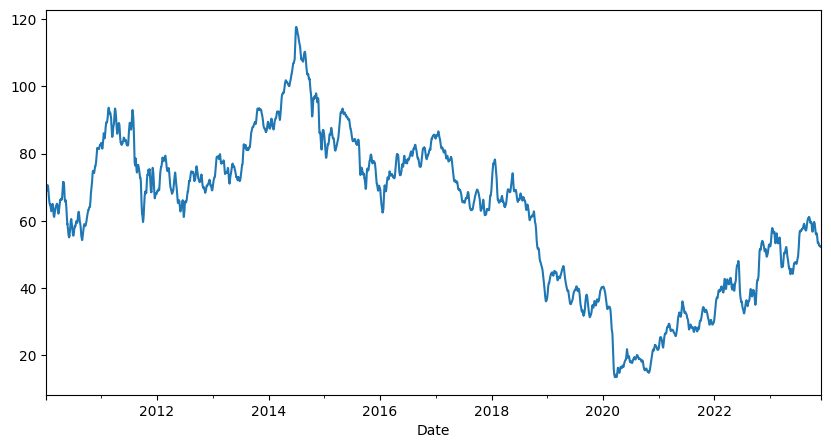

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
decomposition.trend.plot(ax=ax)
plt.show()

O trend komponenti možemo razmišljati kao pokušaju povlačenja linije kroz većinu podataka kako bismo prikazali općeniti smjer vremenskog niza.
Možemo uočiti rastuć trend otprilike do prvih par mjeseci  2014. godine, zatim padajuć do početka 2020. godine i onda opet rastuć.


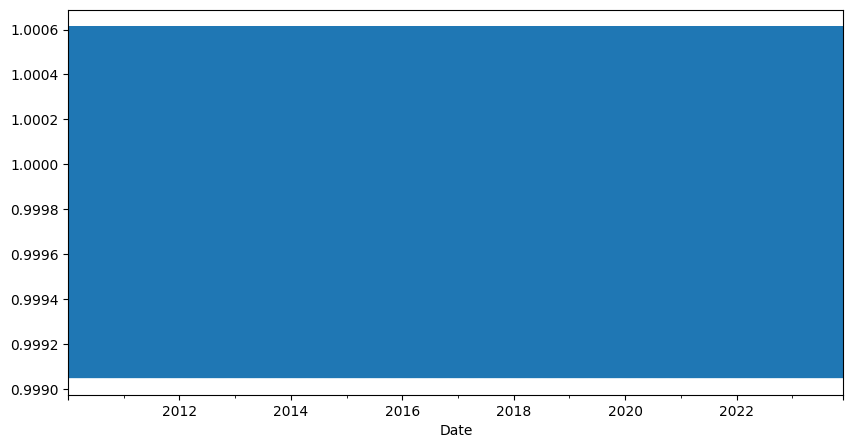

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
decomposition.seasonal.plot(ax=ax)
plt.show()

Nema jasnog sezonskog uzorka.

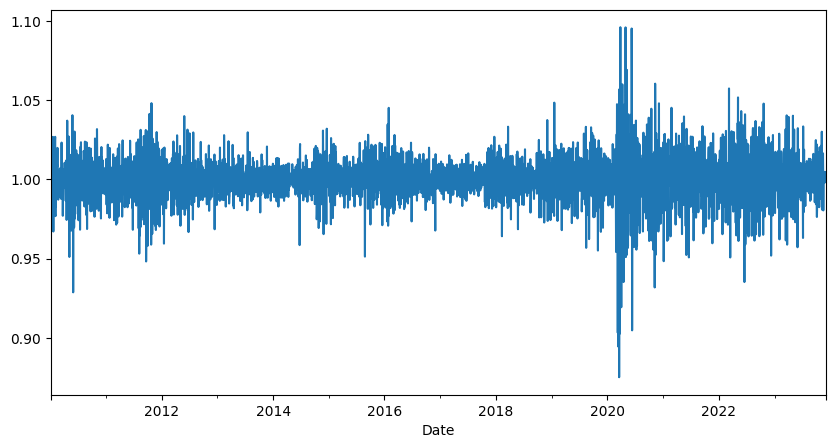

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
decomposition.resid.plot(ax=ax)
plt.show()

Reziduali objašnjavaju segmente vremenskog niza koji nisu obuhvaćeni trendom i sezonalnošću. Ne možemo ih modelirati ni predvidjeti jer su potpuno slučajni.
Vrijednosti reziduala su male, izraženije su u 2020-oj godini i nakon.


# Otkrivanje anomalija

Pokušajmo uočiti anomalije kako bi kasnije potencijalno poboljšali predviđanje.

In [ ]:
trend=decomposition.trend
seasonal=decomposition.seasonal
resid=decomposition.resid

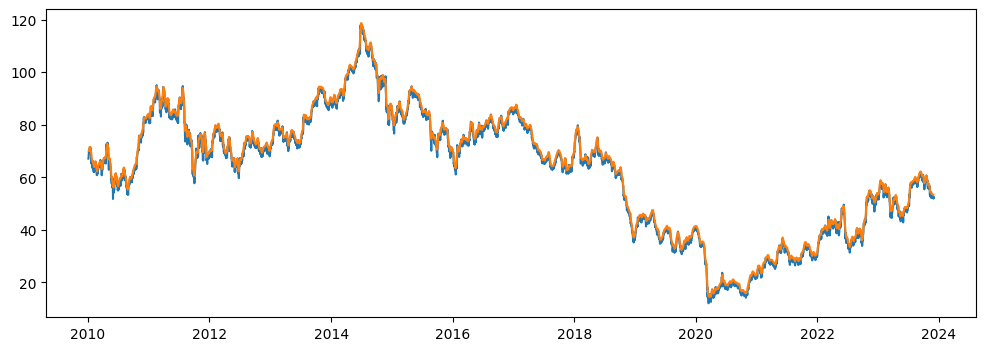

In [ ]:
estimated = trend + seasonal
plt.figure(figsize=(12,4))
plt.plot(SLB_dataset_Close_svi_datumi_nadopunjeno)
plt.plot(estimated)
plt.show()

Anomalije su ondje gdje je vrijednost reziduala velika.

In [ ]:
resid_mu = resid.mean() #srednja vrijednost reziduala
resid_dev = resid.std() #standardna devijacija reziduala

lower = resid_mu - 4*resid_dev #donja granica
upper = resid_mu + 4*resid_dev #gornja granica

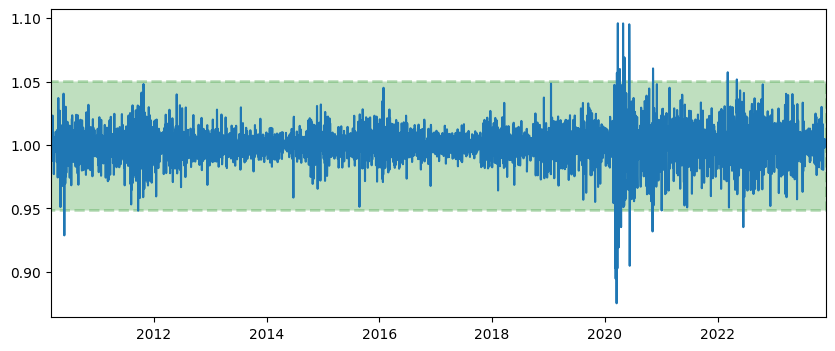

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(resid)

plt.fill_between([datetime(2010,1,4), datetime(2023,12,2)], lower, upper, color='g', alpha=0.25, linestyle='--', linewidth=2)
plt.xlim(datetime(2010,3,4), datetime(2023,12,2))
plt.show()

Odredimo datume kada su se dogodile izvanredene vrijednosti.

In [ ]:
anomalies = SLB_dataset_Close_svi_datumi_nadopunjeno[(resid < lower) | (resid > upper)]
anomalies["Close"]

Date
2010-06-01    51.750000
2011-09-22    61.220001
2020-03-09    17.309999
2020-03-12    14.420000
2020-03-18    12.050000
2020-03-20    14.280000
2020-03-23    12.830000
2020-03-26    15.520000
2020-04-01    12.590000
2020-04-08    17.280001
2020-04-16    14.050000
2020-04-29    18.200001
2020-05-08    18.049999
2020-06-08    23.650000
2020-06-09    22.510000
2020-06-11    18.510000
2020-11-06    15.220000
2020-11-09    18.250000
2021-01-04    21.950001
2022-03-08    45.080002
2022-05-06    43.029999
2022-06-17    36.639999
Name: Close, dtype: float64

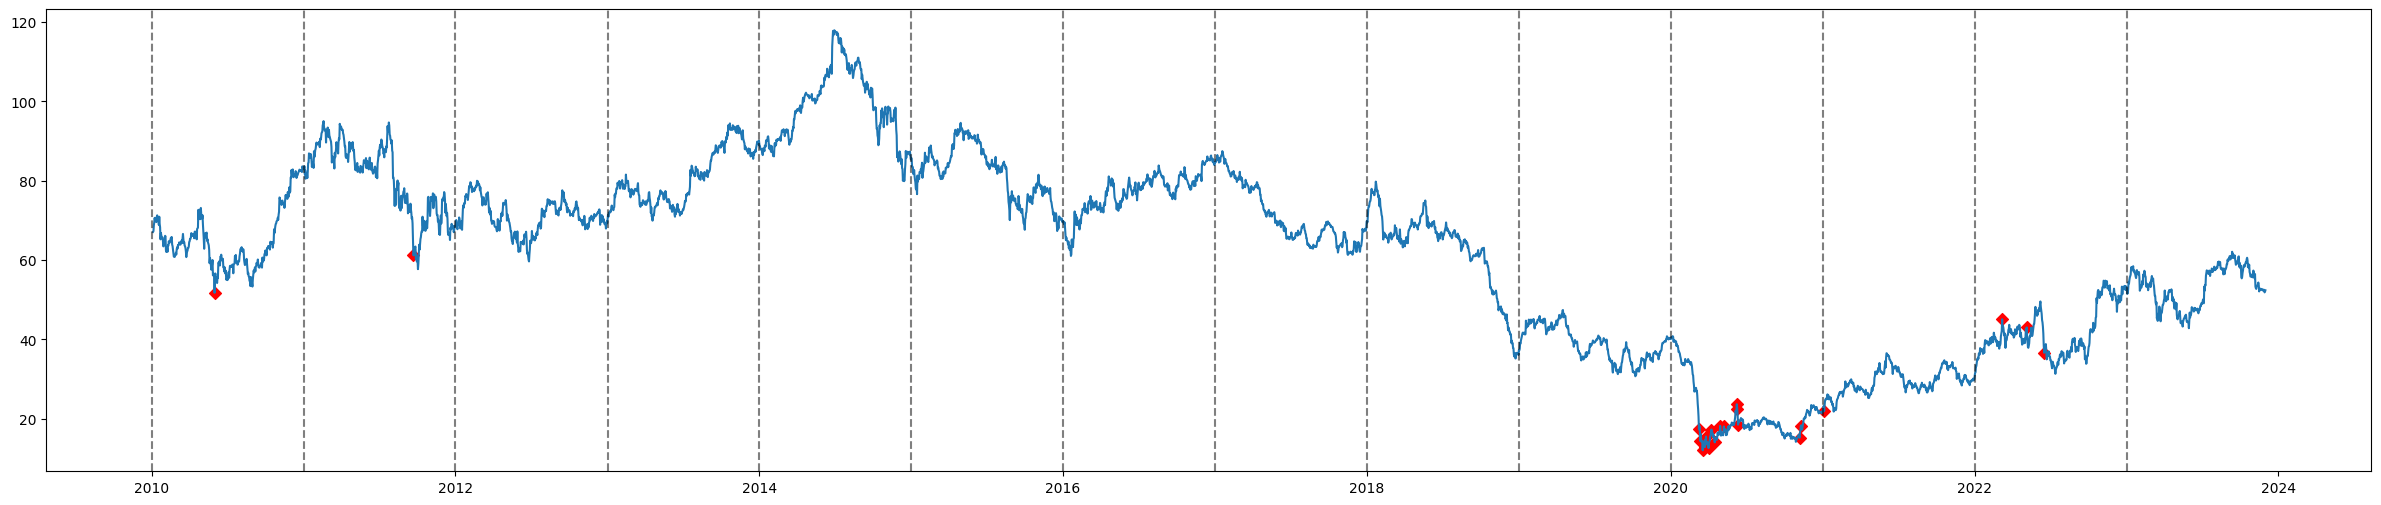

In [ ]:
plt.figure(figsize=(30,6))
plt.plot(SLB_dataset_Close_svi_datumi_nadopunjeno)
for year in range(2010,2024):
    plt.axvline(datetime(year,1,1), color='k', linestyle='--', alpha=0.5)

plt.scatter(anomalies.index, anomalies["Close"], color='r', marker='D')
plt.show()


Provjerimo jesu li se na navedenim datumima dogodili relevantni događaji za tvrtku Schlumberger ili su objavljne  važne informacije koje su možda utjecale na krajnju cijenu njihovih dionica toga dana.

* "HOUSTON, March 08, 2022—Schlumberger announced today that it has been awarded an extensive contract for drilling, completions and production services by TotalEnergies for its Tilenga onshore oil development in Uganda." \
(https://www.slb.com/news-and-insights/newsroom/press-release/2022/pr-2022-03-08-tilenga-onshore-oil-uganda-totalenergies)

* DENVER & HOUSTON, January 4, 2021—Liberty Oilfield Services Inc. (NYSE: LBRT) and Schlumberger (NYSE: SLB) announced today the completion of the contribution of Schlumberger’s onshore hydraulic fracturing business in the United States and Canada (“OneStim®”) to Liberty on December 31, 2020, including its pressure pumping, pumpdown perforating, and Permian frac sand businesses, in exchange for a 37% equity interest in Liberty. \
(https://www.slb.com/news-and-insights/newsroom/press-release/2021/pr-2021-01-04-liberty-schlumberger-close-transaction )



Zamijenimo close cijenu dionice na te datume  srednjom vrijednošću cijena dionice od 5 susjednih dana metodom K-Nearest Neighbors (KNN) Imputer.

In [ ]:
#postavljanje vrijednosti na NaN za datume kada su se dogodile anomalije
for date in anomalies.index:
    SLB_dataset_Close_svi_datumi_nadopunjeno.loc[date] = np.nan
SLB_dataset_Close_svi_datumi_nadopunjeno['Redosljed']=[i for i in range(len(SLB_dataset_Close_svi_datumi_nadopunjeno))]

In [ ]:
#from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
nakon_nadopune2 = imputer.fit_transform(SLB_dataset_Close_svi_datumi_nadopunjeno)

In [ ]:
nakon_nadopune2= nakon_nadopune2[:, [0]] #samo prvi stupac tj. stupac sa cijenama
nakon_nadopune2

array([[67.110001],
       [67.300003],
       [68.800003],
       ...,
       [51.869999],
       [52.040001],
       [52.389999]])

In [ ]:
SLB_dataset_Close_svi_datumi_nadopunjeno = pd.DataFrame({'Date': SLB_dataset_Close_svi_datumi_nadopunjeno.index})
SLB_dataset_Close_svi_datumi_nadopunjeno["Close"]=nakon_nadopune2
SLB_dataset_Close_svi_datumi_nadopunjeno= SLB_dataset_Close_svi_datumi_nadopunjeno.set_index('Date')
SLB_dataset_Close_svi_datumi_nadopunjeno.head()

Close
Date                 
2010-01-04  67.110001
2010-01-05  67.300003
2010-01-06  68.800003
2010-01-07  69.510002
2010-01-08  70.650002

In [ ]:
fig = px.line(SLB_dataset_Close_svi_datumi_nadopunjeno, x=SLB_dataset_Close_svi_datumi_nadopunjeno.index, y=SLB_dataset_Close_svi_datumi_nadopunjeno.Close)
fig.update_layout(title_text='Završna cijena SLB dionice nakon uklanjanja anomalija', font_size=15, font_color='black')
fig.update_xaxes(title_text='Datum',showgrid=True)
fig.update_yaxes(title_text='Završna cijena',showgrid=False)
fig.show()

#Stacionarnost

## Definicija

Vrijednost dionice u n-tom danu promatrat ćemo kao moguću realizaciju    (vrijednost) neke slučajne varijable $y_n$. Budući da na vjerojatnost da varijabla $y_n$ postigne neku vrijednost utječu ostale varijable, promatrat ćemo niz slučajnih varijabli $(y_n, n \in \mathbb{N})$, kojeg ćemo nazvati **slučajnim procesom**. Imat ćemo podatke o dnevnim vrijednostima dionica, npr $x_1,x_2, \dots$ i te podatke ćemo nazvati **vremenski nizom**. Vremenski niz, tj. niz dnevnih vrijednosti $(x_n, n \in \mathbb{N})$ bit će jedna **realizacija** slučajnog procesa  $(y_n, n \in \mathbb{N})$. \

**Napomena:**\
Termin vremenski niz koristit ćemo i za slučajni proces i za njegovu realizaciju.

<br>

**Vremenski niz je stacionaran** ako se njegova statistička svojstva ne mijenjaju tijekom
vremena. Formalno se stacionarnost definira pomoću striktne i slabe  stacionarnosti.

* **Striktna stacionarnost**

>Vremenski niz $( y_t, t\in\mathbb{Z})$ je **striktno stacionaran** ako su zajedničke distribucije od $(y_{t_1}, \dots ,y_{t_k})$ i $(y_{{t_1}+h}, \dots ,y_{{t_k}+h})$ jednake za svaki pozitivan cijeli broj k i za sve $t_1,t_2, \dots ,t_k,h \in\mathbb{N}. $



* **Slaba stacionarnost**

>Vremenski niz je **stabo stacionaran** (kovarijančno stacionaran) ako prvi i drugi momenti ne ovise o vremenu, tj. za svaki $t \in \{ 1,2, \dots \}$, vrijedi sljedeće:
1. $\mathbb{E}[y_t] = \mu < \infty$ -> **konstantna i konačna očekivana vrijednost** (ne ovisi o vremenu t)
<img src="https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Mean_nonstationary.png" alt="Data Science Process" width="500" height="200"/>
2. $\mathbb{E}[(y_t - \mu)^2]= \sigma^2 < \infty$ -> **nepromjenjiva varijanca** (Ovo svojstvo je poznato kao **homoskedastičnost**)
<img src="https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Var_nonstationary.png" alt="Data Science Process" width="500" height="200"/>
3. $\mathbb{E}[(y_t - \mu)(y_{t-h} - \mu)] = \gamma_h < \infty$ -> **kovarijanca izmedu $y_t$ i $y_{t-h}$ je jedino funkcija pomaka h, a ne ovisi o t**
<img src="https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Cov_nonstationary.png" alt="Data Science Process" width="500" height="200"/>  \
Kako je kovarijanca funkcija pomaka h to je i **korelacija**  $\rho_h$ između $y_t$ i $y_{t-h}$ također funkcija samo pomaka h:

$$ \rho_h=  \frac{\gamma_h}{ \sigma^2} < \infty , h \in \mathbb{Z}. $$

Očito je svaki striktno stacionaran niz i slabo stacionaran, no obrat ne mora vrijediti. Naime, slaba stacionarnost ne govori ništa o distribucijama $y_t$ već samo o njihovim srednjim vrijednostima, kovarijancama i korelaciji između njih.

Stacionarnost vremenskog niza je česta pretpostavka za mnoge modele prilagođene analizi vremenskih nizova npr.AR,MA,ARMA... Ovi se modeli mogu koristiti samo ako potvrdimo da su podatci stacionarni. U suprotnom, modeli neće biti valjani, a predviđanja neće biti pouzdana.\
Intuitivno, ovo ima smisla jer ako su podaci nestacionarni, njihova svojstva se mijenjaju tijekom vremena, što implicira da  bi se parametri našeg modela također trebali mijenjati kroz vrijeme. Kada istreniramo  i dobijemo model, promjene u distribuciji ulaznih podataka zahtijevaju ponovno treniranje modela na novim podatcima. Dakle, svaka promjena statističkih svojstava zahtijeva ponovno treniranje modela, a ako se te promjene često javljaju, model bi trebalo često ponovno trenirati. Ovo znači da nije moguće izraziti funkciju budućih vrijednosti isključivo kao funkciju prošlih vrijednosti, jer se koeficijenti mijenjaju u svakoj točki vremena, što čini predviđanja nepouzdanim.

Stoga je analiza stacionarnih podataka lakša i pouzdanija od nestacionarnih podataka. Stacionarni podatci omogućuju korištenje jednostavnijih modela i statističkih tehnika, kao i točnija predviđanja.

## Test za stacionarnost

Neke od uobičajenih tehnika za provjeru je li vremenski niz stacionaran:
- **vizualizacija:** crtanjem vremenskog niza i promatranjem postoji li jasni trend ili sezonalnost. Ako se čini da podatci flukturiraju oko konstantne srednje vrijednosti bez vidljivog uzorka, vjerojatno je stacionaran.

- **rolling statistics:** uzimanje prosječne vrijednosti od nekoliko prošlih podataka

- **Dickey-Fuller Test/Augmented Dickey-Fuller (ADF) Test:** statistički test koji provjerava prisutnost jediničnog korijena u vremenskom nizu. Ako test pokaže da ne postoji jedinični korijen, tada je vremenski niz vjerojatno stacionaran.

**Rolling statistics**

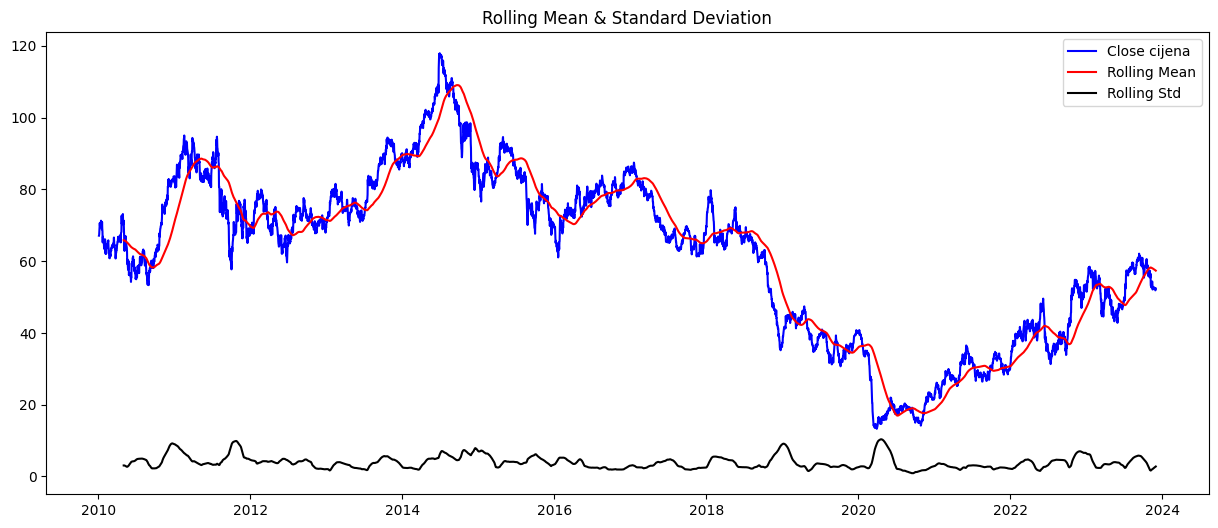

In [ ]:
rolmean = SLB_dataset_Close_svi_datumi_nadopunjeno.rolling(window = 120).mean() #uzimamo prosjek od 120 tocaka
rolstd = SLB_dataset_Close_svi_datumi_nadopunjeno.rolling(window = 120).std()
fig = plt.figure(figsize=(15,6))
orig = plt.plot(SLB_dataset_Close_svi_datumi_nadopunjeno, color='blue',label='Close cijena')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

Jasno se vidi na grafu kako i srednja vrijednost i standardna devijacija variraju kroz vrijeme. Uz vizualizaciju pokažimo to i standardnim testom.

**Jedinični korijeni** predstavljaju izazov u pravilnom modeliranju vremenskog niza jer prisutnost jediničnog korijena čini niz nestacionarnim. Kako bismo uspješno modelirali takav vremenski niz, moramo primijeniti određene transformacije. U situacijama kada nije moguće ukloniti jedinični korijen, važno je biti svjestan da radimo s nestacionarnim nizom.

<br>

Formalni test koji nam daje odgovar na pitanje je li vremenski niz stacionaran ili ne je **Dickey-Fuller Test/Augmented Dickey-Fuller (ADF) Test**.

<br>

 **Dickey-Fuller Test** \

 Kod inverznog karakterističnog polinoma AR(1) procesa $ y_t=\phi_{0} + \phi_{1} y_{t-1}+ \varepsilon_t $ promatrat ćemo korijene i pokazat ćemo da mora vrijediti $\lvert \phi_1 \rvert < 1$ da bi proces bio stacionaran. U testovima jediničnog korijena razmatra se vrijednost $ \phi_1$ u odnosu na jediničnu vrijednost. Dickey i Fuller su proveli Monte Carlo simulaciju, gdje su generirali mnogo procesa slučajnog pomaka, procijenili koeficijent $\phi_{1}$ u modelu $ y_t=\phi_{0} + \phi_{1} y_{t-1}+ \varepsilon_t $, razmatrali koliko je tih procijenjenih koeficijenata manje od 1 i generirali kritične granice.
Kritične granice su generirane uz pretpostavku da procesi slijede slučajan pomak, stoga se u nultoj hipotezi Dickey-Fullerova testa pretpostavlja nestacionarnost procesa koji se razmatra.

Hipoteze:
 * **$H_0$: $\phi_{1}=1$** ( ima jedinični korjen, a onda znamo da nije stacionaran) \
 * **$H_1$: $\phi_{1} < 1$** (u ovom slučaju će biti stacionaran) \

Razmotrimo  model $y_t=\phi_{0} + \phi_{1} y_{t-1}+ \varepsilon_t$ za proces $y_t$ za koji se u nultoj hipotezi pretpostavlja da je nestacionaran.
Za postizanje stacionarnosti potrebno je razmotriti prvu diferenciju
$ y_t - y_{t-1}=(\phi_{0} + \phi_{1} y_{t-1}+ \varepsilon_t) -  y_{t-1} = \phi_{0} + (\phi_{1} - 1)y_{t-1} + \varepsilon_t = \phi_{0} + \delta y_{t-1} + \varepsilon_t$

--> **$\Delta y_t = \phi_{0} + \delta y_{t-1} + \varepsilon_t$ Dickey-Fullerova jednadžba**

Hipoteze:
* $H_0: \delta=0 \quad (\phi_{1}=1)$
* $H_1: \delta<0 \quad (\phi_{1}<1)$

<br>

**Augmented Dickey-Fuller (ADF) Test** \

Kao što i sam  naziv sugerira, ADF test je 'proširena' verzija Dickey-Fuller testa. ADF test proširuje jednadžbu Dickey-Fullerovog testa kako bi uključio autoregresivni proces bilo kojeg reda u model.

Hipoteze:
 * **$H_0$: vremenski niz ima jedinični korjen** (nije stacionaran) \
 * **$H_1$: vremenski niz nema jedinični korjen** (stacionaran je) \

Ako se nulta hipoteza može odbaciti, možemo zaključiti da je vremenski niz stacionaran. \
Postoje dva načina za odbacivanje nulte hipoteze:
* nulta hipoteza se može odbaciti ako je p-vrijednost ispod postavljene razine značajnosti (zadana razina značajnosti je 5%)
> * **p-vrijednost > razina značajnosti (default: 0,05)**: Ne uspijevamo odbaciti nultu hipotezu ($H_0$), podatci imaju jedinični korijen i **nisu stacionarni**.
> * **p-vrijednost <= razina značajnosti (default: 0,05)**: Odbacujemo nultu hipotezu ($H_0$), podatci nemaju jedinični korijen i **stacionarni** su.

* nulta hipoteza se može odbaciti ako je testna statistika manja od kritične vrijednosti
> * **ADF statistika > kritična vrijednost**: Ne uspijevamo odbaciti nultu hipotezu ($H_0$), podatci imaju jedinični korijen i **nisu stacionarni**.
> * **ADF statistika < kritična vrijednost**: Odbacujemo nultu hipotezu ($H_0$), podatci nemaju jedinični korijen i **stacionarni** su.


In [ ]:
# ADF test

from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    print ('Rezultat  Dickey-Fuller testa:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

adf_test(SLB_dataset_Close_svi_datumi_nadopunjeno)

Rezultat  Dickey-Fuller testa:
Test Statistic                   -1.570633
p-value                           0.498327
#Lags Used                       15.000000
Number of Observations Used    5064.000000
Critical Value (1%)              -3.431642
Critical Value (5%)              -2.862111
Critical Value (10%)             -2.567074
dtype: float64



ADF statistika testa iznosi -1.570633 \
p-vrijednost je  0.498327 --> "Postoji 49.83% šanse da model ima jedinični korijen" --> "Postoji 49.83% šanse da proces nije stacionaran"

Dobivena p-vrijednost veća je od razine značajnosti od 0,05, a ADF statistika je veća od bilo koje kritične vrijednosti. Jasno je da nema razloga odbaciti nultu hipotezu. Dakle, vremenski niz **nije stacionaran**.


Kako bi nastavili s razvijanjem prediktivnog modela, moramo niz pretvoriti u stacionaran. \
Stacionarnost niza može se postizati na razne načine. Primjenit ćemo dva vrlo jednostavna načina. Prvo, umjesto vrijednosti promatramo logaritmirane vrijednosti (tako općenito smanjujemo "divljanje" niza). Drugo, radit ćemo diferenciranje. Diferenciranje je metoda koja se najčešće upotrebljavana kao alat za uklanjanje trenda i sezonalnosti. U ovoj metodi uzimamo razliku između originalne promatrane varijable u određenom trenutku s tom istom vrijednosti u prethodnom trenutku ($z_i=y_i - y_{i-1}$).

In [ ]:
SLB_povrati = np.log(SLB_dataset_Close_svi_datumi_nadopunjeno).diff().dropna()
SLB_povrati = SLB_povrati.rename(columns={'Close': 'Povrati'})
SLB_povrati.head()


Povrati
Date                
2010-01-05  0.002827
2010-01-06  0.022044
2010-01-07  0.010267
2010-01-08  0.016267
2010-01-09 -0.011531

In [ ]:
fig = px.line(SLB_povrati, x=SLB_povrati.index, y=SLB_povrati.Povrati)
fig.update_layout(title_text='Povrat SLB dionice', font_size=15, font_color='black')
fig.update_xaxes(title_text='Datum',showgrid=True)
fig.update_yaxes(title_text='Povrat',showgrid=False)
fig.show()

Ispitajmo je li dobiveni vremenski niz SLB_povrati  stacionaran.

In [ ]:
adf_test(SLB_povrati)

Rezultat  Dickey-Fuller testa:
Test Statistic                  -25.773899
p-value                           0.000000
#Lags Used                        5.000000
Number of Observations Used    5073.000000
Critical Value (1%)              -3.431640
Critical Value (5%)              -2.862110
Critical Value (10%)             -2.567073
dtype: float64


Na razini značajnosti (signifikantnosti) od 5% možemo odabciti $H_0$ te možemo tvrditi da je vremenski niz stacionaran.

# Autokorelacijska funkcija (ACF)

**Autokovarijančna funkcija**  za neki vremenski niz je niz koeficijenata kovarijance $\gamma_h$ , $h\in\mathbb{Z} $.

Zbog intepretabilnosti definiramo autokorelacijsku funkciju.

**Autokorelacijska funkcija (ACF)** je niz koeficijenata autokorelacije $\rho_h , h\in\mathbb{Z}$, gdje je koeficijent korelacije reda h definiran formulom

$$ \rho_h= \frac{\text{cov}(y_t, y_{t-h})}{\text{Var}[y_t]} = \frac{\gamma_h}{ \sigma^2} , h \in \mathbb{Z}. $$


**Stacionarni vremenski nizovi imaju autokorelacijske funkcije koje brzo teže prema nuli.**

Autokorelacijska funkcija nam daje informaciju o stupnju linearne povezanosti između članova procesa $y_t$ za različite pomake h te o prediktivnoj snazi prethodnih ili lagiranih vrijednosti varijable $y_t$ za
predviđanje budućih vrijednosti.

Primjetimo da je autokorelacija nultog reda jednaka 1, $ \rho_0= \frac{\text{cov}(y_t, y_{t-0})}{\text{Var}[y_t]} = \frac{\text{cov}(y_t, y_{t})}{\text{Var}[y_t]} = 1 $

# Parcijalna autokorelacijska funkcija (PACF)

**Parcijalna autokorelacijska funkcija(PACF)** je niz koeficijenata autokorelacije između $y_t$ i $y_{t-h}$  koji se definiraju na način da se ukloni linearna ovisnost o varijablama $y_{t+1},y_{t+2} \dots y_{t-h+1}:$

$$ \phi_h = \text{Corr}(y_t, y_{t-h}|y_{t+1},y_{t+2}, \dots , y_{t-h+1}),  h \in \mathbb{Z} $$

Koeficijente parcijalne autokorelacije intepretiramo kao "dodatna" prediktivna moć pomaka h kada se kontrolira za preostale pomake $y_{t+1},y_{t+2}, \dots , y_{t-h+1}$.

ACF vs PACF intuitivno:\
Npr. želimo predvidjeti prosječnu cijenu mesa u nekom gradu \
$ S_t$ = prosječna cijena mesa ovog mjeseca  \
$ S_{t-1}$ = prosječna cijena mesa prošlog mjeseca \
$ S_{t-2}$ = prosječna cijena mesa prije dva mjeseca \
itd... \

Na cijenu mesa može utjecati niz faktora poput zakonskih regulacija, klimatskih uvjeta, trgovinskih uvjeta... No, ono što se čini najintuitivnijim je pogled na cijenu mesa iz prethodnog mjeseca.
Ako je cijena bila visoka prošli mjesec za očekivati je da će biti visoka i ovaj.

 cijena mesa u 11-om mjesecu ima nekakav utjecaj na cijenu u 12-om mjesecu \
 cijena mesa u 12-om mjesecu ima nekakav utjecaj na cijenu u 1-om mjesecu \
 -> cijena mesa u 11-om mjesecu ima indirektan utjecaj na cijenu mesa u 1-om mjesecu (preko 12-og mjeseca) $S_{t-2}$ -> $S_{t-1}$ -> $S_t$, ali može postojati i direktan utjecaj npr. u tom gradu svako dva mjeseca se održava festival hrane $S_{t-2}$ -> $S_t$

 **ACF** govori o korelaciji između cijene mesa ovog mjeseca i prije nekoliko mjeseci, uračunava i **direktne i indirektne utjecaje**.\
 **PACF je direktan efekt** cijene mesa nekoliko mjeseci unatrag i cijene danas. \


Može nas zanimati samo direktan utjecaj jer npr. želimo vidjeti je li cijena mesa prije dva mjeseca dobar dobar prediktor cijena mesa ovog mjeseca. Na osnovi ACF može izgledati kao dobar prediktor ako je korelacija jako visoka, ali ta korelacija može biti visoka samo zbog indirektnog efekta dok istovremeno direktni efekt može imat jako malu korelaciju.



Nacrtajmo ACF i PACAF grafove za vremenski niz SLB_povrati.

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

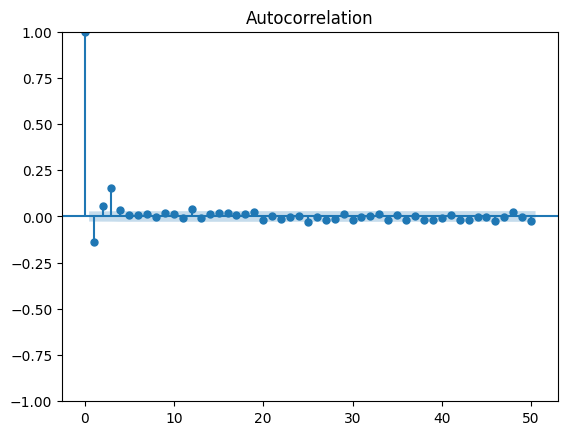

In [ ]:
acf_plot = plot_acf(SLB_povrati,lags=50)  #lags=100

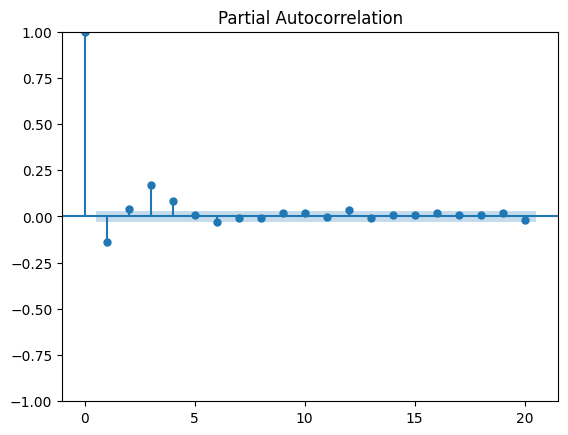

In [ ]:
pacf_plot = plot_pacf(SLB_povrati, lags=20)

# Informacijski kriteriji (AIC i BIC)

S obzirom da je u praksi često teško odrediti o kojem redu procesa se radi temeljem ACF i PACF plotova treba nam nešto što će nam govoriti koliko dobro je vremenski niz opisan određenim modelom. Stoga su informacijski kriteriji često korišteni u praksi.  

**Informacijski kriteriji** su mjere utemeljene na kompromisu između modelovog dobrog opisivanja dinamike vremenskih nizova (goodnes of fit) i očuvanja dovoljnog broja stupnjeva slobode u modelu.
Najčšće korišteni u praksi su AIC i BIC.

<br>

Neka je M statistički model za dani skup podataka P.
* **Akaike information criterion(AIC)** modela M je broj
  $$ AIC = 2k - 2\ln{L},$$
k je broj parametara tj. stupnjeva slobode modela \
L je maksimalna vrijednost funkcije vjerojatnosti modela M

* **Bayesian information criterion (BIC)** modela M je broj
$$BIC =  k \ln{n} - 2\ln{L} $$
k je broj parametara tj. stupnjeva slobode modela \
L je maksimalna vrijednost funkcije vjerojatnosti modela M \
n je broj opažanja temeljem kojih se procjenjuje model \

Poželjno je da su vrijednosti AIC i BIC nekog modela što manje.
AIC i BIC su relativni kriteriji. Oni ne govore ništa o jednom modelu već uspoređuju različite modele i govore koji je bolji. Ako imamo kompliciraniji model (više parametara) on uglavnom bolje fita podatke, ali ne želimo da dode do pretreniranja (što je model kompliciraniji to je on gori na skupu za testiranje jer neće moći generalizirati) pa AIC i BIC penaliziraju povećanje broja parametara.




# Bijeli šum

**Čisti slučajni proces (white noise process, WN)** ili **proces bijelog šuma** je niz jednako distribuiranih, nekolinearnih slučajnih varijabli čije je očekivanje jednako 0 i varijanca je konstantna $\sigma^2 $:

$$ \{ \varepsilon_t, t \in \{ \dots,-2,-1,0,1,2,\dots \}\},$$
$$ \mathbb{E}[\varepsilon_t]=0$$
$$\text{Var}[\varepsilon_t]=\sigma^2 $$
$$\text{Cov}(\varepsilon_t,\varepsilon_s) = 0, t \neq s$$

Ako se radi i o normalnom distribuiranom procesu nazivamo ga **Gaussov čisti slučajni proces**. \

S obzirom na svojstvo kovarijance ($ \text{Cov}(\varepsilon_t,\varepsilon_s) = 0, t \neq s$), buduće članove čistog slučajnog procesa nije moguće predviđati temeljem prethodnih vrijednosti.

*Napomena:* \
Ubuduće kada budemo govorili o bijelom šumu, mislimo isključivo na Gaussov bijeli šum i to nećemo posebno naglašavati.

Simulirajmo proces bijelog šuma.

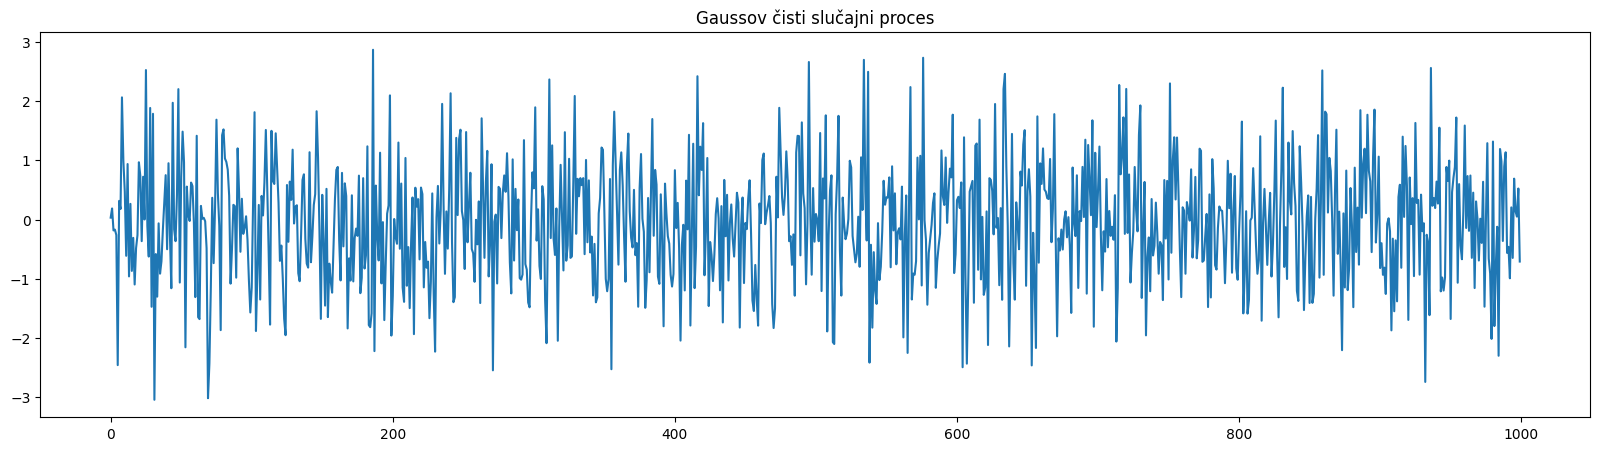

In [ ]:
bs = np.random.normal(size=1000)
bss = pd.Series(bs)
plt.figure(figsize=(20,5))
plt.plot(bss)
plt.title("Gaussov čisti slučajni proces")
plt.show()

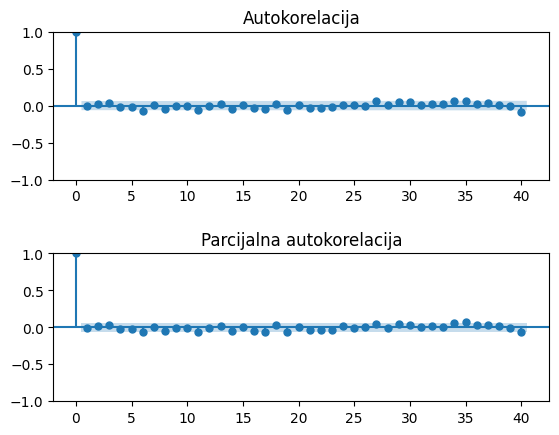

In [ ]:
plt.subplot2grid((2, 1), (0, 0))
plot_acf(bss, lags=40,ax=plt.gca())
plt.title('Autokorelacija')

plt.subplot2grid((2, 1), (1, 0))
plot_pacf(bss, lags=40, ax=plt.gca())
plt.title('Parcijalna autokorelacija')

plt.subplots_adjust(hspace=0.5)

Zašto je u analizi vremenskih nizova važan bijeli šum? \
Bijeli šum daje odgovor na ključno pitanje kada bi trebali stati s fitanjem modela. Imat ćemo reziduale tj. greške modela i pitat ćemo se jesmo li mogli bolje i jesmo li zaista gotovi.
Ako imamo model koji predviđa vrijednosti vremenskog niza i model rezultira rezidualima koji tvore bijeli šum, to znači da smo uspijeli shvatiti proces i objasniti svaki oblik korelacije. Dakle, imamo odličan model čiji su reziduali bijeli šumovi (nešto totalno nepredvidivo).


**Prilikom analize vremenskih nizova, glavni fokus je na pronalaženju modela čije su greške realizacija bijelog šuma.**

# Slučajna šetnja

Neka je $X_0$ slučajna varijabla i neka je $(W_n, n \in \mathbb{N})$ bijeli šum. Za $n \in \mathbb{N}$ definiramo slučajnu varijablu $X_n=X_{n-1} + W_n$. Slučajni proces $(X_n, n \in \mathbb{N})$ nazivamo **slučajna šetnja**.

Primijetimo da vrijedi: \
> * $\mathbb{E}[X_n] = \mathbb{E}[X_0], \forall n \in \mathbb{N}$ --> očekivanje ne ovisi o vremenu \
> * $ {Var}[X_n]={Var}[X_0 + \sum_{i=1}^{n} W_i]=[nezavisnost]= {Var}[X_0] + \sum_{i=1}^{n} {Var}[W_i] = {Var}[X_0] + n\sigma^2 $ --> varijanca je funkcija vremena (povećava se linearno s vremenom) \

Dakle, slučajna šetnja **nije slabo stacionaran proces**.

Primjer slučajne šetnje je šetnja pijanca. Zbog njegovog pijanog stanja, svaki korak koji napravi jednako je vjerojatno da će biti jedan korak naprijed ili jedan korak unatrag, neovisno o bilo kojem drugom koraku.
Odnosno i-ti korak je slučajna varijabla $Z_i$ sa distribucijom $Z_i \sim ( \substack{\text{-1  1} \\ \text{0.5 0.5}} )$ te su $Z_i, \forall i \in \mathbb{N} $ nezavisne slučajne varijable. \
Položaj pijanca nakon n koraka je slučajna varijabla
$X_n = Z_1 + Z_2 + \dots + Z_n$. \

Pretpostavimo da je krenio s pozicije 0.


<img src="https://www.baeldung.com/wp-content/uploads/sites/4/2022/02/scasdasdasd.drawio.png" width="400" height="80"/>

Nakon prvog koraka:

<img src="https://www.baeldung.com/wp-content/uploads/sites/4/2022/02/scasdasdasd.drawio-1.png" width="400" height="80"/>

 može završiti na poziciji -1 ili 1 s jednakom vjerojatnošću $\frac{1}{2}$.

Nakon drugog koraka:

<img src="https://www.baeldung.com/wp-content/uploads/sites/4/2022/02/scasdasdasd.drawio-2.png" width="400" height="80"/>

 potencijalne pozicije su -2, 0 i 2. Vjerojatnost da se nalazi na poziciji -2 jednaka je vjerojatnosti da se nalazi na poziciji 2 i iznosi $\frac{1}{4}$. Vjerojatnost da se nalazi na poziciji 0 jednaka je $\frac{1}{2}$.

Nakon trećeg koraka:

<img src="https://www.baeldung.com/wp-content/uploads/sites/4/2022/02/scasdasdasd.drawio-3.png" width="400" height="80"/>

potencijalne pozicije su -3, -1, 1 i 3. Vjerojatnost da se nalazi na poziciji -3 jednaka je vjerojatnosti da se nalazi na poziciji 3 i iznosi $\frac{1}{8}$. Vjerojatnost da se nalazi na poziciji -1 jednaka je vjerojatnosti da se nalazi na poziciji 1 i iznosi $\frac{3}{8}$. \

Možemo primijetiti da kada je broj koraka neparan, sve moguće pozicije u kojima može završiti pijanac su neparni brojevi. Slično, za paran broj koraka, sve moguće pozicije su parni brojevi.

Očekivanje slučajne varijable  $X_j$ je 0.











Simulirajmo slučajnu šetnju.

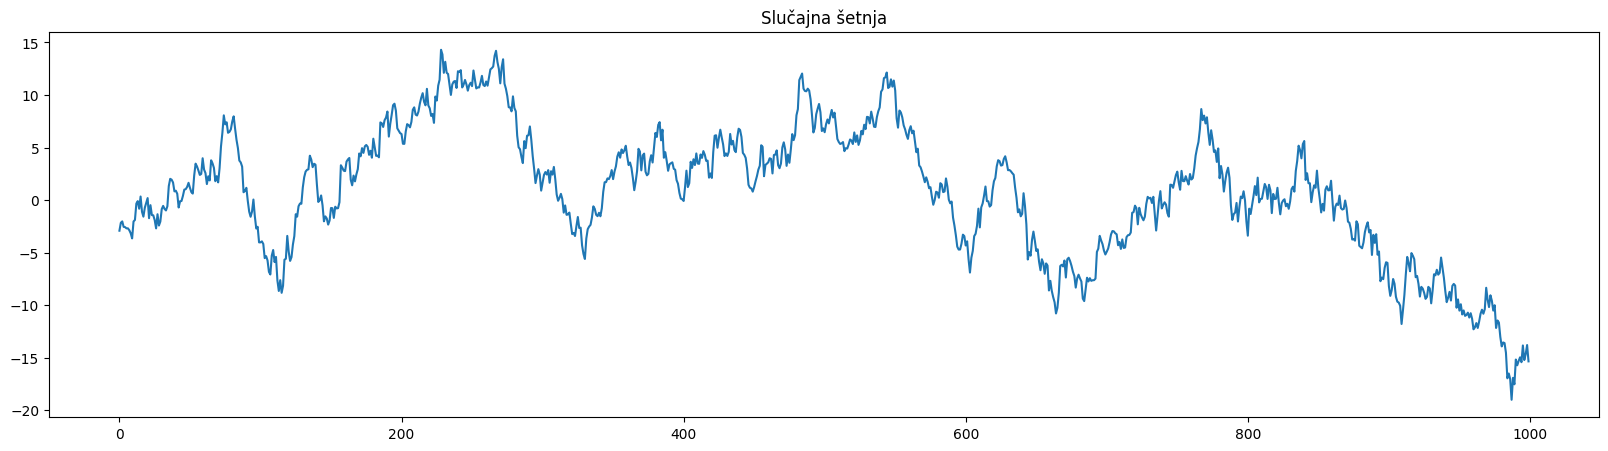

In [ ]:
x = w = np.random.normal(size=1000)
for n in range(1000):
    x[n] = x[n-1] + w[n]

plt.figure(figsize=(20,5))
plt.plot(x)
plt.title("Slučajna šetnja")
plt.show()

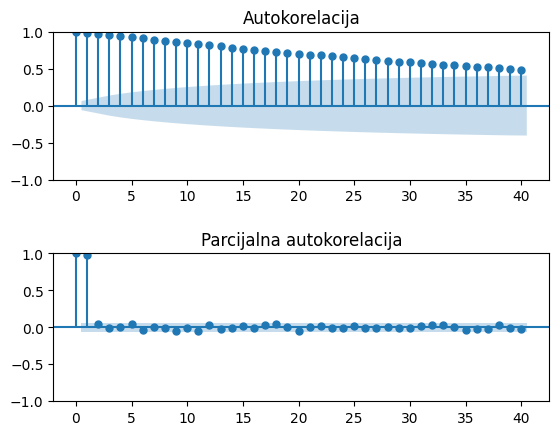

In [ ]:
plt.subplot2grid((2, 1), (0, 0))
plot_acf(x, lags=40,ax=plt.gca())
plt.title('Autokorelacija')

plt.subplot2grid((2, 1), (1, 0))
plot_pacf(x, lags=40, ax=plt.gca())
plt.title('Parcijalna autokorelacija')

plt.subplots_adjust(hspace=0.5)

Ekonomisti su dugo tvrdili da su cijene dionica zapravo nasumične i nepredvidive te da je prošla cijena imala mali ili nikakav utjecaj na buduće promjene. Glavna kritika teorije slučajne šetnje je da previše pojednostavljuje složenost financijskih tržišta, zanemarujući utjecaj ponašanja i radnji tržišnih sudionika na cijene i ishode. Na cijene također mogu utjecati neslučajni čimbenici, poput promjena kamatnih stopa ili državnih propisa, ili manje etičkih praksi poput trgovanja povlaštenim informacijama i tržišne manipulacije. Tržišni stručnjaci tvrde da povijesni obrasci i trendovi mogu, zapravo, pružiti korisne informacije o budućim cijenama. Druga kritika je da slučajna šetnja implicitno pretpostavlja da svi ulagači imaju iste informacije, dok u stvarnosti neki ulagači imaju pristup većem broju i boljim informacijama od drugih (kao što su veliki, institucionalni ulagači). Jedan od ključnih kritičara bio je Benoit Mandelbrot, matematičar koji je tvrdio da cijene dionica nisu nasumične i da ne slijede normalnu distribuciju, što su ključne pretpostavke slučajne šetnje. Primijetio je da cijene dionica pokazuju dugoročnu ovisnost.

# Autoregresijski proces (AR)

Primjer:\
Prirodno je prognozirati današnju vrijednost na temelju iznosa te vrijednosti jučer, prekjučer, prošli tjedan... Zato šta se ta vrijednost možda mijenja na neki predvidiv način i postoji nekakv uzorak kojeg želimo uočit kako bi dobili bolje predviđanje. \

npr. proizvodač kolača svaki dan razmatra koliko kolača će proizvest\
$y_t$= količina kolača koja je potrebna za ovaj mjesec\
$y_{t-1}$= količina kolača koje je bila potrebna prethodni mjesec\
$y_{t-2}$= količina kolača koje je bila potrebna prije dva mjeseca\
itd...\
želimo predvidjeti $y_t$ uz pomoć nekih prethodnih $y_k,y_l \dots$ \

Naivan pristup je da uzmemo sve korake u model tj. da uzmemo $y_{t-1},y_{t-2},y_{t-3} \dots $. Naizgled bi imali jak model,ali bi on potencjalno bio jako prilagođen tim podatcima i ne bi dobro generalizirao.\
Preferiramo jednostavniji model jer će se on bolje držati kroz vrijeme.

**Autoregresijski proces** (autoregressive process, AR) je slučajni proces $y_t$ koji se
definira temeljem prethodnih p vrijednosti tog procesa $y_{t-1}, y_{t-2}, … , y_{t-p}$:

$$y_t=\phi_{0} + \phi_{1} y_{t-1}+  \phi_{2} y_{t-2} + \dots +\phi_{p} y_{t-p}+ \varepsilon_t,  \quad(1)$$

gdje su $\varepsilon_t \sim N(0,\sigma^2) \; NJD$ , $\phi_{j},j\in \{1, \dots p\}$ autoregresijski parametri te $\phi_{0}$ konstanta.Općenito se autoregresijski proces označava s AR(p), kako bi se temeljem pomaka
p znalo koliko je prethodnih pomaka (ili lagova, engl. lag) uključeno u model. \
Kompaktnije se model može zapisati i na sljedeći način:

$$y_t = \phi_0 + \sum_{j=1}^{p} \phi_jy_{t-j} +  \varepsilon_{t} \quad (2)$$

Češće se koristi sljedeći zapis AR(p) procesa gdje se koristi operator pomaka (engl. lag operator) L:

$$ Ly_t = y_{t-1}, \quad(3)$$

koji pomiče vremenski indeks t za jednu vrijednost unazad, $t-1$. Dakle, to je linearni operator
koji pomiče vrijednosti niza $y_t$ za određeni pomak. Općenito vrijedi

$$L^jy_j = y_{t-j} \quad (4) $$

Uvrštavanjem supstitucije (4) u (1) dobivamo:

$$ y_t = \phi_{0} + \phi_{1} Ly_t + \phi_{2} L^2y_t + \dots +\phi_{p} L^py_t+ \varepsilon_t $$

$$ (1- \phi_1 L + \phi_2 L^2 + \dots +\phi_p L^p)y_t = \phi_{0} + \varepsilon_t $$

$$ \phi(L)y_t = \phi_{0} + \varepsilon_t, $$
gdje je $\phi(L) = 1- \phi_1 L + \phi_2 L^2 + \dots +\phi_p L^p$ polinom reda p. \

Traženje nul-točaka polinoma $\phi(L)$
na način da se operator pomaka L zamijeni nepoznanicama $\lambda:$ $1- \phi_1 \lambda + \phi_2 \lambda^2 + \dots +\phi_p \lambda^p=0$, dobiva se  **inverzna karakteristična jednadžba procesa**. Rješenja
karakteristične jednadžbe nazivaju se **korijeni polinoma** $ \phi(L).$
Polinom reda p ima ukupno p korijena i oni određuju „ponašanje“
vremenskog niza. Ako je apsolutna vrijednost svih korijena inverzne karakteristične
jednadžbe veća od jedinice onda je AR(p) (slabo) **stacionaran**.



## AR(1) proces

**Autoregresijski proces prvog reda, AR(1)** \

<br>


* Autoregresijski proces prvog reda definiran je kao:

$$ y_t=\phi_{0} + \phi_{1} y_{t-1}+ \varepsilon_t,\; \varepsilon_t \sim N(0,\sigma^2) \; NJD  \quad(1) $$

<br>

* Uvjeti da bi AR(1) proces bio stacionaran?

Očekivana vrijednost AR(1) procesa je $\mathbb{E}[y_t]=\phi_{0} + \phi_{1}\mathbb{E}[y_{t-1}]$, a zbog uvjeta stacionarnosti je $\mathbb{E}[y_t]=\mathbb{E}[y_{t-1}] \equiv \mu$ pa vrijedi:

$$\mu=\phi_{0}+\phi_{1}\mu \Rightarrow \mu = \frac{\phi_{0}}{1-\phi_{1}}.$$
Da bi očekivana vrijednost bila konačna mora vrijediti $\phi_{1}\neq1$. \
**$\phi_{1}\neq1$ je dovoljan, ali ne i nužan uvjet da bi proces bio stacionaran.**

Pogledajmo kako izgledaju korijeni inverzne karakteristične jednadžbe:
$$ y_t=\phi_{0} + \phi_{1} Ly_t+ \varepsilon_t \Rightarrow (1-  \phi_{1}L)y_t= \phi_{0} + \varepsilon_t$$
za polinom $(1-  \phi_{1}L)$ rješimo sljedeću jednadžbu:

$$ 1-  \phi_{1} \lambda=0 \Rightarrow \lambda=\frac{1}{ \phi_1} .$$

**Da bi proces bio stacionaran, mora vrijediti $\lvert \frac{1}{ \phi_1} \rvert > 1$, odnosno $\lvert \phi_1\rvert < 1$.** \
Dakle, AR(1) proces je stacionaran ako vrijedi $\lvert \phi_1\rvert < 1$, odnosno $-1<\phi_1 < 1$.

Varijanca AR(1) procesa je

$$ \text{Var}[y_t]= \mathbb{E}[(y_t - \mathbb{E}[y_t])^2]= \mathbb{E}[(y_t - \mu)^2] = \phi_{1}^2\mathbb{E}[(y_{t-1} - \mu )^2] + \mathbb{E}[\varepsilon_t^2],$$

zbog uvjeta stacionarnosti je $\mathbb{E}[(y_t - \mu)^2] = \mathbb{E}[(y_{t-1} - \mu)^2]$ pa je

$$ \text{Var}[y_t]= \phi_{1}^2 \text{Var}[y_t] + \sigma^2 \Rightarrow \text{Var}[y_t]= \frac{ \sigma^2}{ 1-\phi_1^2}$$

Kako varijanca procesa mora biti pozitivan broj, vrijedi $ \phi_1^2 < 1$.\
**Ovo je ujedno i nužan i dovoljan uvjet za stacionarnost procesa jer ukljčuje već obrađen uvjet stacionarnosti.**

Dakle, **AR(1) proces je (slabo) stacionaran ako vrijedi $-1 < \phi_1 < 1$**

* ACF i PACF za AR(1):

ACF  koeficijenti za AR(1) proces se ponašaju na sljedeći način:
$$ \rho_h =
  \begin{cases}
    \phi_1, & \text{za } h=1 , \\
    \phi_1^h, & \text{za } x > 1.
  \end{cases}
$$

Uz uvijet stacionarnosti $-1<\phi_1 < 1$ vrijedi da se **koeficijenti autokorelacijske funkcije eksponencijalno ili sinusoidno smanjuju**.

PACF koeficijenti za AR(1) proces se ponašaju na sljedeći način:

$$ \phi_h =
  \begin{cases}
    \phi_1, & \text{za } h=1 , \\
    0, & \text{za } h > 1.
  \end{cases}
$$
(iščezavaju nakon pomaka 1)

**Potpuno analogno za AR(p) proces se ACF koeficijenti eksponencijalno ili sinusodialno smanjuju, a PACF iščezavaju nakon pomaka p.**

## simulacija AR(2)

Simulirajmo AR(2) proces s koficijentima 0.5 i -0.3.
$$y_t= 0.5 y_{t-1}+  (-0.3) y_{t-2} + \varepsilon_t $$

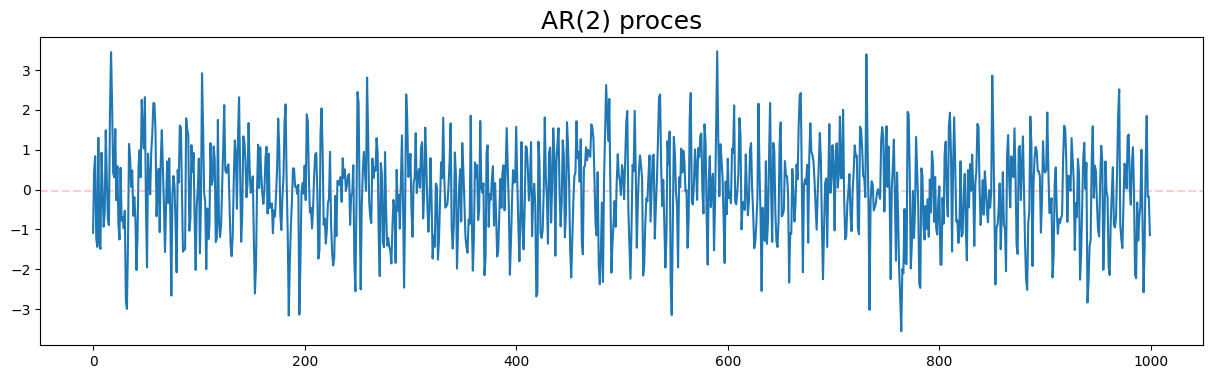

In [ ]:
#simuliranje AR(2) procesa
import statsmodels.tsa.api as smt
n = 1000
phi = np.array([0.5, -0.3])
theta = np.array([0])    # thete koficijenti 0 jer smuliramo AR proces

ar = np.r_[1, -phi]     #trebamo naglasiti da je vrijednost nultog-laga 1
                        #phi koeficijenti koje saljemo u arma_generate_sample moraju biti suprotnog predznaka
                        # np.r_ horizontalno spajanje nizova
ma = np.r_[1, theta]

np.random.seed(123)
ar2 = smt.arma_generate_sample(ar=ar, ma=ma, nsample=n)
plt.figure(figsize=(15,4))
plt.axhline(np.mean(ar2), color='r',linestyle='--',alpha=0.2)
plt.plot(ar2)
plt.title('AR(2) proces', fontsize=18)
plt.show()

Da bismo za neku realizaciju vremenskog niza ispitali o koliko prethodnih
članova ovisi član, koristimo ACF i PACF grafove.

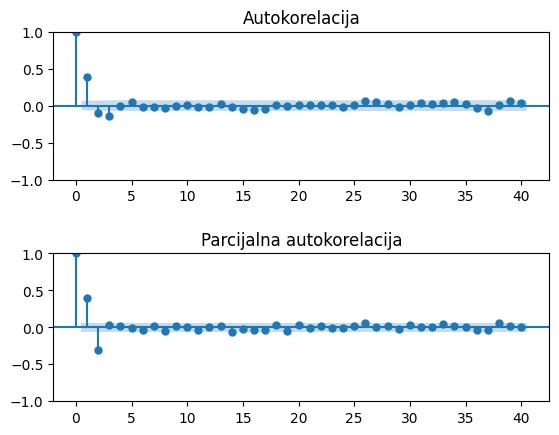

In [ ]:
#from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.subplot2grid((2, 1), (0, 0))
plot_acf(ar2, lags=40,ax=plt.gca())
plt.title('Autokorelacija')

plt.subplot2grid((2, 1), (1, 0))
plot_pacf(ar2, lags=40, ax=plt.gca())
plt.title('Parcijalna autokorelacija')

plt.subplots_adjust(hspace=0.5)

Očekivano, iz PACF grafa zaključujemo da je vjerojatno red jednak 2. Koliki je najbolji red za opisivanje nekog procesa kasnije na stvarnim podatcima ćemo zaključiti uz pomoć kriterija za usporedbu modela.

Sada ćemo implementirat AR(2) kako bi  procijenili  koeficijente modela te ćemo se uvjeriti da su blizu  simuliranim vrijednostima.

In [ ]:
mdl = smt.ARIMA(ar2, order=(2, 0,0)).fit()
print(mdl.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1419.505
Date:                Tue, 30 Jan 2024   AIC                           2847.009
Time:                        09:20:12   BIC                           2866.641
Sample:                             0   HQIC                          2854.471
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0500      0.040     -1.246      0.213      -0.129       0.029
ar.L1          0.5132      0.031     16.326      0.000       0.452       0.575
ar.L2         -0.3037      0.031     -9.648      0.0

Jednadžba modela sa procijenjenim koeficijentima:
$$ \hat{y_t}= -0.0500 +  0.5132 \cdot y_{t-1}+  (-0.3037) \cdot y_{t-2} + 1.0008 \cdot \varepsilon_t $$

## AR na SLB podatcima

Za početak ćemo implementirat AR model određenog reda i odmah predvidjeti sve datume od 2023-09-02 do i 2023-12-01.

In [ ]:
SLB_povrati.index

DatetimeIndex(['2010-01-05', '2010-01-06', '2010-01-07', '2010-01-08',
               '2010-01-09', '2010-01-10', '2010-01-11', '2010-01-12',
               '2010-01-13', '2010-01-14',
               ...
               '2023-11-22', '2023-11-23', '2023-11-24', '2023-11-25',
               '2023-11-26', '2023-11-27', '2023-11-28', '2023-11-29',
               '2023-11-30', '2023-12-01'],
              dtype='datetime64[ns]', name='Date', length=5079, freq=None)

In [ ]:
# Postavljanje frekvencije na dnevnu
SLB_povrati.index = pd.date_range(start=SLB_povrati.index.min(), end=SLB_povrati.index.max(), freq='D')

In [ ]:
SLB_povrati.index

DatetimeIndex(['2010-01-05', '2010-01-06', '2010-01-07', '2010-01-08',
               '2010-01-09', '2010-01-10', '2010-01-11', '2010-01-12',
               '2010-01-13', '2010-01-14',
               ...
               '2023-11-22', '2023-11-23', '2023-11-24', '2023-11-25',
               '2023-11-26', '2023-11-27', '2023-11-28', '2023-11-29',
               '2023-11-30', '2023-12-01'],
              dtype='datetime64[ns]', length=5079, freq='D')

Nacrtajmo  ACF i PACF plotove kako bi odredili red AR procesa.

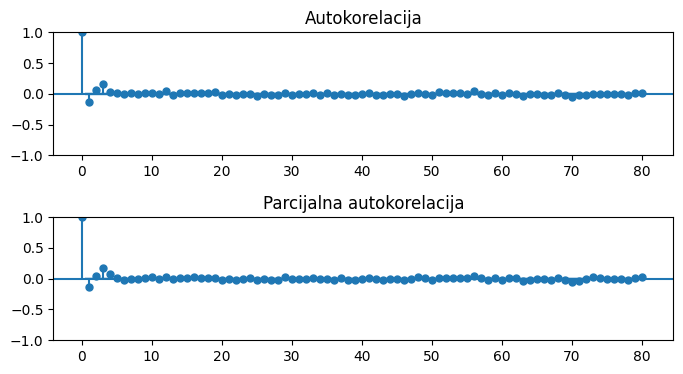

In [ ]:
#from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(8, 4))
plt.subplot2grid((2, 1), (0, 0))
plot_acf(SLB_povrati, lags=80,ax=plt.gca())
plt.title('Autokorelacija')

plt.subplot2grid((2, 1), (1, 0))
plot_pacf(SLB_povrati, lags=80, ax=plt.gca())
plt.title('Parcijalna autokorelacija')

plt.subplots_adjust(hspace=0.5)

Iz PACAF grafa odlučujemo se za AR model reda 4.

In [ ]:
#podjela skupa na skup za treniranje i testiranje

train_end = datetime(2023,9,1)
test_end = datetime(2023,12,1)
train_data = SLB_povrati[:train_end]
#from datetime import datetime, timedelta
test_data = SLB_povrati[train_end + timedelta(days=1):test_end]

In [ ]:
#fitanje modela

from statsmodels.tsa.arima.model import ARIMA
model_AR4= ARIMA(train_data,order=(4,0,0))
from time import time
start=time()
model_fitAR4=model_AR4.fit()
end=time() #koliko treba da se fita model
print("potrebno vrijme:",end-start)

potrebno vrijme: 1.5311284065246582


In [ ]:
print(model_fitAR4.summary())

                               SARIMAX Results                                
Dep. Variable:                Povrati   No. Observations:                 4988
Model:                 ARIMA(4, 0, 0)   Log Likelihood               13225.877
Date:                Tue, 30 Jan 2024   AIC                         -26439.753
Time:                        09:21:09   BIC                         -26400.664
Sample:                    01-05-2010   HQIC                        -26426.052
                         - 09-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.209e-05      0.000     -0.075      0.940      -0.001       0.001
ar.L1         -0.1512      0.011    -14.210      0.000      -0.172      -0.130
ar.L2          0.0572      0.010      5.648      0.0

In [ ]:
#prvi i zadnji datum predvidanja
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
pred_start_date

Timestamp('2023-09-02 00:00:00', freq='D')

In [ ]:
nase_predvidanjeAR4 = model_fitAR4.predict(start=pred_start_date,end= pred_end_date)
nase_predvidanjeAR4

2023-09-02   -0.000010
2023-09-03    0.002076
2023-09-04    0.003177
2023-09-05    0.001233
2023-09-06    0.000356
                ...   
2023-11-27   -0.000022
2023-11-28   -0.000022
2023-11-29   -0.000022
2023-11-30   -0.000022
2023-12-01   -0.000022
Freq: D, Name: predicted_mean, Length: 91, dtype: float64

In [ ]:
test_data_AR4=test_data.copy()
test_data_AR4["predvidanje_AR4"]=nase_predvidanjeAR4
test_data_AR4["reziduali_AR4"]=test_data_AR4["Povrati"] - test_data_AR4["predvidanje_AR4"]
test_data_AR4.head()

Povrati  predvidanje_AR4  reziduali_AR4
2023-09-02 -0.004367        -0.000010      -0.004357
2023-09-03  0.000000         0.002076      -0.002076
2023-09-04  0.010106         0.003177       0.006930
2023-09-05 -0.004243         0.001233      -0.005475
2023-09-06  0.013035         0.000356       0.012679

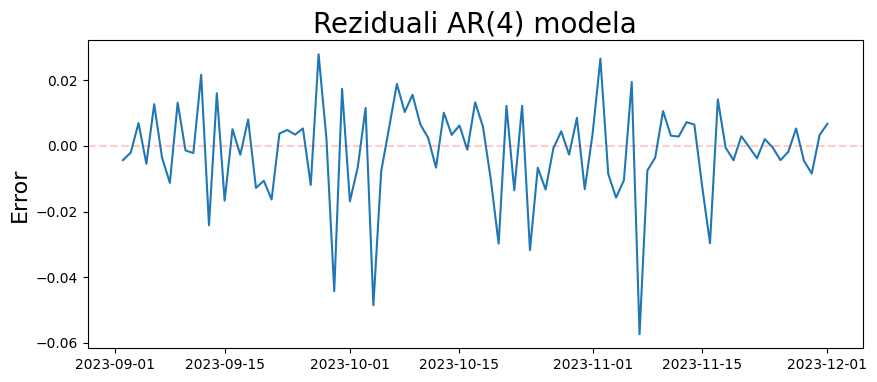

In [ ]:
#prikaz reziduala
plt.figure(figsize=(10,4))
plt.plot (test_data_AR4.reziduali_AR4)
plt.title('Reziduali AR(4) modela',fontsize=20)
plt.ylabel('Error',fontsize=16)
plt.axhline(0, color='r',linestyle='--',alpha=0.2)
plt.show()

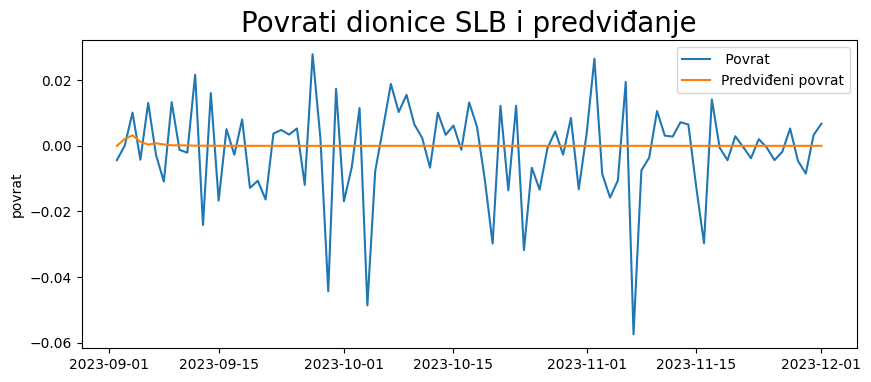

In [ ]:
#predviđena vs stvarna vrijednost
plt.figure(figsize=(10,4))
plt.plot(test_data_AR4.Povrati)
plt.plot (test_data_AR4.predvidanje_AR4)
plt.legend ( (' Povrat ','Predviđeni povrat'), fontsize=10)
plt.title("Povrati dionice SLB i predviđanje",fontsize=20)
plt.ylabel ("povrat",fontsize=10)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mse=mean_squared_error(test_data_AR4.Povrati, test_data_AR4.predvidanje_AR4)
print(f"Srednja kvadratna pogreška (MSE): {mse}")

Srednja kvadratna pogreška (MSE): 0.0002164311449272731


### AR(4) s aktivnim predviđanjem

Na ovakav način nismo dobili baš dobro predviđanje. Što idemo dalje u budućnost to smo manje sigurni i lošije predviđamo. \
Umjesto da odmah predviđamo cijeli perod od 2023-09-02 do i 2023-12-01 predviđat ćemo po jedan dan unaprijed. Odnosno predviđamo jedan dan pa uzmemo u obzir stvarnu vrijednost tog dana i napravimo predviđanje za sljedeći dan.
Dakle, radit ćemo aktivno predviđanje (Rolling Forecast)

**Rolling Forecast**



ideja: predviđamo  jedan dan unaprijed svaki put \
treniramo na danima  1,2, ... ,k - 3 -> predviđamo dan k - 2 \
treniramo na danima 1,2,. . ., k - 3, k - 2 -> predviđamo dan k - 1 \
treniramo na danima  1, 2,.. ., k - 3, k - 2, k - 1 -> predviđamo dan k

In [ ]:
#-kreiranje modela
#from time import time
start=time()
predictions_rolling_AR4 = pd.Series(dtype='float64')
for kraj in (test_data.index):
  print(kraj-timedelta(days=1))
  train_data= SLB_povrati[:((kraj)- timedelta(days=1))]
  model = ARIMA(train_data, order=(4,0,0))
  model_fit = model.fit()
  pred = model_fit.predict(kraj)
  predictions_rolling_AR4.loc[kraj] = pred.loc[kraj]
end=time()
print("potrebno vrijme:",end-start)

2023-09-01 00:00:00
2023-09-02 00:00:00
2023-09-03 00:00:00
2023-09-04 00:00:00
2023-09-05 00:00:00
2023-09-06 00:00:00
2023-09-07 00:00:00
2023-09-08 00:00:00
2023-09-09 00:00:00
2023-09-10 00:00:00
2023-09-11 00:00:00
2023-09-12 00:00:00
2023-09-13 00:00:00
2023-09-14 00:00:00
2023-09-15 00:00:00
2023-09-16 00:00:00
2023-09-17 00:00:00
2023-09-18 00:00:00
2023-09-19 00:00:00
2023-09-20 00:00:00
2023-09-21 00:00:00
2023-09-22 00:00:00
2023-09-23 00:00:00
2023-09-24 00:00:00
2023-09-25 00:00:00
2023-09-26 00:00:00
2023-09-27 00:00:00
2023-09-28 00:00:00
2023-09-29 00:00:00
2023-09-30 00:00:00
2023-10-01 00:00:00
2023-10-02 00:00:00
2023-10-03 00:00:00
2023-10-04 00:00:00
2023-10-05 00:00:00
2023-10-06 00:00:00
2023-10-07 00:00:00
2023-10-08 00:00:00
2023-10-09 00:00:00
2023-10-10 00:00:00
2023-10-11 00:00:00
2023-10-12 00:00:00
2023-10-13 00:00:00
2023-10-14 00:00:00
2023-10-15 00:00:00
2023-10-16 00:00:00
2023-10-17 00:00:00
2023-10-18 00:00:00
2023-10-19 00:00:00
2023-10-20 00:00:00


In [ ]:
test_data_AR4_pred_rolling=test_data.copy()
test_data_AR4_pred_rolling["AR4_pred_rolling"]=predictions_rolling_AR4
test_data_AR4_pred_rolling["AR4_residuals_rolling"]=test_data_AR4_pred_rolling["Povrati"] - test_data_AR4_pred_rolling["AR4_pred_rolling"]
test_data_AR4_pred_rolling.head()

Povrati  AR4_pred_rolling  AR4_residuals_rolling
2023-09-02 -0.004367         -0.000010              -0.004357
2023-09-03  0.000000          0.002734              -0.002734
2023-09-04  0.010106          0.003240               0.006866
2023-09-05 -0.004243         -0.000732              -0.003511
2023-09-06  0.013035          0.000840               0.012196

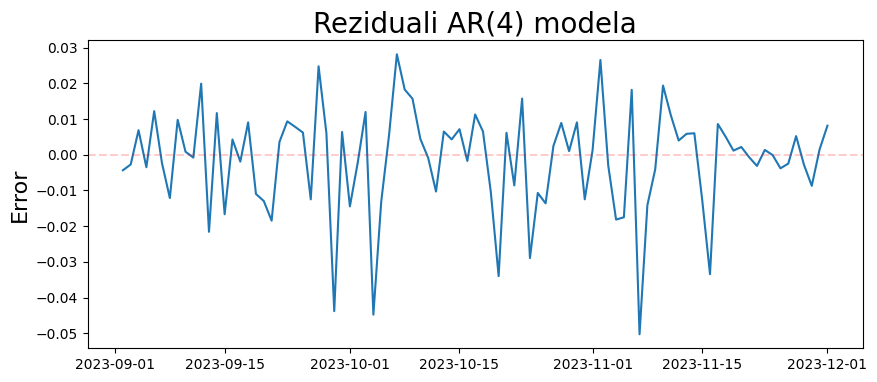

In [ ]:
plt.figure(figsize=(10,4))
plt.plot (test_data_AR4_pred_rolling.AR4_residuals_rolling)
plt.title( 'Reziduali AR(4) modela', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--',alpha=0.2)
plt.show()

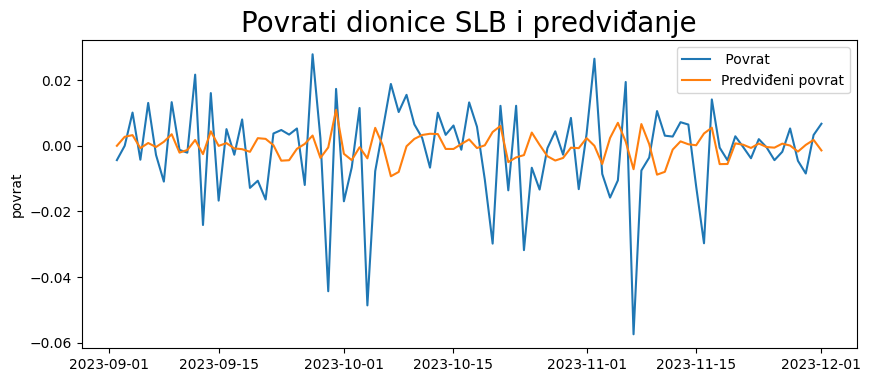

In [ ]:
#predvidena vs stvarna vrijednost
plt.figure(figsize=(10,4))
plt.plot(test_data_AR4_pred_rolling.Povrati)
plt.plot (test_data_AR4_pred_rolling["AR4_pred_rolling"])
plt.legend ( (' Povrat ','Predviđeni povrat'), fontsize=10)
plt.title("Povrati dionice SLB i predviđanje",fontsize=20)
plt.ylabel ("povrat",fontsize=10)
plt.show()

In [ ]:
#from sklearn.metrics import mean_squared_error
mse=mean_squared_error(test_data_AR4_pred_rolling.Povrati, test_data_AR4_pred_rolling["AR4_pred_rolling"])
print(f"Srednja kvadratna pogreška (MSE): {mse}")

Srednja kvadratna pogreška (MSE): 0.00021397091439950494


Dobivamo  bolje predviđanje.

### AR(p)

Pronađimo sada potencijalno bolji red od AR uz pomoć informacijskih kriterija, uz ograničenje na red $p \leq 10$. Ovo nije pretjerano ograničenje. Ako bismo imali veće redove, to uglavnom znači da postoji nešto što model nije uspio uhvatiti pa se to trudi postići s  višim redom.

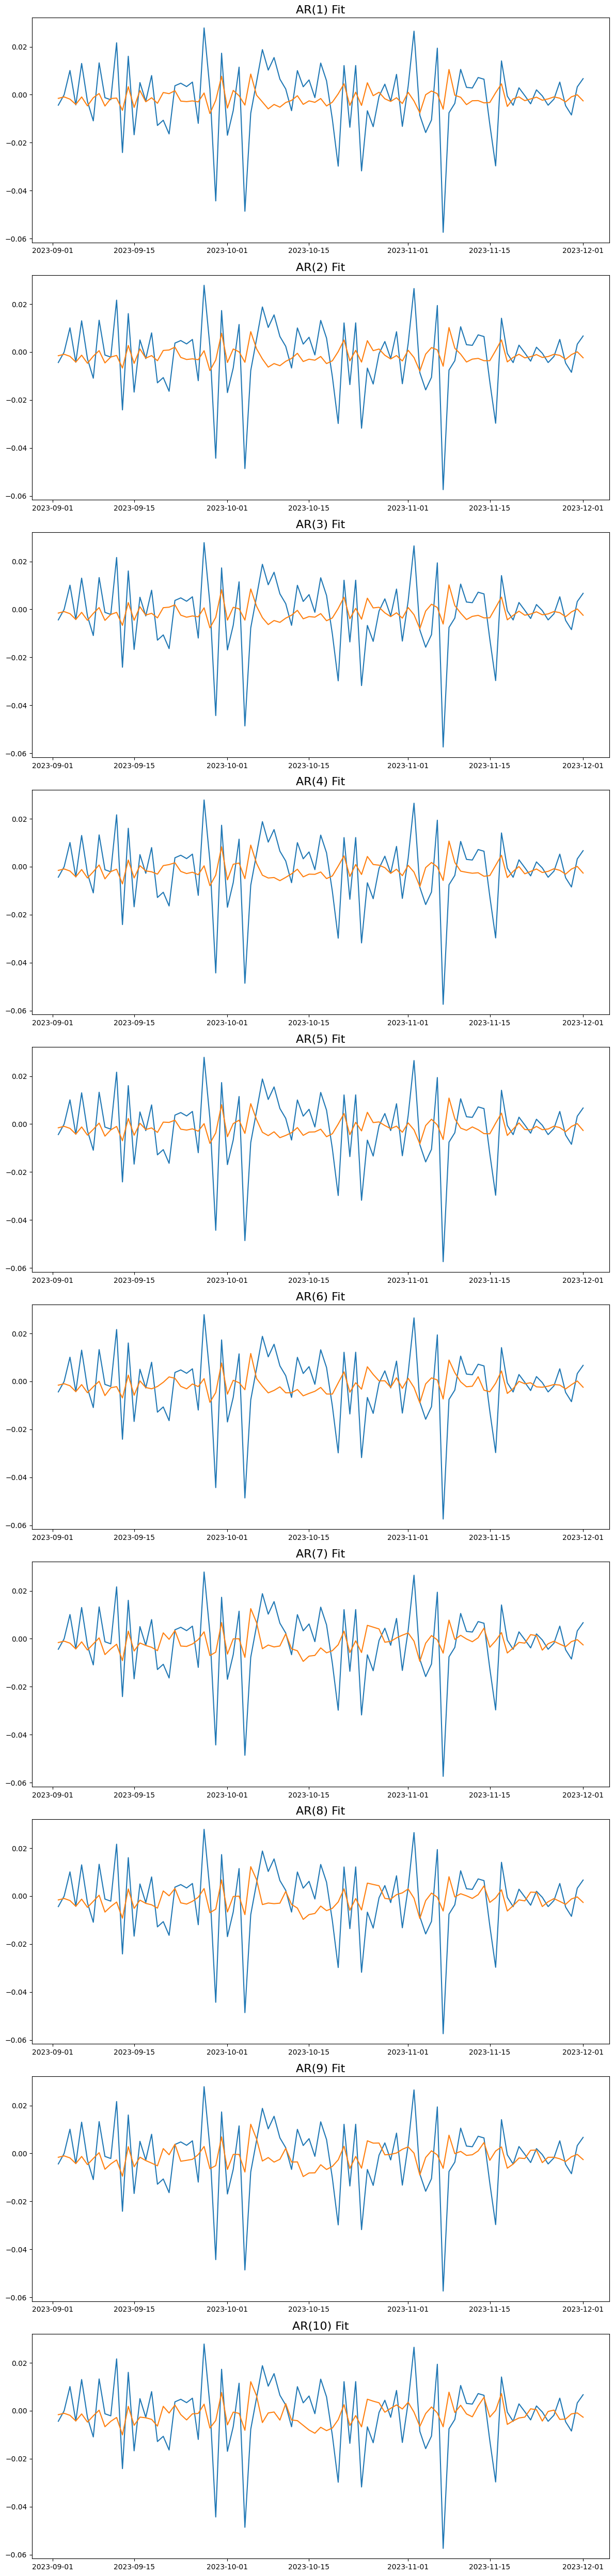

In [ ]:
plt.figure(figsize=(12,50))

ar_orders=[i+1 for i in range(10)]
fitted_model_dict = {}

for idx, ar_order in enumerate(ar_orders):

    #izrada AR(ar_order) modela
    ar_model = ARIMA(test_data.Povrati, order=(ar_order,0,0))
    ar_model_fit = ar_model.fit()
    fitted_model_dict[ar_order] = ar_model_fit
    plt.subplot(10,1,idx+1)
    plt.plot(test_data.Povrati)
    plt.plot(ar_model_fit.fittedvalues)
    plt.title('AR(%s) Fit'%ar_order, fontsize=16)

plt.tight_layout()

Već i sami pogledom na grafove vidimo da povećanjem parametara nismo ništa puno bliže stvarnim vrijednostima.

In [ ]:
#usporedba AIC-a
for ar_order in ar_orders:
    print('AIC za AR(%s): %s'%(ar_order, fitted_model_dict[ar_order].aic))

AIC za AR(1): -508.66069192618477
AIC za AR(2): -506.75152778241113
AIC za AR(3): -504.7630061273114
AIC za AR(4): -502.86087569177005
AIC za AR(5): -500.9290874079138
AIC za AR(6): -499.44521616479983
AIC za AR(7): -499.43241700323574
AIC za AR(8): -497.45972674012137
AIC za AR(9): -495.551170389983
AIC za AR(10): -494.1597108981341
AIC za AR(11): -492.8028377563776
AIC za AR(12): -490.7997456359292
AIC za AR(13): -489.39131447573095
AIC za AR(14): -487.4005092948163
AIC za AR(15): -485.4148760040555
AIC za AR(16): -485.4043851717835
AIC za AR(17): -491.7573037797938
AIC za AR(18): -489.704096836257
AIC za AR(19): -487.7664696746782
AIC za AR(20): -485.77768022243276


In [ ]:
#usporedba BIC-a
for ar_order in ar_orders:
    print('BIC za AR(%s): %s'%(ar_order, fitted_model_dict[ar_order].bic))

BIC za AR(1): -501.1281134066342
BIC za AR(2): -496.7080897563437
BIC za AR(3): -492.20870859472717
BIC za AR(4): -487.79571865266894
BIC za AR(5): -483.35307086229585
BIC za AR(6): -479.358340112665
BIC za AR(7): -476.8346814445841
BIC za AR(8): -472.35113167495285
BIC za AR(9): -467.9317158182976
BIC za AR(10): -464.0293968199319
BIC za AR(11): -460.1616641716585
BIC za AR(12): -455.64771254469326
BIC za AR(13): -451.72842187797823
BIC za AR(14): -447.22675719054666
BIC za AR(15): -442.73026439326907
BIC za AR(16): -440.20891405448015
BIC za AR(17): -444.0509731559737
BIC za AR(18): -439.48690670592
BIC za AR(19): -435.0384200378244
BIC za AR(20): -430.5387710790621


AIC i BIC kriteriji nam govore da je najbolji AR(1) pa ćemo ga i izgraditi na skupu podataka SLB_povrati.

In [ ]:
#kreiranje modela
start=time()
predictions_rolling_AR1 = pd.Series(dtype='float64')
for kraj in (test_data.index):
  print(kraj-timedelta(days=1))
  train_data= SLB_povrati[:((kraj)- timedelta(days=1))]
  model_best_AR1 = ARIMA(train_data, order=(1,0,0))
  model_fit_best_AR1 = model_best_AR1.fit()
  pred = model_fit_best_AR1.predict(kraj)
  predictions_rolling_AR1.loc[kraj] = pred.loc[kraj]
end=time()
print("potrebno vrijme:",end-start)

2023-09-01 00:00:00
2023-09-02 00:00:00
2023-09-03 00:00:00
2023-09-04 00:00:00
2023-09-05 00:00:00
2023-09-06 00:00:00
2023-09-07 00:00:00
2023-09-08 00:00:00
2023-09-09 00:00:00
2023-09-10 00:00:00
2023-09-11 00:00:00
2023-09-12 00:00:00
2023-09-13 00:00:00
2023-09-14 00:00:00
2023-09-15 00:00:00
2023-09-16 00:00:00
2023-09-17 00:00:00
2023-09-18 00:00:00
2023-09-19 00:00:00
2023-09-20 00:00:00
2023-09-21 00:00:00
2023-09-22 00:00:00
2023-09-23 00:00:00
2023-09-24 00:00:00
2023-09-25 00:00:00
2023-09-26 00:00:00
2023-09-27 00:00:00
2023-09-28 00:00:00
2023-09-29 00:00:00
2023-09-30 00:00:00
2023-10-01 00:00:00
2023-10-02 00:00:00
2023-10-03 00:00:00
2023-10-04 00:00:00
2023-10-05 00:00:00
2023-10-06 00:00:00
2023-10-07 00:00:00
2023-10-08 00:00:00
2023-10-09 00:00:00
2023-10-10 00:00:00
2023-10-11 00:00:00
2023-10-12 00:00:00
2023-10-13 00:00:00
2023-10-14 00:00:00
2023-10-15 00:00:00
2023-10-16 00:00:00
2023-10-17 00:00:00
2023-10-18 00:00:00
2023-10-19 00:00:00
2023-10-20 00:00:00


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



2023-11-17 00:00:00
2023-11-18 00:00:00
2023-11-19 00:00:00
2023-11-20 00:00:00
2023-11-21 00:00:00
2023-11-22 00:00:00
2023-11-23 00:00:00
2023-11-24 00:00:00
2023-11-25 00:00:00
2023-11-26 00:00:00
2023-11-27 00:00:00
2023-11-28 00:00:00
2023-11-29 00:00:00
2023-11-30 00:00:00
potrebno vrijme: 45.30611872673035


In [ ]:
test_data_AR1_pred_rolling_najbolji=test_data.copy()
test_data_AR1_pred_rolling_najbolji["predvidanje_rolling_AR1"]=predictions_rolling_AR1
test_data_AR1_pred_rolling_najbolji["residuals_rolling_AR1"]=test_data_AR1_pred_rolling_najbolji["Povrati"] - test_data_AR1_pred_rolling_najbolji["predvidanje_rolling_AR1"]
test_data_AR1_pred_rolling_najbolji.head()

Povrati  predvidanje_rolling_AR1  residuals_rolling_AR1
2023-09-02 -0.004367                -0.002659              -0.001709
2023-09-03  0.000000                 0.000564              -0.000564
2023-09-04  0.010106                -0.000027               0.010133
2023-09-05 -0.004243                -0.001390              -0.002852
2023-09-06  0.013035                 0.000548               0.012487

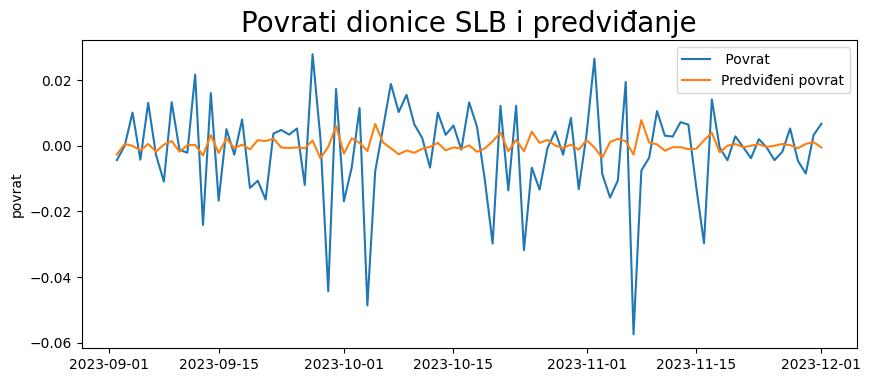

In [ ]:
#predvidena vs stvarna vrijednost
plt.figure(figsize=(10,4))
plt.plot(test_data_AR1_pred_rolling_najbolji.Povrati)
plt.plot (test_data_AR1_pred_rolling_najbolji["predvidanje_rolling_AR1"])
plt.legend ( (' Povrat ','Predviđeni povrat'), fontsize=10)
plt.title("Povrati dionice SLB i predviđanje",fontsize=20)
plt.ylabel ("povrat",fontsize=10)
plt.show()

In [ ]:
#from sklearn.metrics import mean_squared_error
mse=mean_squared_error(test_data_AR1_pred_rolling_najbolji.Povrati, test_data_AR1_pred_rolling_najbolji["predvidanje_rolling_AR1"])
print(f"Srednja kvadratna pogreška (MSE): {mse}")

Srednja kvadratna pogreška (MSE): 0.0002087909174307028


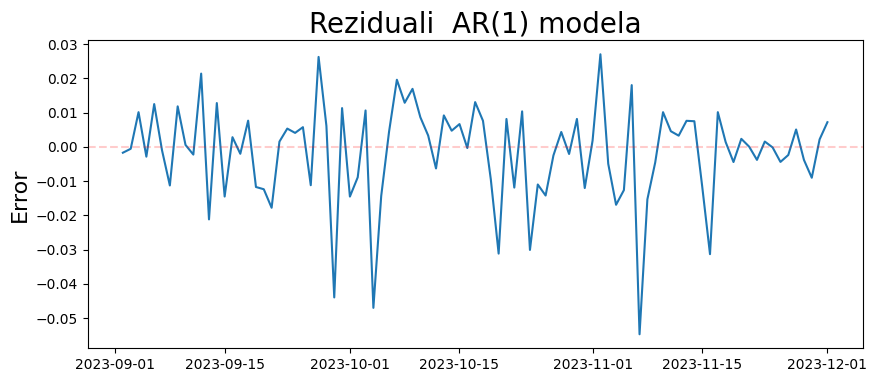

In [ ]:
plt.figure(figsize=(10,4))
plt.plot (test_data_AR1_pred_rolling_najbolji["residuals_rolling_AR1"])
plt.title( 'Reziduali  AR(1) modela', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--',alpha=0.2)
plt.show()

Zanima nas jesu li greške modela ralizacija bijelog šuma jer je tada model najbolji moguć u smislu da se komponenta greške ne može predvidjeti niti modelirati. \
Ispitajmo jesu li reziduali normalno distribuirani.


In [ ]:
#import scipy.stats as stats
statistic, pvalue = stats.normaltest(test_data_AR1_pred_rolling_najbolji["residuals_rolling_AR1"]) #testiramo razlikuje li  od normalne distribucije
print(f"pvalue: {pvalue}")
print(f"pvalue < 0.05: {pvalue < 0.05}")

pvalue: 3.5777455406663207e-06
pvalue < 0.05: True


p-vrijednost je manja od 0.05 --> odbacujemo  $𝐻_0$  tj. reziduali nisu normalno distribuirani

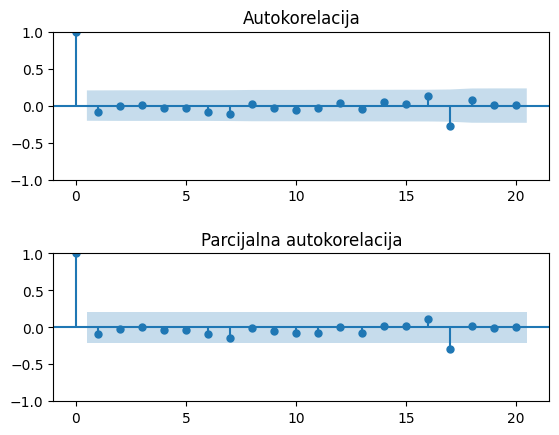

In [ ]:
plt.subplot2grid((2, 1), (0, 0))
plot_acf(test_data_AR1_pred_rolling_najbolji["residuals_rolling_AR1"], lags=20,ax=plt.gca())
plt.title('Autokorelacija')

plt.subplot2grid((2, 1), (1, 0))
plot_pacf(test_data_AR1_pred_rolling_najbolji["residuals_rolling_AR1"], lags=20, ax=plt.gca())
plt.title('Parcijalna autokorelacija')

plt.subplots_adjust(hspace=0.5)

Reziduali modela nisu realizacija bijelog šuma  pa postoji puno više složenosti vremenskog niza u korelaciji koju model nije uspio objasniti.


# Proces pomičnih prosjeka (MA)

Primjer:\
Zadatak nam je da svaki mjesec na zabavu donesemo kolače. Recimo da u prosjeku uvjek donesemo $\mu$ kolača. Domaćin zabave nam svaki mjesec kaže da smo donijeli pogrešan broj kolača za neki iznos $ɛ_t, \; ɛ_t \sim N(0,\sigma^2)$

Ako gledamo samo dvije prethodne pogreške nas model kojim bi predviđali potreban broj kolača za idući mjesec bi bio:
$$ \hat{f_t}= \mu + ϕ_1 \cdot ɛ_{t-1} + ϕ_2 \cdot ɛ_{t-2}, $$
gdje je \
$\mu$ naš osnovni broj za donošenje kolača \
$ϕ_1,ϕ_2$ multiplikativni faktori od greške prošlog i pretprošlog mjeseca (iskorištavamo  informacije o tome koliko smo pogriješili u prethodnim periodima da bi bolje procjenjivali )



**Proces pomičnih prosjeka (moving average, MA)**
 je proces koji je definiran temeljem slučajne varijable iz razdoblja $t$ i prethodnih razdoblja $\varepsilon_{t-1},\varepsilon_{t-2}, \dots ,\varepsilon_{t-q}:$

$$ y_t=\theta_{0} + \theta_{1} \varepsilon_{t-1}+  \theta_{2} \varepsilon_{t-2} + \dots +\theta_{q} \varepsilon_{t-q}+ \varepsilon_t,  \quad(1)$$

gdje su $\varepsilon_t \sim N(0,\sigma^2) \; NJD$ , $\theta_{j},j\in \{1, \dots q\}$ parametri modela te $\theta_{0}$ konstanta.

Općenito se proces pomičnih prosjeka označava s $MA(q)$, kako bi se temeljem pomaka $q$ znalo
koliko je prethodnih pomaka ( lagova) uključeno u sam model. \

Kompaktnije se model može zapisati na sljedeći način:

$$y_t = \theta_0 + \sum_{j=1}^{q} \theta_j \varepsilon_{t-j}  + \varepsilon_t, \quad(2)$$

Uz pomoć operatorskih pomaka L, $L^j\varepsilon_t  = \varepsilon_{t-j}$, model možemo zapisati:

$$y_t=\theta_{0} + (1 + \theta_{1} L +  \theta_{2} L^2 + \dots +\theta_{q} L^q) \varepsilon_t,  \quad(3),$$
gdje je $\theta(L)=(1 + \theta_{1} L +  \theta_{2} L^2 + \dots +\theta_{q} L^q)$ polinom operatora pomaka $L$ reda $q$,

$$ y_t=\theta_0 + \theta(L)\varepsilon_t \quad(4)$$

<br>

MA proces je **uvijek (slabo) stacionaran** jer je linearna kombinacija stacionarne slučajne varijable i njenih prethodnih realizacija.

Važno svojstvo slučajnih procesa je i svojstvo invertibilnosti. Slučajni proces invertibilan ako se može prikazat kao linearna kombinacija svojih prethodnih vrijednosti:
$$ y_t = \phi_0 + \phi_1 \cdot y_{t-1} + \phi_2 \cdot y_{t-2} + \dots + \varepsilon_t ,$$
$$y_t= \phi_0 +  \sum_{j=1}^{\infty} \phi_j \cdot L^jy_{t}   + \varepsilon_t,$$
odnosno radi se o AR($∞$) procesu. \
Po definiciji AR(p) proces je uvijek invertibilan. \
Da bi MA(q) proces bio invertibilan, mora se moći prikazati kao AR($∞$) proces. U tom slučaju vrijedi:
$$ \frac{y_t}{\theta(L)}= \frac{\theta_0}{\theta(L)} + \varepsilon_t ,$$
te svi korijeni polinoma $\theta(L)$ moraju biti izvan jediničnog kruga.



**Koeficijenti ACF iščezavaju nakon pomaka $q$, a koeficijenti PACF se smanjuju eksponencijalno ili sinusoidalno.**


## simulacija MA(2)

Model MA(2) je definiran kao:

$$ y_t=\theta_{0} + \theta_{1} \varepsilon_{t-1}+  \theta_{2} \varepsilon_{t-2} +  \varepsilon_t.$$


Simulirajmo MA(2) s koeficijentima 0.5 i -0.3.

$$y_t= 0.5 \varepsilon_{t-1}+  (-0.3) \varepsilon_{t-2} + \varepsilon_t $$

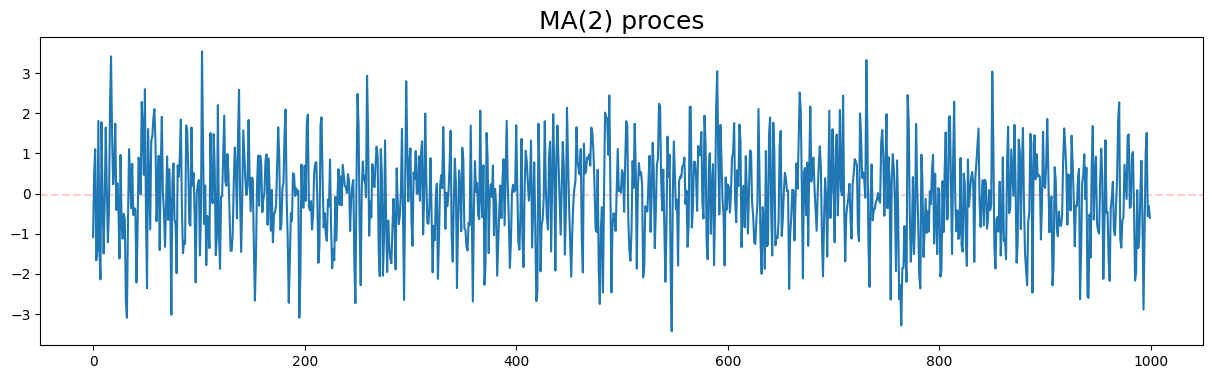

In [ ]:
#simuliranje MA(2) procesa

#import statsmodels.tsa.api as smt
n = 1000
phi = np.array([0])
theta = np.array([0.5, -0.3])
ar = np.r_[1, -phi]
ma = np.r_[1, theta]

np.random.seed(123)
ma2 = smt.arma_generate_sample(ar=ar, ma=ma, nsample=n)

plt.figure(figsize=(15,4))
plt.axhline(np.mean(ma2), color='r',linestyle='--',alpha=0.2)
plt.plot(ma2)
plt.title('MA(2) proces', fontsize=18)
plt.show()

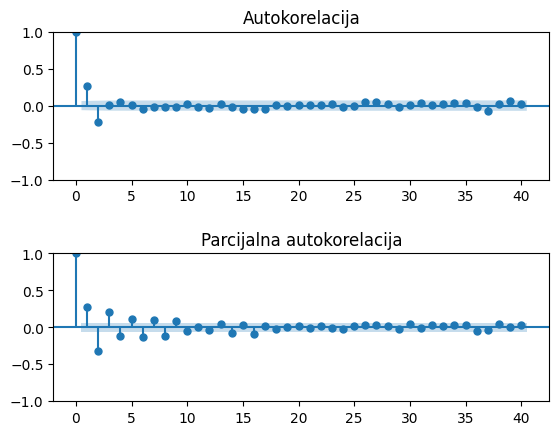

In [ ]:
#from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.subplot2grid((2, 1), (0, 0))
plot_acf(ma2, lags=40,ax=plt.gca())
plt.title('Autokorelacija')

plt.subplot2grid((2, 1), (1, 0))
plot_pacf(ma2, lags=40, ax=plt.gca())
plt.title('Parcijalna autokorelacija')

plt.subplots_adjust(hspace=0.5)

Očekivano, iz ACF grafa zaključujemo da je vjerojatno red jednak 2.

Sada ćemo fitat MA(2) kako bi  procijenili  koeficijente modela te ćemo se uvjeriti da su blizu  simuliranim vrijednostima.

In [ ]:
mdl = smt.ARIMA(ma2, order=(0, 0,2)).fit()
print(mdl.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -1419.168
Date:                Tue, 30 Jan 2024   AIC                           2846.336
Time:                        09:27:12   BIC                           2865.967
Sample:                             0   HQIC                          2853.797
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0476      0.039     -1.216      0.224      -0.124       0.029
ma.L1          0.5286      0.031     16.988      0.000       0.468       0.590
ma.L2         -0.2944      0.032     -9.321      0.0

Jednadžba modela sa procijenjenim koeficijentima:
$$ \hat{y_t}= -0.0476 +  0.5286  \cdot \varepsilon_{t-1}+  (-0.2944)  \cdot \varepsilon_{t-2} + 0.9994 \cdot \varepsilon_t $$

## MA na SLB podatcima

In [ ]:
#SLB_povrati.index = pd.date_range(start=SLB_povrati.index.min(), end=SLB_povrati.index.max(), freq='D')

Nacrtajmo ACF i PACF plotove kako bi odredili red MA procesa.

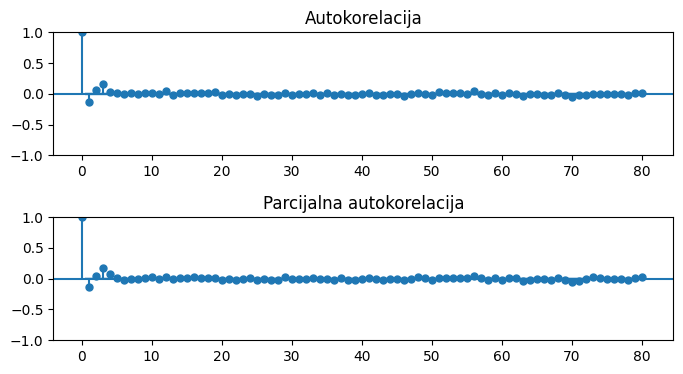

In [ ]:
#from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(8, 4))
plt.subplot2grid((2, 1), (0, 0))
plot_acf(SLB_povrati, lags=80,ax=plt.gca())
plt.title('Autokorelacija')

plt.subplot2grid((2, 1), (1, 0))
plot_pacf(SLB_povrati, lags=80, ax=plt.gca())
plt.title('Parcijalna autokorelacija')

plt.subplots_adjust(hspace=0.5)

Iz ACF grafa odlučujemo se za MA model reda 3.

In [ ]:
#-podjela skupa na skup za treniranje i testiranje

#train_end = datetime(2023,9,1)
#test_end = datetime(2023,12,1)
#train_data = SLB_povrati[:train_end]
#test_data = SLB_povrati[train_end + timedelta(days=1):test_end]

In [ ]:
#Kreiranje modela

#from statsmodels.tsa.arima.model import ARIMA
start=time()
predictions_rolling_MA3 = pd.Series(dtype='float64')
for kraj in (test_data.index):
  print(kraj-timedelta(days=1))
  train_data= SLB_povrati[:((kraj)- timedelta(days=1))]
  model_MA3 = ARIMA(train_data, order=(0,0,3))
  model_fit_MA3 = model_MA3 .fit()
  pred = model_fit_MA3.predict(kraj)
  predictions_rolling_MA3.loc[kraj] = pred.loc[kraj]
end=time()
print("potrebno vrijme:",end-start)

2023-09-01 00:00:00
2023-09-02 00:00:00
2023-09-03 00:00:00
2023-09-04 00:00:00
2023-09-05 00:00:00
2023-09-06 00:00:00
2023-09-07 00:00:00
2023-09-08 00:00:00
2023-09-09 00:00:00
2023-09-10 00:00:00
2023-09-11 00:00:00
2023-09-12 00:00:00
2023-09-13 00:00:00
2023-09-14 00:00:00
2023-09-15 00:00:00
2023-09-16 00:00:00
2023-09-17 00:00:00
2023-09-18 00:00:00
2023-09-19 00:00:00
2023-09-20 00:00:00
2023-09-21 00:00:00
2023-09-22 00:00:00
2023-09-23 00:00:00
2023-09-24 00:00:00
2023-09-25 00:00:00
2023-09-26 00:00:00
2023-09-27 00:00:00
2023-09-28 00:00:00
2023-09-29 00:00:00
2023-09-30 00:00:00
2023-10-01 00:00:00
2023-10-02 00:00:00
2023-10-03 00:00:00
2023-10-04 00:00:00
2023-10-05 00:00:00
2023-10-06 00:00:00
2023-10-07 00:00:00
2023-10-08 00:00:00
2023-10-09 00:00:00
2023-10-10 00:00:00
2023-10-11 00:00:00
2023-10-12 00:00:00
2023-10-13 00:00:00
2023-10-14 00:00:00
2023-10-15 00:00:00
2023-10-16 00:00:00
2023-10-17 00:00:00
2023-10-18 00:00:00
2023-10-19 00:00:00
2023-10-20 00:00:00


In [ ]:
test_data_MA3=test_data.copy()
test_data_MA3["predvidanje_rollingMA3"]=predictions_rolling_MA3
test_data_MA3["residuals_rollingMA3"]=test_data_MA3["Povrati"] - test_data_MA3["predvidanje_rollingMA3"]
test_data_MA3.head()

Povrati  predvidanje_rollingMA3  residuals_rollingMA3
2023-09-02 -0.004367               -0.000661             -0.003707
2023-09-03  0.000000                0.002002             -0.002002
2023-09-04  0.010106                0.002963              0.007143
2023-09-05 -0.004243               -0.001889             -0.002354
2023-09-06  0.013035                0.000579              0.012457

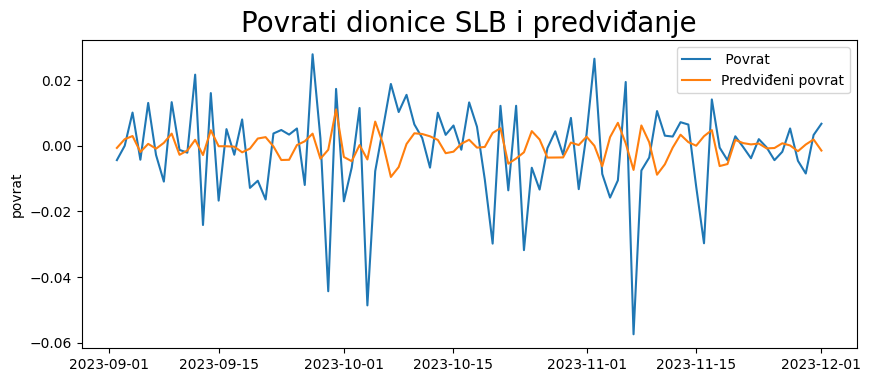

In [ ]:
#predvidena vs stvarna vrijednost
plt.figure(figsize=(10,4))
plt.plot(test_data_MA3.Povrati)
plt.plot (test_data_MA3["predvidanje_rollingMA3"])
plt.legend ( (' Povrat ','Predviđeni povrat'), fontsize=10)
plt.title("Povrati dionice SLB i predviđanje",fontsize=20)
plt.ylabel ("povrat",fontsize=10)
plt.show()

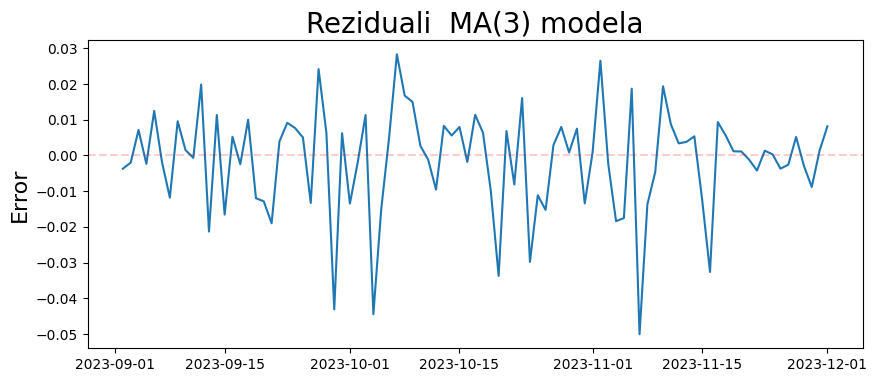

In [ ]:
plt.figure(figsize=(10,4))
plt.plot (test_data_MA3.residuals_rollingMA3)
plt.title( 'Reziduali  MA(3) modela', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--',alpha=0.2)
plt.show()

In [ ]:
#from sklearn.metrics import mean_squared_error
mse=mean_squared_error(test_data_MA3.Povrati, test_data_MA3["predvidanje_rollingMA3"])
print(f"Srednja kvadratna pogreška (MSE): {mse}")

Srednja kvadratna pogreška (MSE): 0.00021224550353142086


### MA(q)

Pronađimo sada potencijalno bolji red od MA uz pomoć informacijskih kriterija, ograničenje na red $q \leq 10$.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



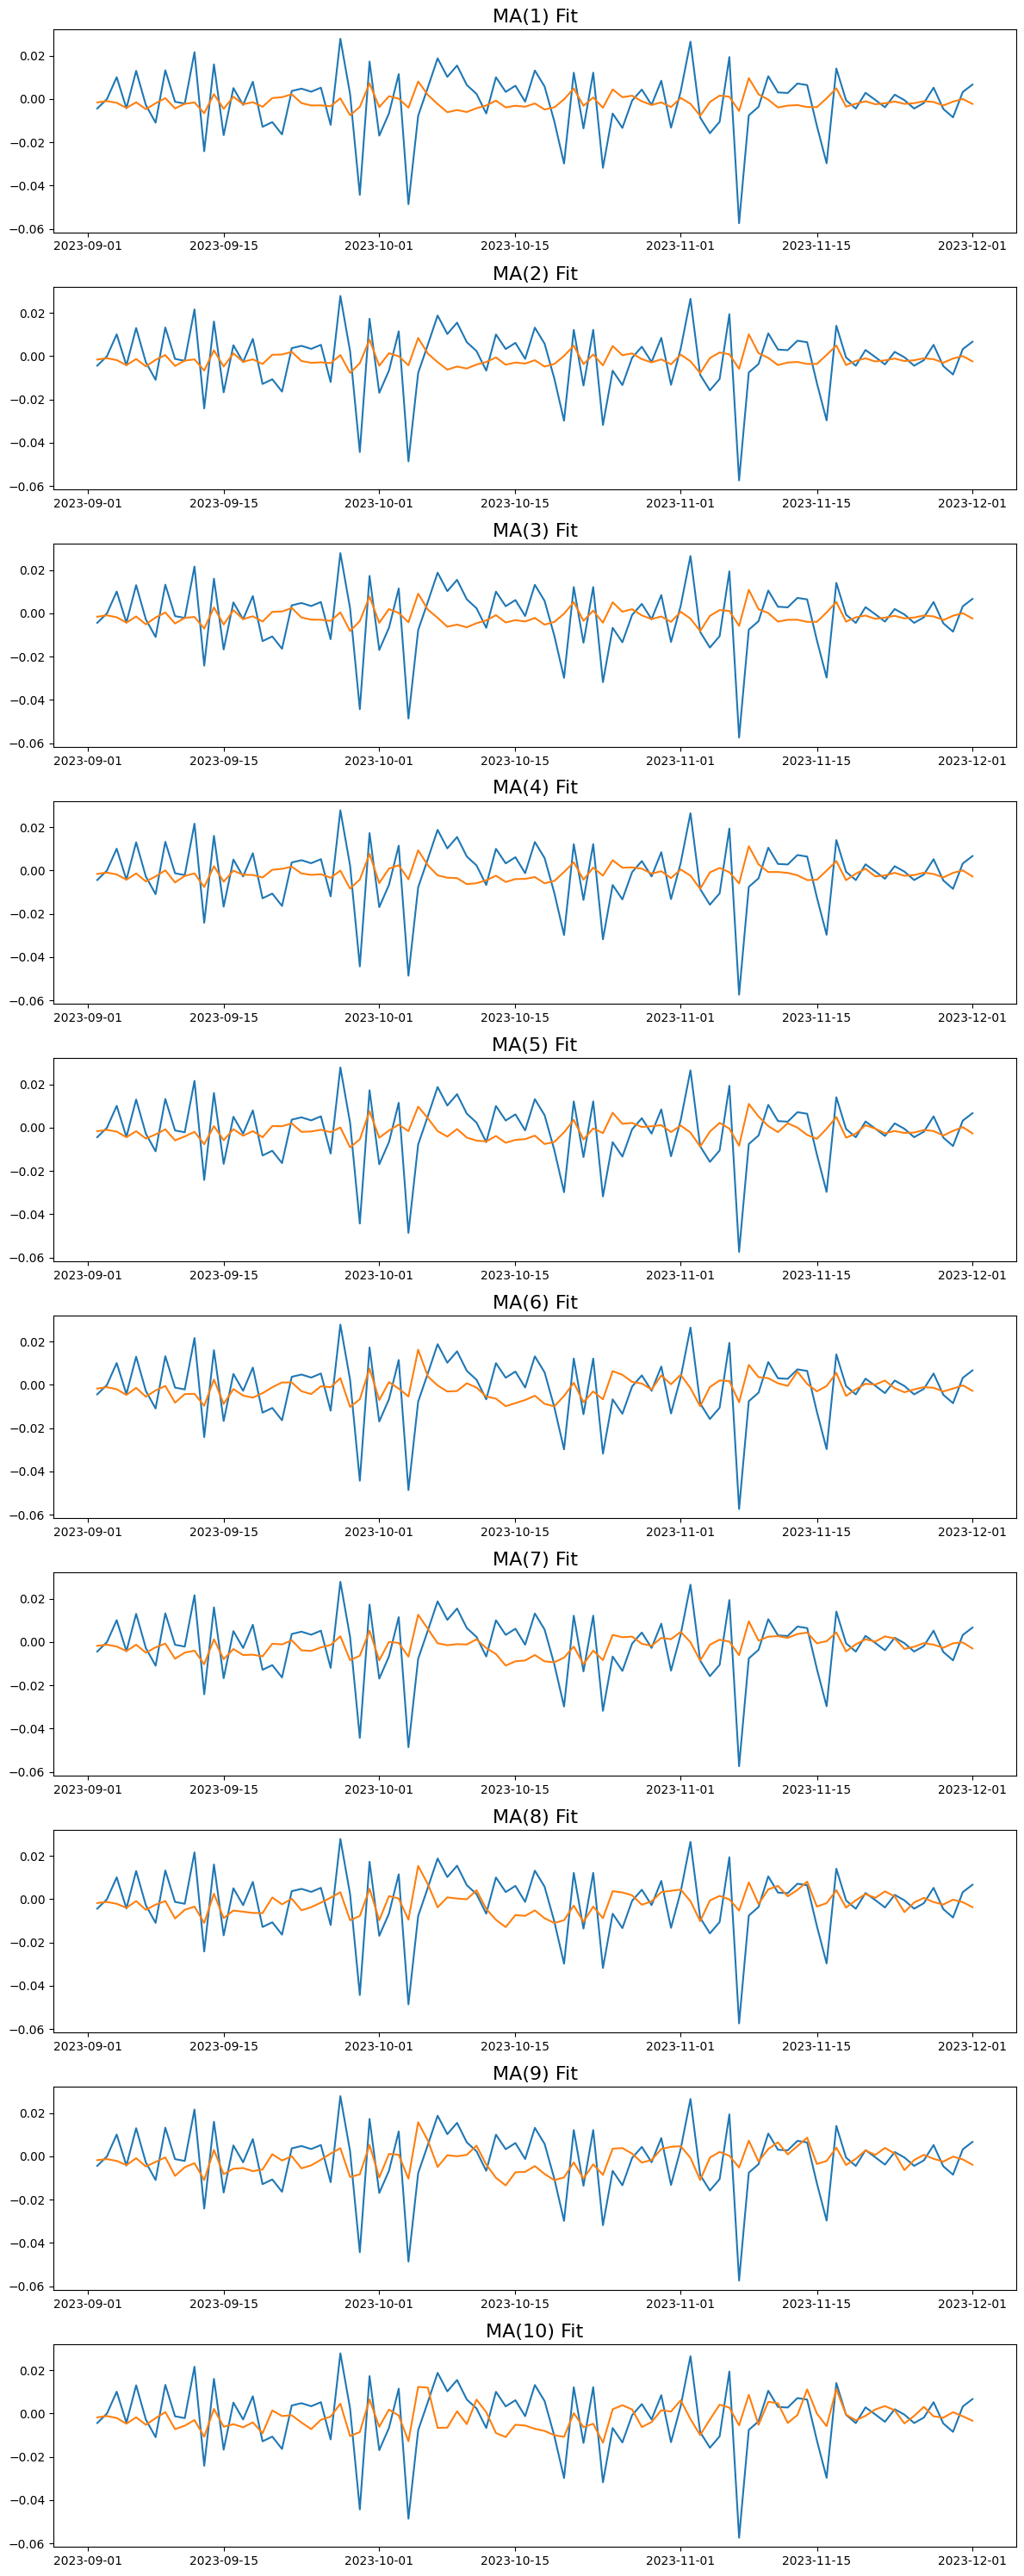

In [ ]:
plt.figure(figsize=(12,30))


ma_orders=[i+1 for i in range(10)]
fitted_model_dict_ma = {}

for idx, ma_order in enumerate(ma_orders):

    #kreiranje MA(ma_order) modela
    ma_model = ARIMA(test_data.Povrati, order=(0,0,ma_order))
    ma_model_fit = ma_model.fit()
    fitted_model_dict_ma[ma_order] = ma_model_fit
    plt.subplot(10,1,idx+1)
    plt.plot(test_data.Povrati)
    plt.plot(ma_model_fit.fittedvalues)
    plt.title('MA(%s) Fit'%ma_order, fontsize=16)

plt.tight_layout()

Već i samim pogledom na grafove vidimo da povećanjem parametara nismo dobili puno bolje predviđanje.

In [ ]:
#usporedba AIC-a modela
for ma_order in ma_orders:
    print('AIC for MA(%s): %s'%(ma_order, fitted_model_dict_ma[ma_order].aic))

AIC for MA(1): -508.7186843680089
AIC for MA(2): -506.7453981045759
AIC for MA(3): -504.7236520182074
AIC for MA(4): -503.05382078820935
AIC for MA(5): -501.61238875245033
AIC for MA(6): -501.4852053516461
AIC for MA(7): -500.76235146095644
AIC for MA(8): -499.06596463589517
AIC for MA(9): -497.0557248734817
AIC for MA(10): -496.92754573259185


In [ ]:
#usporedba BIC-a modela
for ma_order in ma_orders:
    print('BIC for MA(%s): %s'%(ma_order, fitted_model_dict_ma[ma_order].bic))

BIC for MA(1): -501.18610584845834
BIC for MA(2): -496.7019600785085
BIC for MA(3): -492.16935448562316
BIC for MA(4): -487.98866374910824
BIC for MA(5): -484.03637220683237
BIC for MA(6): -481.39832929951126
BIC for MA(7): -478.1646159023048
BIC for MA(8): -473.95736957072666
BIC for MA(9): -469.43627030179636
BIC for MA(10): -466.79723165438963


AIC i BIC kriteriji nam govore da je najbolji MA(1) pa ćemo ga i izgraditi na skupu podataka SLB_povrati.

In [ ]:
#kreiranje modela
start=time()
predictions_rolling_MA1 = pd.Series(dtype='float64')
for kraj in (test_data.index):
  print(kraj-timedelta(days=1))
  train_data= SLB_povrati[:((kraj)- timedelta(days=1))]
  model_best_MA1 = ARIMA(train_data, order=(0,0,1))
  model_fit_best_MA1 = model_best_MA1.fit()
  pred = model_fit_best_MA1.predict(kraj)
  predictions_rolling_MA1.loc[kraj] = pred.loc[kraj]
end=time()
print("potrebno vrijme:",end-start)

2023-09-01 00:00:00
2023-09-02 00:00:00
2023-09-03 00:00:00
2023-09-04 00:00:00
2023-09-05 00:00:00
2023-09-06 00:00:00
2023-09-07 00:00:00
2023-09-08 00:00:00
2023-09-09 00:00:00
2023-09-10 00:00:00
2023-09-11 00:00:00
2023-09-12 00:00:00
2023-09-13 00:00:00
2023-09-14 00:00:00
2023-09-15 00:00:00
2023-09-16 00:00:00
2023-09-17 00:00:00
2023-09-18 00:00:00
2023-09-19 00:00:00
2023-09-20 00:00:00
2023-09-21 00:00:00
2023-09-22 00:00:00
2023-09-23 00:00:00
2023-09-24 00:00:00
2023-09-25 00:00:00
2023-09-26 00:00:00
2023-09-27 00:00:00
2023-09-28 00:00:00
2023-09-29 00:00:00
2023-09-30 00:00:00
2023-10-01 00:00:00
2023-10-02 00:00:00
2023-10-03 00:00:00
2023-10-04 00:00:00
2023-10-05 00:00:00
2023-10-06 00:00:00
2023-10-07 00:00:00
2023-10-08 00:00:00
2023-10-09 00:00:00
2023-10-10 00:00:00
2023-10-11 00:00:00
2023-10-12 00:00:00
2023-10-13 00:00:00
2023-10-14 00:00:00
2023-10-15 00:00:00
2023-10-16 00:00:00
2023-10-17 00:00:00
2023-10-18 00:00:00
2023-10-19 00:00:00
2023-10-20 00:00:00


In [ ]:
test_data_MA1_pred_rolling_najbolji=test_data.copy()
test_data_MA1_pred_rolling_najbolji["predvidanje_rolling_MA1"]=predictions_rolling_MA1
test_data_MA1_pred_rolling_najbolji["residuals_MA1"]=test_data_MA1_pred_rolling_najbolji["Povrati"] - test_data_MA1_pred_rolling_najbolji["predvidanje_rolling_MA1"]
test_data_MA1_pred_rolling_najbolji.head()


Povrati  predvidanje_rolling_MA1  residuals_MA1
2023-09-02 -0.004367                -0.002321      -0.002046
2023-09-03  0.000000                 0.000211      -0.000211
2023-09-04  0.010106                -0.000003       0.010110
2023-09-05 -0.004243                -0.001207      -0.003035
2023-09-06  0.013035                 0.000328       0.012708

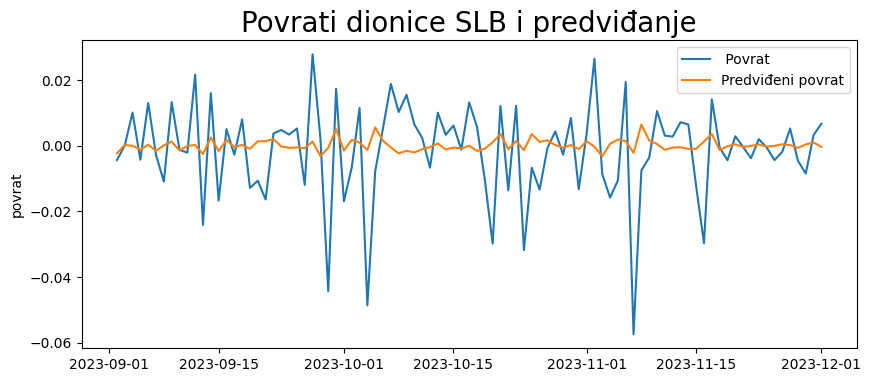

In [ ]:
#predvidanje vs stvarna vrijednost
plt.figure(figsize=(10,4))
plt.plot(test_data_MA1_pred_rolling_najbolji.Povrati)
plt.plot (test_data_MA1_pred_rolling_najbolji["predvidanje_rolling_MA1"])
plt.legend ( (' Povrat ','Predviđeni povrat'), fontsize=10)
plt.title("Povrati dionice SLB i predviđanje",fontsize=20)
plt.ylabel ("povrat",fontsize=10)
plt.show()

In [ ]:
#from sklearn.metrics import mean_squared_error
mse=mean_squared_error(test_data_MA1_pred_rolling_najbolji.Povrati, test_data_MA1_pred_rolling_najbolji["predvidanje_rolling_MA1"])
print(f"Srednja kvadratna pogreška (MSE): {mse}")

Srednja kvadratna pogreška (MSE): 0.00020946053279922284


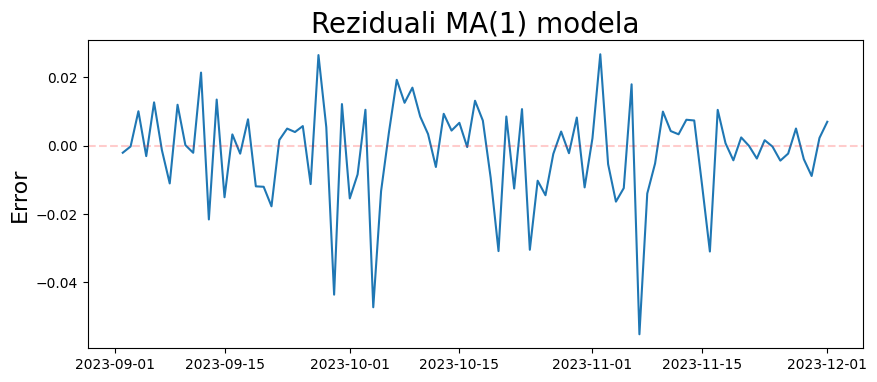

In [ ]:
plt.figure(figsize=(10,4))
plt.plot (test_data_MA1_pred_rolling_najbolji["residuals_MA1"])
plt.title( 'Reziduali MA(1) modela', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--',alpha=0.2)
plt.show()

Zanima nas jesu li greške modela ralizacija bijelog šuma. \
Ispitajmo jesu li reziduali normalno distribuirani.

In [ ]:
#import scipy.stats as stats
statistic, pvalue = stats.normaltest(test_data_MA1_pred_rolling_najbolji["residuals_MA1"]) #testiramo razlikuje li  od normalne distribucije
print(f"pvalue: {pvalue}")
print(f"pvalue < 0.05: {pvalue < 0.05}")

pvalue: 3.035500055580937e-06
pvalue < 0.05: True


p-vrijednost je manja od 0.05 --> odbacujemo  $𝐻_0$  tj. reziduali nisu normalno distribuirani

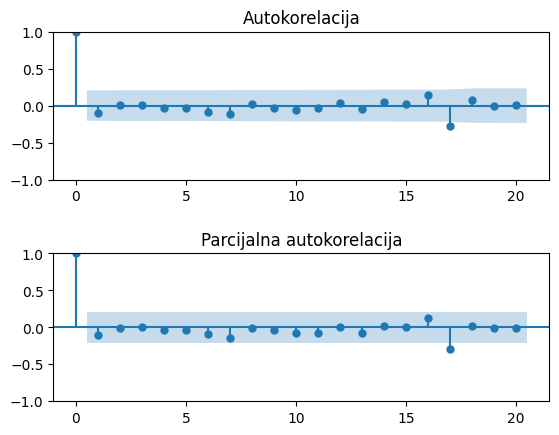

In [ ]:
plt.subplot2grid((2, 1), (0, 0))
plot_acf(test_data_MA1_pred_rolling_najbolji["residuals_MA1"], lags=20,ax=plt.gca())
plt.title('Autokorelacija')

plt.subplot2grid((2, 1), (1, 0))
plot_pacf(test_data_MA1_pred_rolling_najbolji["residuals_MA1"], lags=20, ax=plt.gca())
plt.title('Parcijalna autokorelacija')

plt.subplots_adjust(hspace=0.5)

Reziduali modela nisu realizacija bijelog šuma  pa postoji puno više složenosti vremenskog niza u korelaciji koju model nije uspio objasniti.

# Autoregresijski proces pomičnih prosjeka (ARMA)

Da bi dobro opisali neki proces pojedinačno AR(p) i MA(q) modelom potrebno je uključiti veliki pomak p ili q. Stoga se može razmatrati kombinacija i AR i MA parametara istovremeno, kako bi se smanjio broj parametara koje je potrebno procijeniti. Tada govorimo o autoregresijskom procesu pomičnih prosjeka, ARMA(p,q). \


ARMA(p,q) proces definiran je kao:

$$ y_t = \phi_{0} + \phi_{1} y_{t-1}+  \phi_{2} y_{t-2} + \dots +\phi_{p} y_{t-p}+ \theta_{1} \varepsilon_{t-1}+  \theta_{2} \varepsilon_{t-2} + \dots +\theta_{q} \varepsilon_{t-q}+ \varepsilon_t, \quad \varepsilon_t \sim N(0,\sigma^2) \; NJD,  \quad(1) $$
$$y_t = \phi_{0} + \sum_{j=1}^{p} \phi_j y_{t-j} + \sum_{j=1}^{q} \theta_j \varepsilon_{t-j},  \quad(2)$$
$$ ( 1- \sum_{j=1}^{p} \phi_j L^j ) \cdot y_t = \phi_{0} + (1 + \sum_{j=1}^{q} \theta_j L^j) \cdot \varepsilon_t,  \quad(3)$$
$$\phi(L)y_t = \phi_{0} + \theta(L)\varepsilon_t. \quad(4) $$

ARMA(p,q) proces je invertibilan ako se može prikazati kao AR($∞$) proces:
$\frac{\phi(L)}{\theta(L)} y_t = \frac{\phi_0}{\theta(L)} + \varepsilon_t $, te je i stacionaran ako se može prikazati kao MA($∞$) proces:
$y_t = \frac{\phi_0}{\phi(L)} + \frac{\theta(L)}{\phi(L)} \varepsilon_t $.
Da bi bio invertibilan, svi korijeni inverzne katakteristične jednadžbe polinoma $\phi(L)$ moraju po apsolutnoj vrijednosti biti veći od 1, dok za stacionarnost svi korijeni inverzne karakteristične jednadžbe polinoma $\theta(L)$ moraju po apsoltnoj vrijednosti biti veći od 1. \

Autokorelacijska funkcija ARMA(p,q) procesa je definirana na način da se njeni koeficijenti smanjuju eksponencijalno ili sinusoidalno nakon pomaka q, dok je parcijalna autokorelacijska funkcija definirana na način da se njeni koeficijenti smanjuju eksponencijalno ili sinusoidalno nakon pomaka p.

## simulacija ARMA(2,2)

Model ARMA(2,2) je definiran na kao:

$$ y_t = \phi_{0} + \phi_{1} y_{t-1}+  \phi_{2} y_{t-2} + \theta_{1} \varepsilon_{t-1}+  \theta_{2} \varepsilon_{t-2}+ \varepsilon_t $$

Simulirajmo ARMA(2,2) s koeficijentima 0.5, -0.3 te -0.2, 0.7 .

$$ y_t =  0.5 \cdot y_{t-1}+  (-0.3) \cdot  y_{t-2} + (-0.2) \cdot \varepsilon_{t-1}+   0.7 \cdot \varepsilon_{t-2}+ \varepsilon_t $$

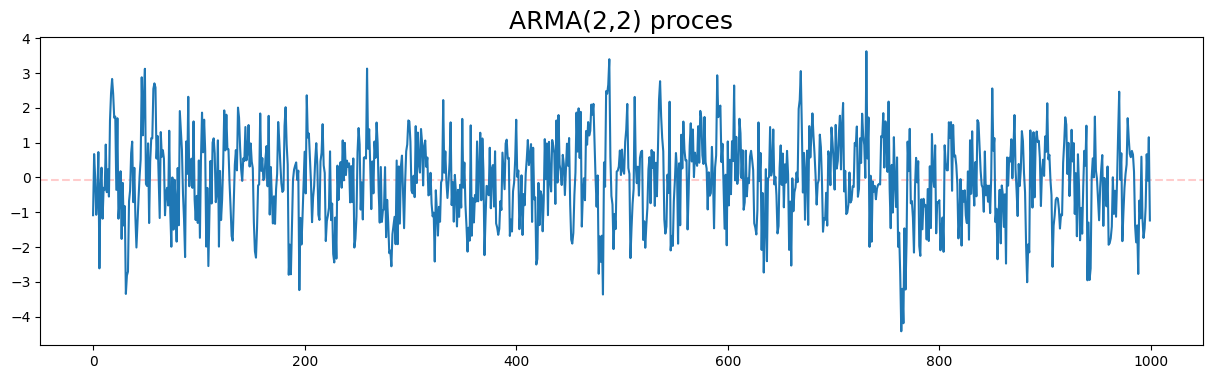

In [ ]:
#simuliranje ARMA(2,2) procesa

#import statsmodels.tsa.api as smt
n = 1000
phi = np.array([0.5, -0.3])
theta = np.array([-0.2, 0.7])
ar = np.r_[1, -phi]
ma = np.r_[1, theta]

np.random.seed(123)
arma2 = smt.arma_generate_sample(ar=ar, ma=ma, nsample=n)

plt.figure(figsize=(15,4))
plt.axhline(np.mean(arma2), color='r',linestyle='--',alpha=0.2)
plt.plot(arma2)
plt.title('ARMA(2,2) proces', fontsize=18)
plt.show()

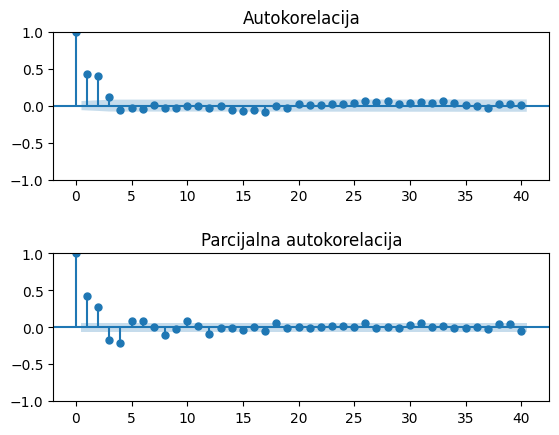

In [ ]:
#from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.subplot2grid((2, 1), (0, 0))
plot_acf(arma2, lags=40,ax=plt.gca())
plt.title('Autokorelacija')

plt.subplot2grid((2, 1), (1, 0))
plot_pacf(arma2, lags=40, ax=plt.gca())
plt.title('Parcijalna autokorelacija')

plt.subplots_adjust(hspace=0.5)

Sada ćemo fitat ARMA(2,2) kako bi  procijenili  koeficijente modela te ćemo se uvjeriti da su blizu  simuliranim vrijednostima.

In [ ]:
mdl = smt.ARIMA(arma2, order=(2, 0,2)).fit()
print(mdl.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -1418.908
Date:                Tue, 30 Jan 2024   AIC                           2849.817
Time:                        09:32:07   BIC                           2879.263
Sample:                             0   HQIC                          2861.008
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0742      0.062     -1.190      0.234      -0.196       0.048
ar.L1          0.5071      0.066      7.688      0.000       0.378       0.636
ar.L2         -0.2522      0.059     -4.303      0.0

Jednadžba modela sa procijenjenim koeficijentima:

$$ \hat{y_t}=  -0.0742 + 0.5071 \cdot y_{t-1}+  (-0.2522) \cdot  y_{t-2} + (-0.1870) \cdot \varepsilon_{t-1}+  0.6475 \cdot \varepsilon_{t-2}+ 0.9991 \cdot \varepsilon_t$$

## ARMA na SLB podatcima

In [ ]:
# Postavljanje frekvencije na dnevnu
#SLB_povrati.index = pd.date_range(start=SLB_povrati.index.min(), end=SLB_povrati.index.max(), freq='D')

Nacrtajmo  ACF i PACF plotove kako bi odredili red ARMA procesa.

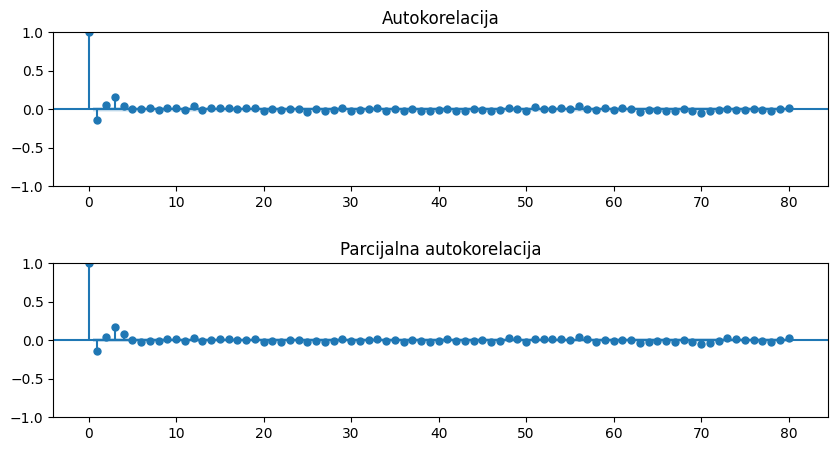

In [ ]:
#from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(10, 5))
plt.subplot2grid((2, 1), (0, 0))
plot_acf(SLB_povrati, lags=80,ax=plt.gca())
plt.title('Autokorelacija')

plt.subplot2grid((2, 1), (1, 0))
plot_pacf(SLB_povrati, lags=80, ax=plt.gca())
plt.title('Parcijalna autokorelacija')

plt.subplots_adjust(hspace=0.5)

Odlučujemo se za ARMA(4,3).

In [ ]:
#-podjela skupa na skup za treniranje i testiranje

#train_end = datetime(2023,9,1)
#test_end = datetime(2023,12,1)
#train_data = SLB_povrati[:train_end]
#test_data = SLB_povrati[train_end + timedelta(days=1):test_end]

In [ ]:
from statsmodels.tools.sm_exceptions import ValueWarning, HessianInversionWarning, ConvergenceWarning
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#kreiranje modela
predictions_rolling_ARMA43 = pd.Series(dtype='float64')
for kraj in (test_data.index):
  print(kraj-timedelta(days=1))
  train_data= SLB_povrati[:((kraj)- timedelta(days=1))]
  model = ARIMA(train_data, order=(4,0,3))
  model_fit = model.fit()
  pred = model_fit.predict(kraj)
  predictions_rolling_ARMA43.loc[kraj] = pred.loc[kraj]

2023-09-01 00:00:00
2023-09-02 00:00:00
2023-09-03 00:00:00
2023-09-04 00:00:00
2023-09-05 00:00:00
2023-09-06 00:00:00
2023-09-07 00:00:00
2023-09-08 00:00:00
2023-09-09 00:00:00
2023-09-10 00:00:00
2023-09-11 00:00:00
2023-09-12 00:00:00
2023-09-13 00:00:00
2023-09-14 00:00:00
2023-09-15 00:00:00
2023-09-16 00:00:00
2023-09-17 00:00:00
2023-09-18 00:00:00
2023-09-19 00:00:00
2023-09-20 00:00:00
2023-09-21 00:00:00
2023-09-22 00:00:00
2023-09-23 00:00:00
2023-09-24 00:00:00
2023-09-25 00:00:00
2023-09-26 00:00:00
2023-09-27 00:00:00
2023-09-28 00:00:00
2023-09-29 00:00:00
2023-09-30 00:00:00
2023-10-01 00:00:00
2023-10-02 00:00:00
2023-10-03 00:00:00
2023-10-04 00:00:00
2023-10-05 00:00:00
2023-10-06 00:00:00
2023-10-07 00:00:00
2023-10-08 00:00:00
2023-10-09 00:00:00
2023-10-10 00:00:00
2023-10-11 00:00:00
2023-10-12 00:00:00
2023-10-13 00:00:00
2023-10-14 00:00:00
2023-10-15 00:00:00
2023-10-16 00:00:00
2023-10-17 00:00:00
2023-10-18 00:00:00
2023-10-19 00:00:00
2023-10-20 00:00:00


In [ ]:
test_data_ARMA43_pred_rolling=test_data.copy()
test_data_ARMA43_pred_rolling["ARMA43_pred_rolling"]=predictions_rolling_ARMA43
test_data_ARMA43_pred_rolling["ARMA43_residuals_rolling"]=test_data_ARMA43_pred_rolling["Povrati"] - test_data_ARMA43_pred_rolling["ARMA43_pred_rolling"]
test_data_ARMA43_pred_rolling.head()

Povrati  ARMA43_pred_rolling  ARMA43_residuals_rolling
2023-09-02 -0.004367            -0.000145                 -0.004222
2023-09-03  0.000000             0.002676                 -0.002676
2023-09-04  0.010106             0.003165                  0.006941
2023-09-05 -0.004243            -0.000988                 -0.003255
2023-09-06  0.013035             0.000658                  0.012377

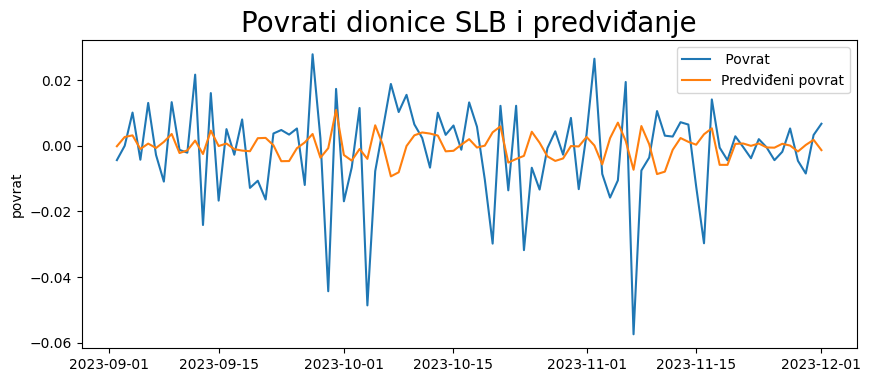

In [ ]:
#predvidena vs stvarna vrijednost
plt.figure(figsize=(10,4))
plt.plot(test_data_ARMA43_pred_rolling.Povrati)
plt.plot (test_data_ARMA43_pred_rolling["ARMA43_pred_rolling"])
plt.legend ( (' Povrat ','Predviđeni povrat'), fontsize=10)
plt.title("Povrati dionice SLB i predviđanje",fontsize=20)
plt.ylabel ("povrat",fontsize=10)
plt.show()

In [ ]:
#from sklearn.metrics import mean_squared_error
mse=mean_squared_error(test_data_ARMA43_pred_rolling.Povrati, test_data_ARMA43_pred_rolling["ARMA43_pred_rolling"])
print(f"Srednja kvadratna pogreška (MSE): {mse}")

Srednja kvadratna pogreška (MSE): 0.0002135825342098314


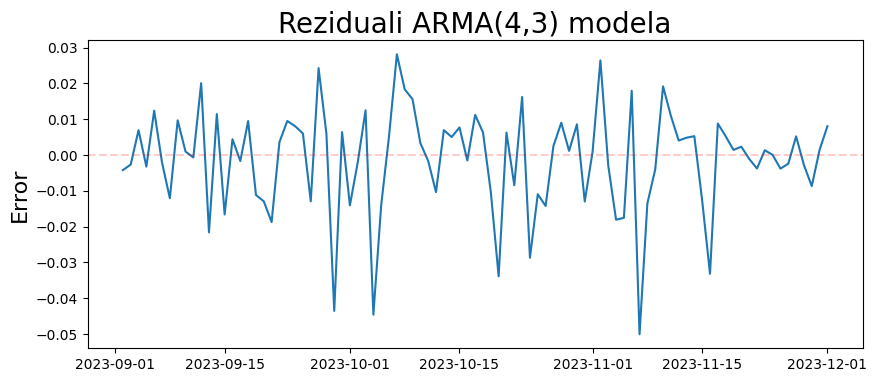

In [ ]:
plt.figure(figsize=(10,4))
plt.plot (test_data_ARMA43_pred_rolling.ARMA43_residuals_rolling)
plt.title( 'Reziduali ARMA(4,3) modela', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--',alpha=0.2)
plt.show()

### ARMA(p,q)

Pronađimo sada potencijalno bolji red od ARMA uz pomoć informacijskog kriterija AIC, uz ograničenje  $p \leq 5,q \leq 5$.

In [ ]:
best_aic = np.inf
best_order = None
best_model = None

rng = range(6)
for i in rng:
    for j in rng:
        try:
            model = ARIMA(train_data, order=(i,0,j))

            model_fit = model.fit()
            model_aic=model_fit.aic

            print(f"ARMA({i}, {j}) - AIC: {model_aic}")

            if model_aic<best_aic:
              best_aic=model_aic
              best_order=(i,0,j)
              best_model=model_fit
        except: continue


print('Najbolji: AIC: %6.5f | red: %s'%(best_aic, best_order))

ARMA(0, 0) - AIC: -26662.508439773464
ARMA(0, 1) - AIC: -26743.84977376514
ARMA(0, 2) - AIC: -26793.579584264353
ARMA(0, 3) - AIC: -26939.86916995437
ARMA(0, 4) - AIC: -26945.49666484029
ARMA(0, 5) - AIC: -26943.84129928136
ARMA(1, 0) - AIC: -26755.328430399197
ARMA(1, 1) - AIC: -26748.02210395813
ARMA(1, 2) - AIC: -26898.81108709843
ARMA(1, 3) - AIC: -26945.962681326346
ARMA(1, 4) - AIC: -26943.80264679523
ARMA(1, 5) - AIC: -26941.85895461634
ARMA(2, 0) - AIC: -26761.387363850503
ARMA(2, 1) - AIC: -26822.63685701753
ARMA(2, 2) - AIC: -26919.547800356544
ARMA(2, 3) - AIC: -26943.944587546153
ARMA(2, 4) - AIC: -26941.946344169326
ARMA(2, 5) - AIC: -26939.6347639566
ARMA(3, 0) - AIC: -26908.51367513666
ARMA(3, 1) - AIC: -26915.38208650059
ARMA(3, 2) - AIC: -26943.55364942295
ARMA(3, 3) - AIC: -26942.03428448187
ARMA(3, 4) - AIC: -26939.546462849386
ARMA(3, 5) - AIC: -26936.806065315104
ARMA(4, 0) - AIC: -26940.52891170318
ARMA(4, 1) - AIC: -26937.659822907517
ARMA(4, 2) - AIC: -26941.581

 Najbolji model je ARMA(1,3) pa ćemo ga i izgraditi na skupu podataka SLB_povrati.

In [ ]:
#kreiranje modela
start=time()
predictions_rolling_ARMA13 = pd.Series()
for kraj in (test_data.index):
  print(kraj-timedelta(days=1))
  train_data= SLB_povrati[:((kraj)- timedelta(days=1))]
  model_ARMA13 = ARIMA(train_data, order=(1,0,3))
  model_ARMA13_fit = model_ARMA13.fit()
  pred = model_ARMA13_fit.predict(kraj)
  predictions_rolling_ARMA13.loc[kraj] = pred.loc[kraj]
end=time()
print("potrebno vrijme:",end-start)

2023-09-01 00:00:00
2023-09-02 00:00:00
2023-09-03 00:00:00
2023-09-04 00:00:00
2023-09-05 00:00:00
2023-09-06 00:00:00
2023-09-07 00:00:00
2023-09-08 00:00:00
2023-09-09 00:00:00
2023-09-10 00:00:00
2023-09-11 00:00:00
2023-09-12 00:00:00
2023-09-13 00:00:00
2023-09-14 00:00:00
2023-09-15 00:00:00
2023-09-16 00:00:00
2023-09-17 00:00:00
2023-09-18 00:00:00
2023-09-19 00:00:00
2023-09-20 00:00:00
2023-09-21 00:00:00
2023-09-22 00:00:00
2023-09-23 00:00:00
2023-09-24 00:00:00
2023-09-25 00:00:00
2023-09-26 00:00:00
2023-09-27 00:00:00
2023-09-28 00:00:00
2023-09-29 00:00:00
2023-09-30 00:00:00
2023-10-01 00:00:00
2023-10-02 00:00:00
2023-10-03 00:00:00
2023-10-04 00:00:00
2023-10-05 00:00:00
2023-10-06 00:00:00
2023-10-07 00:00:00
2023-10-08 00:00:00
2023-10-09 00:00:00
2023-10-10 00:00:00
2023-10-11 00:00:00
2023-10-12 00:00:00
2023-10-13 00:00:00
2023-10-14 00:00:00
2023-10-15 00:00:00
2023-10-16 00:00:00
2023-10-17 00:00:00
2023-10-18 00:00:00
2023-10-19 00:00:00
2023-10-20 00:00:00


In [ ]:
test_data_ARMA13_pred_rolling_najbolji=test_data.copy()
test_data_ARMA13_pred_rolling_najbolji["ARMA13_pred_rolling"]=predictions_rolling_ARMA13
test_data_ARMA13_pred_rolling_najbolji["ARMA13_residuals_rolling"]=test_data_ARMA13_pred_rolling_najbolji["Povrati"] - test_data_ARMA13_pred_rolling_najbolji["ARMA13_pred_rolling"]
test_data_ARMA13_pred_rolling_najbolji.head()

Povrati  ARMA13_pred_rolling  ARMA13_residuals_rolling
2023-09-02 -0.004367            -0.000458                 -0.003909
2023-09-03  0.000000             0.002423                 -0.002423
2023-09-04  0.010106             0.003046                  0.007060
2023-09-05 -0.004243            -0.001260                 -0.002983
2023-09-06  0.013035             0.000603                  0.012432

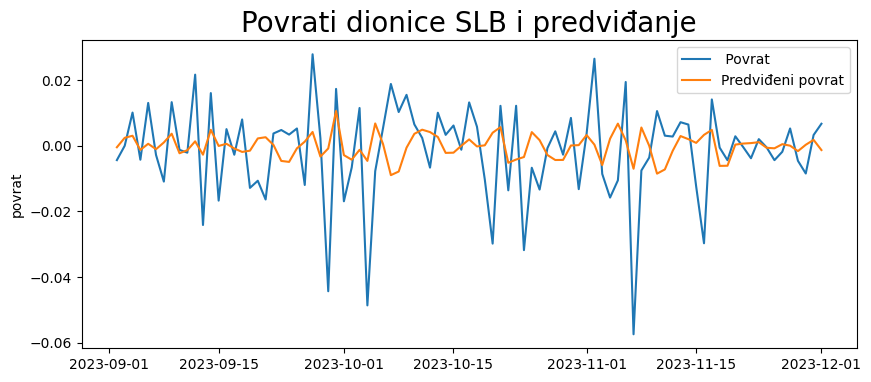

In [ ]:
#predvidanje vs stvarna vrijednost
plt.figure(figsize=(10,4))
plt.plot(test_data_ARMA13_pred_rolling_najbolji.Povrati)
plt.plot (test_data_ARMA13_pred_rolling_najbolji["ARMA13_pred_rolling"])
plt.legend ( (' Povrat ','Predviđeni povrat'), fontsize=10)
plt.title("Povrati dionice SLB i predviđanje",fontsize=20)
plt.ylabel ("povrat",fontsize=10)
plt.show()

In [ ]:
#from sklearn.metrics import mean_squared_error
mse=mean_squared_error(test_data_ARMA13_pred_rolling_najbolji.Povrati, test_data_ARMA13_pred_rolling_najbolji["ARMA13_pred_rolling"])
print(f"Srednja kvadratna pogreška (MSE): {mse}")

Srednja kvadratna pogreška (MSE): 0.00021280011805027875


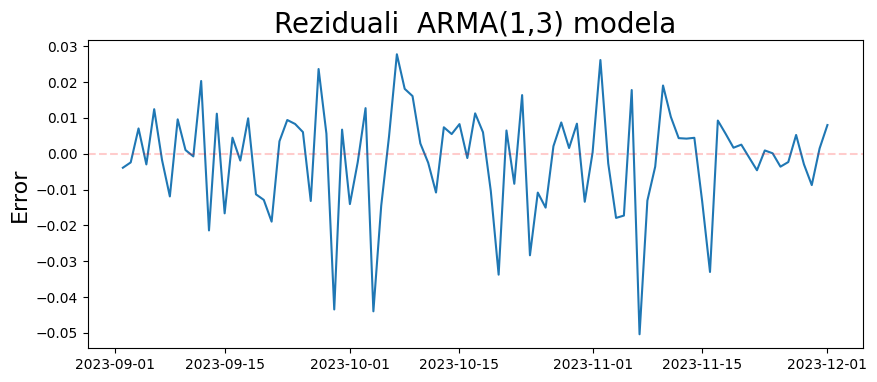

In [ ]:
plt.figure(figsize=(10,4))
plt.plot (test_data_ARMA13_pred_rolling_najbolji["ARMA13_residuals_rolling"])
plt.title( 'Reziduali  ARMA(1,3) modela', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--',alpha=0.2)
plt.show()

Ispitajmo jesu li reziduali normalno distribuirani.

In [ ]:
#import scipy.stats as stats
statistic, pvalue = stats.normaltest(test_data_ARMA13_pred_rolling_najbolji["ARMA13_residuals_rolling"]) #testiramo razlikuje li  od normalne distribucije
print(f"pvalue: {pvalue}")
print(f"pvalue < 0.05: {pvalue < 0.05}")

pvalue: 0.0001138478893300979
pvalue < 0.05: True


p-vrijednost je manja od 0.05 --> odbacujemo  $𝐻_0$  tj. reziduali nisu normalno distribuirani

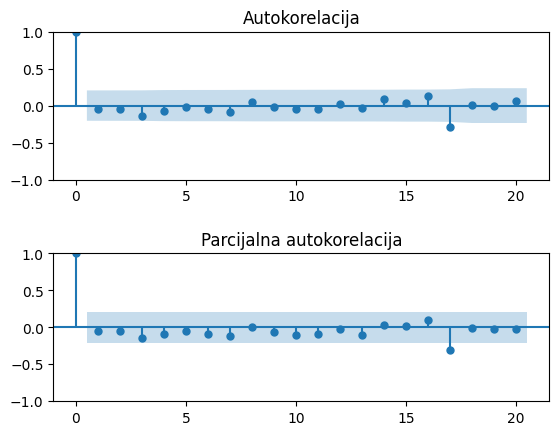

In [ ]:
plt.subplot2grid((2, 1), (0, 0))
plot_acf(test_data_ARMA13_pred_rolling_najbolji["ARMA13_residuals_rolling"], lags=20,ax=plt.gca())
plt.title('Autokorelacija')

plt.subplot2grid((2, 1), (1, 0))
plot_pacf(test_data_ARMA13_pred_rolling_najbolji["ARMA13_residuals_rolling"], lags=20, ax=plt.gca())
plt.title('Parcijalna autokorelacija')

plt.subplots_adjust(hspace=0.5)

Reziduali modela nisu realizacija bijelog šuma  pa postoji puno više složenosti vremenskog niza u korelaciji koju model nije uspio objasniti.

# Autoregresivni integrirani pomični prosječni proces (ARIMA)

Neka je $X = (X_n, n \in \mathbb{N})$ slučajan proces. **Diferencija slučajnog procesa $X$ reda 1** (oznaka $diff(X,1)$) je slučajan proces $ (Y_n, n \in \mathbb{N})$ definiran s $Y_1=0, Y_n=X_n - X_{n-1}, n\geq2. $
**Diferencija slučajnog procesa X reda k** definira se rekurzivno $diff(X,k) = diff(diff(X,k-1),1).$

Neka je $X = (X_n, n \in \mathbb{N})$ slučajan proces. $X$ je **autoregresivni integrirani pomočni prosječni proces, ARIMA(p,d,q) proces**, ako je $diff(X,d)$ ARMA(p,q) proces.

## simulacija ARIMA(2,1,3)

Simulirajmo ARIMA(2,1,3) proces s koeficijentima 0.5, -0.3 te -0.2, 0.7, 0.1.

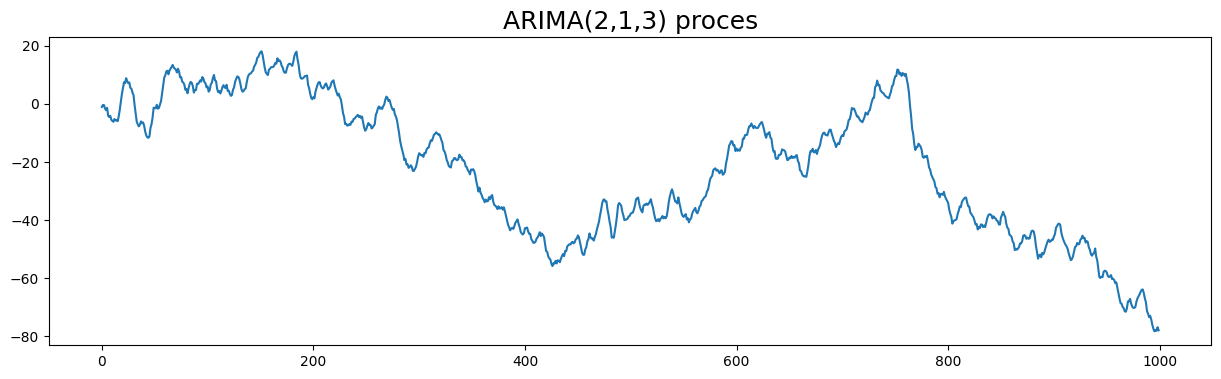

In [ ]:
#simuliranje ARIMA(2,1,3) procesa

#import statsmodels.tsa.api as smt
n = 1000
phi = np.array([0.5, -0.3])
theta = np.array([-0.2, 0.7, 0.1])
ar = np.r_[1, -phi]
ma = np.r_[1, theta]

np.random.seed(123)
arma213 = smt.arma_generate_sample(ar=ar, ma=ma, nsample=n)
arima213 = arma213.cumsum()

plt.figure(figsize=(15,4))
plt.plot(arima213)
plt.title('ARIMA(2,1,3) proces', fontsize=18)
plt.show()

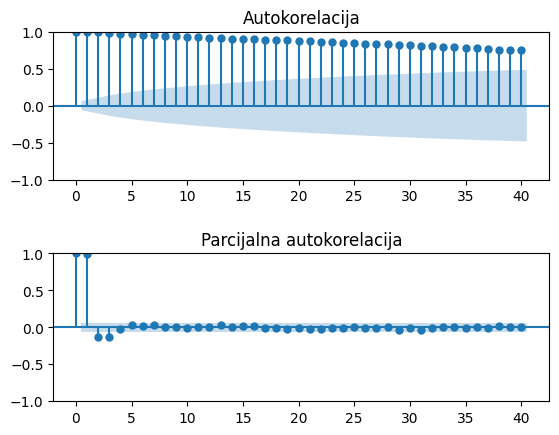

In [ ]:
#from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.subplot2grid((2, 1), (0, 0))
plot_acf(arima213, lags=40,ax=plt.gca())
plt.title('Autokorelacija')

plt.subplot2grid((2, 1), (1, 0))
plot_pacf(arima213, lags=40, ax=plt.gca())
plt.title('Parcijalna autokorelacija')

plt.subplots_adjust(hspace=0.5)

Sada ćemo fitat ARIMA(2,1,3) kako bi  procijenili  koeficijente modela te ćemo se uvjeriti da su blizu  simuliranim vrijednostima.

In [ ]:
mdl = smt.ARIMA(arima213, order=(2, 1,3)).fit()
print(mdl.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -1418.150
Date:                Tue, 30 Jan 2024   AIC                           2848.299
Time:                        09:40:07   BIC                           2877.740
Sample:                             0   HQIC                          2859.489
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4706      0.159      2.964      0.003       0.159       0.782
ar.L2         -0.2363      0.085     -2.779      0.005      -0.403      -0.070
ma.L1         -0.1452      0.160     -0.908      0.3

Možemo prijetiti da interval pouzdanosti od $95\%$ sadrži stvarne vrijednosti.

## ARIMA na SLB podatcima

Pronađimo najbolji red modela ARIMA(p,d,q) uz pomoć informacijskog kriterija AIC te uz ograničenje   $p \leq 5, d \leq 3, q \leq 5$.

In [ ]:
# Postavljanje frekvencije na dnevnu
#SLB_povrati.index = pd.date_range(start=SLB_povrati.index.min(), end=SLB_povrati.index.max(), freq='D')

In [ ]:
#-podjela skupa na skup za treniranje i testiranje

#train_end = datetime(2023,9,1)
#test_end = datetime(2023,12,1)
#train_data = SLB_povrati[:train_end]
#test_data = SLB_povrati[train_end + timedelta(days=1):test_end]

In [ ]:
#odabir najmanjeg AIC

best_aic = np.inf
best_order = None
best_model = None

rng = range(6)
rngg = range(4)
for i in rng:
   for j in rngg:
      for k in rng:
          try:
              model = ARIMA(train_data, order=(i,j,k))
              model_fit = model.fit()
              model_aic=model_fit.aic

              print(f"ARMA({i}, {j},{k}) - AIC: {model_aic}")

              if model_aic<best_aic:
                best_aic=model_aic
                best_order=(i,j,k)
                best_model=model_fit
          except: continue


print('Najbolji: AIC: %6.5f | red: %s'%(best_aic, best_order))

ARMA(0, 0,0) - AIC: -26662.508439773464
ARMA(0, 0,1) - AIC: -26743.84977376514
ARMA(0, 0,2) - AIC: -26793.579584264353
ARMA(0, 0,3) - AIC: -26939.86916995437
ARMA(0, 0,4) - AIC: -26945.49666484029
ARMA(0, 0,5) - AIC: -26943.84129928136
ARMA(0, 1,0) - AIC: -22491.684353981145
ARMA(0, 1,1) - AIC: -26599.52778843773
ARMA(0, 1,2) - AIC: -26728.898769288015
ARMA(0, 1,3) - AIC: -26777.87463281384
ARMA(0, 1,4) - AIC: -26924.89671263606
ARMA(0, 1,5) - AIC: -26908.404435784527
ARMA(0, 2,0) - AIC: -16629.423987834136
ARMA(0, 2,1) - AIC: -22474.532067560012
ARMA(0, 2,2) - AIC: -26601.888217885586
ARMA(0, 2,3) - AIC: -26683.776819396713
ARMA(0, 2,4) - AIC: -26729.64019788982
ARMA(0, 2,5) - AIC: -26268.435517770675
ARMA(0, 3,0) - AIC: -10420.387253024266
ARMA(0, 3,1) - AIC: -16614.346555670287
ARMA(0, 3,2) - AIC: -22398.86165068437
ARMA(0, 3,3) - AIC: -26373.632448634635
ARMA(0, 3,4) - AIC: -26314.353372820326
ARMA(0, 3,5) - AIC: -26457.50898726102
ARMA(1, 0,0) - AIC: -26755.328430399197
ARMA(1, 0,

 Najbolji model za skup podataka SLB_povrati je ARIMA(1,0,3) odnosno ARMA(1,3) koji je već implementiran. Nije neobično da je d najboljeg modela jednak 0 jer radimo sa povratima, a ne sa cijenama (računajući povrat napravili smo diferenciju).

# ARCH i GARCH proces

Primjer:\
Želimo modelirati broj kino karata koje ćemo prodavati svaki tjedan.
Fitamo najbolji mogući model za naše podatke. Nacrtamo greške predviđanja.
Ako se npr. dogodi da početkom i krajem svake godine imamo malu volatilnost, a sredinom jako veliku to znači da sredinom svake godine naš model napravi loše predviđanje. Mi nismo gotovi s našim modelom jer postoji uzorak sredinom svake godine kojeg možemo "uhvatiti" tj. uračunati kako bi model bio još bolji. Dakle, uzimat ćemo u obzir i volatilnost vremenskog niza za predviđanje sljedeće vrijednosti. Ako je vremenski niz jako volatilan danas vjerojatno će takav biti i sutra. To nas dovodi do ARCH i GARCH modela.

<br>

ARIMA modeli često ne uspijevaju opisati neki vremenski niz, a razlog tome su razdoblja povećane volatilnosti. Ako npr. nastupi neočekivana financijska kriza tada će cijene dionica biti jako nepredvidljive. U tom slučaju je varijanca povećana u odnosu na ostala razmatranja i u sljedećim danima ova pojava se nastavlja tj. dolazi do takozvane uvjetne heteroskedastičnosti.

<br>

Neka je $ x=(x_n, n \in \mathbb{N})$ slučajan proces. $x$ je **autoregresivan uvjetno heteroskedastičan proces (ARCH(p))** ako varijance grešaka tvore AR(p) proces.

Prirodno poopćenje je GARCH proces.

Neka je $ x=(x_n, n \in \mathbb{N})$ slučajan proces. $x$ je **generaliziran autoregresivan uvjetno heteroskedastičan proces (GARCH(p,q))** ako varijance grešaka tvore ARMA(p,q) proces.



## simulacija GARCH(1,1)

GARCH(1,1) model  definiran je kao:

$$ y_t= \varepsilon_t \cdot \sqrt{ \omega + α_1 \cdot y_{t-1}^2  + β_1 \cdot σ_{t-1}^2 } $$
$$\varepsilon_t \sim N(0,1), \sigma_0 = 1, y_0 \sim N(0,1) $$

Simulirajmo GARCH(1,1):


$$ y_t= \varepsilon_t \cdot \sqrt{ 0.5 + 0.1\cdot y_{t-1}^2  + 0.4 \cdot σ_{t-1}^2 } $$

In [ ]:
!pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.0/983.0 kB 5.6 MB/s eta 0:00:00


In [ ]:
from arch import arch_model

In [ ]:
n = 1000
omega=0.5
alpha_1 = 0.1
beta_1 = 0.4
np.random.seed(1)

series = [np.random.normal(size=1)]
vols = [1]

for _ in range(n):
    new_vol = np.sqrt(omega + alpha_1*series[-1]**2  + beta_1*vols[-1]**2 )
    new_val = np.random.normal(size=1) * new_vol

    vols.append(new_vol)
    series.append(new_val)

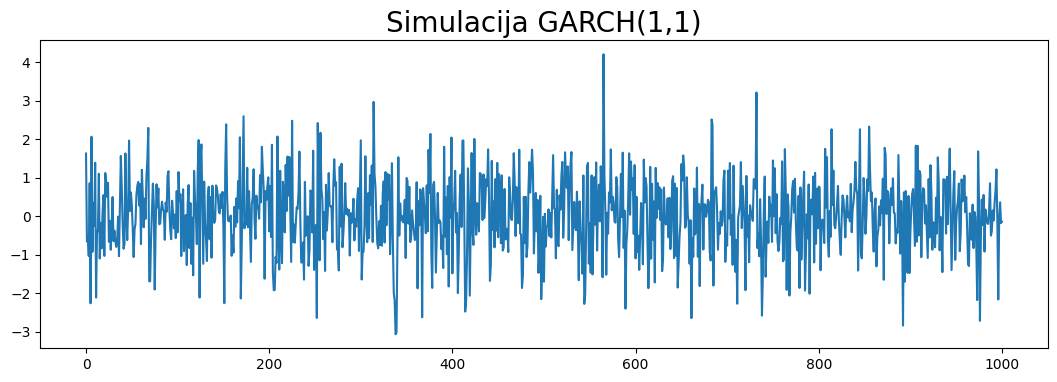

In [ ]:
plt.figure(figsize=(13,4))
plt.plot(series)
plt.title('Simulacija GARCH(1,1)', fontsize=20)
plt.show()

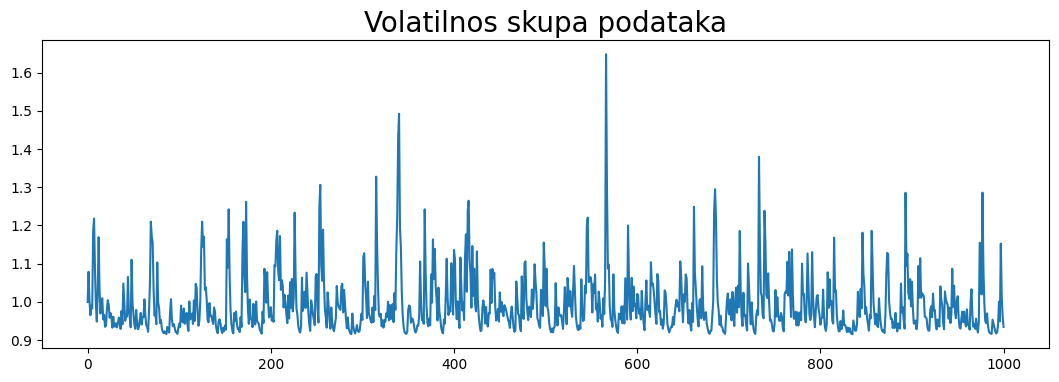

In [ ]:
plt.figure(figsize=(13,4))
plt.plot(vols)
plt.title('Volatilnos skupa podataka', fontsize=20)
plt.show()

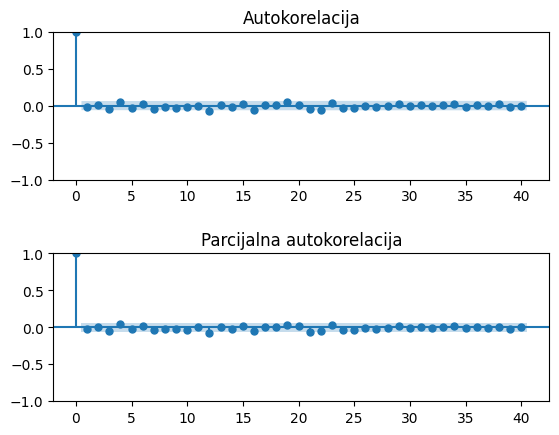

In [ ]:
#from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.subplot2grid((2, 1), (0, 0))
plot_acf(series, lags=40,ax=plt.gca())
plt.title('Autokorelacija')

plt.subplot2grid((2, 1), (1, 0))
plot_pacf(series, lags=40, ax=plt.gca())
plt.title('Parcijalna autokorelacija')

plt.subplots_adjust(hspace=0.5)

Jedan od izazova kod promatranja uvjetno heteroskedastičnog vremenskog niza jest to što se ACF plotovi zbog velike volatilnosti mogu činiti poput realizacije bijelog šuma. \

Pogledajmo ACF i PACF plotove vremenskog niza vols.

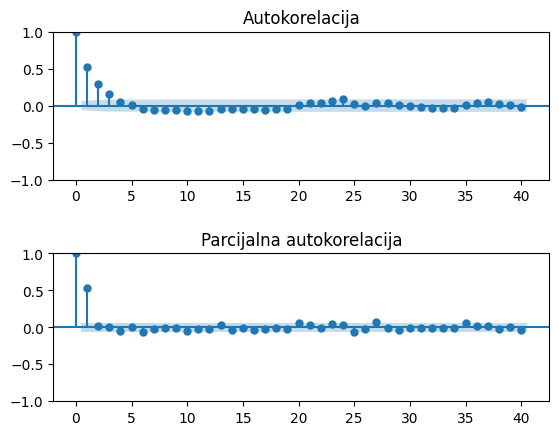

In [ ]:
#from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.subplot2grid((2, 1), (0, 0))
plot_acf(vols, lags=40,ax=plt.gca())
plt.title('Autokorelacija')

plt.subplot2grid((2, 1), (1, 0))
plot_pacf(vols, lags=40, ax=plt.gca())
plt.title('Parcijalna autokorelacija')

plt.subplots_adjust(hspace=0.5)

 ACF i PACF  plotovi ukazuju da bi ARMA(1,1) model za varijancu mogao biti prikladan.

Fitajmo GARCH(1,1) na simuliranim podatcima series.

In [ ]:
am = arch_model(series)
res = am.fit()
print(res.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3535.9017880342353
Iteration:      2,   Func. Count:     14,   Neg. LLF: 1388630.5156615484
Iteration:      3,   Func. Count:     21,   Neg. LLF: 1426.3027936848616
Iteration:      4,   Func. Count:     27,   Neg. LLF: 1641.1022146946475
Iteration:      5,   Func. Count:     35,   Neg. LLF: 1393.0468819996217
Iteration:      6,   Func. Count:     41,   Neg. LLF: 1391.0966361117287
Iteration:      7,   Func. Count:     46,   Neg. LLF: 1391.0965690189655
Iteration:      8,   Func. Count:     51,   Neg. LLF: 1391.0965682654564
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1391.0965682654564
            Iterations: 8
            Function evaluations: 51
            Gradient evaluations: 8
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squ

Možemo vidjeti da svi pravi parametri spadaju unutar odgovarajućih intervala pouzdanosti.

## ARIMA + GARCH na SLB podatcima

Odredili smo da ARIMA(1,0,3) najbolje fita naše podatke.\
Koristit ćemo GARCH(1,1) proces za predviđanje volatilnosti tj. koliko su skokoviti povrati dionice SLB tijekom vremena.

Text(0.5, 1.0, 'SLB Returns')

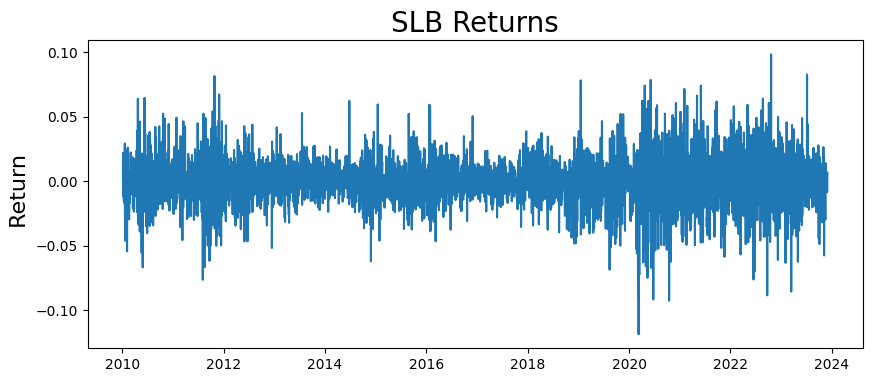

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(SLB_povrati)
plt.ylabel(' Return', fontsize=16)
plt.title('SLB Returns', fontsize=20)

Naš vremenski niz SLB_povrati je dobar  kandidat za GARCH model jer  imamo periode  veće i manje volatilnosti.


In [ ]:
#from arch import arch_model

In [ ]:
#-podjela skupa na skup za treniranje i testiranje

#train_end = datetime(2023,9,1)
#test_end = datetime(2023,12,1)
#train_data = SLB_povrati[:train_end]
#test_data = SLB_povrati[train_end + timedelta(days=1):test_end]

In [ ]:
start = time()
predictions_rolling_ARMA13 = pd.Series(dtype='float64')
predictions_rolling_GARCH11 = pd.Series(dtype='float64')

for kraj in test_data.index:
    print(kraj - timedelta(days=1))
    train_data = SLB_povrati.loc[:kraj - timedelta(days=1)]

    # ARIMA model
    model_ARMA13 = ARIMA(train_data, order=(1, 0, 3))
    model_ARMA13_fit = model_ARMA13.fit()
    pred_ARMA13 = model_ARMA13_fit.forecast(steps=1)[0]
    predictions_rolling_ARMA13.loc[kraj] = pred_ARMA13

    # GARCH model
    residuals_ARMA13 = model_ARMA13_fit.resid
    model_GARCH11 = arch_model(residuals_ARMA13, vol='Garch', p=1, q=1)
    model_GARCH11_fit = model_GARCH11.fit(disp='off')
    ppGARCH = model_GARCH11_fit.forecast(horizon=1).variance.values[-1, :][0]

    predictions_rolling_GARCH11.loc[kraj] = ppGARCH

end = time()
print("Potrebno vrijeme:", end - start)

2023-09-01 00:00:00
2023-09-02 00:00:00
2023-09-03 00:00:00
2023-09-04 00:00:00
2023-09-05 00:00:00
2023-09-06 00:00:00
2023-09-07 00:00:00
2023-09-08 00:00:00
2023-09-09 00:00:00
2023-09-10 00:00:00
2023-09-11 00:00:00
2023-09-12 00:00:00
2023-09-13 00:00:00
2023-09-14 00:00:00
2023-09-15 00:00:00
2023-09-16 00:00:00
2023-09-17 00:00:00
2023-09-18 00:00:00
2023-09-19 00:00:00
2023-09-20 00:00:00
2023-09-21 00:00:00
2023-09-22 00:00:00
2023-09-23 00:00:00
2023-09-24 00:00:00
2023-09-25 00:00:00
2023-09-26 00:00:00
2023-09-27 00:00:00
2023-09-28 00:00:00
2023-09-29 00:00:00
2023-09-30 00:00:00
2023-10-01 00:00:00
2023-10-02 00:00:00
2023-10-03 00:00:00
2023-10-04 00:00:00
2023-10-05 00:00:00
2023-10-06 00:00:00
2023-10-07 00:00:00
2023-10-08 00:00:00
2023-10-09 00:00:00
2023-10-10 00:00:00
2023-10-11 00:00:00
2023-10-12 00:00:00
2023-10-13 00:00:00
2023-10-14 00:00:00
2023-10-15 00:00:00
2023-10-16 00:00:00
2023-10-17 00:00:00
2023-10-18 00:00:00
2023-10-19 00:00:00
2023-10-20 00:00:00


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.




2023-10-31 00:00:00
2023-11-01 00:00:00
2023-11-02 00:00:00
2023-11-03 00:00:00
2023-11-04 00:00:00
2023-11-05 00:00:00
2023-11-06 00:00:00
2023-11-07 00:00:00
2023-11-08 00:00:00
2023-11-09 00:00:00
2023-11-10 00:00:00
2023-11-11 00:00:00
2023-11-12 00:00:00
2023-11-13 00:00:00
2023-11-14 00:00:00
2023-11-15 00:00:00
2023-11-16 00:00:00
2023-11-17 00:00:00
2023-11-18 00:00:00
2023-11-19 00:00:00
2023-11-20 00:00:00
2023-11-21 00:00:00
2023-11-22 00:00:00
2023-11-23 00:00:00
2023-11-24 00:00:00
2023-11-25 00:00:00
2023-11-26 00:00:00
2023-11-27 00:00:00
2023-11-28 00:00:00
2023-11-29 00:00:00
2023-11-30 00:00:00
Potrebno vrijeme: 246.02977204322815


In [ ]:
predictions_rolling_GARCH11

2023-09-02    0.000176
2023-09-03    0.000170
2023-09-04    0.000164
2023-09-05    0.000161
2023-09-06    0.000156
                ...   
2023-11-27    0.000284
2023-11-28    0.000193
2023-11-29    0.000186
2023-11-30    0.000182
2023-12-01    0.000175
Length: 91, dtype: float64

In [ ]:
total_predictions = predictions_rolling_ARMA13 + predictions_rolling_GARCH11

Text(0, 0.5, 'povrat')

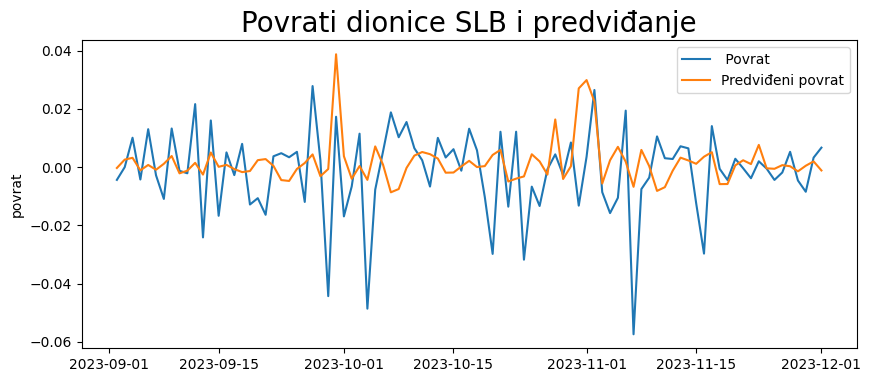

In [ ]:
#predvidena vs stvarna vrijednost
plt.figure(figsize=(10,4))
plt.plot(test_data)
plt.plot (total_predictions)
plt.legend ( (' Povrat ','Predviđeni povrat'), fontsize=10)
plt.title("Povrati dionice SLB i predviđanje",fontsize=20)
plt.ylabel ("povrat",fontsize=10)

In [ ]:
#from sklearn.metrics import mean_squared_error
mse=mean_squared_error(test_data,total_predictions )
print(f"Srednja kvadratna pogreška (MSE): {mse}")

Srednja kvadratna pogreška (MSE): 0.0002374118960658072


# Usporedba

Prikažimo sada na jednom grafu stvarne povrate te predviđene uz pomoć AR(1), MA(1), ARMA(1,3) i ARIMA(1,0,3)+GARCH(1,1)

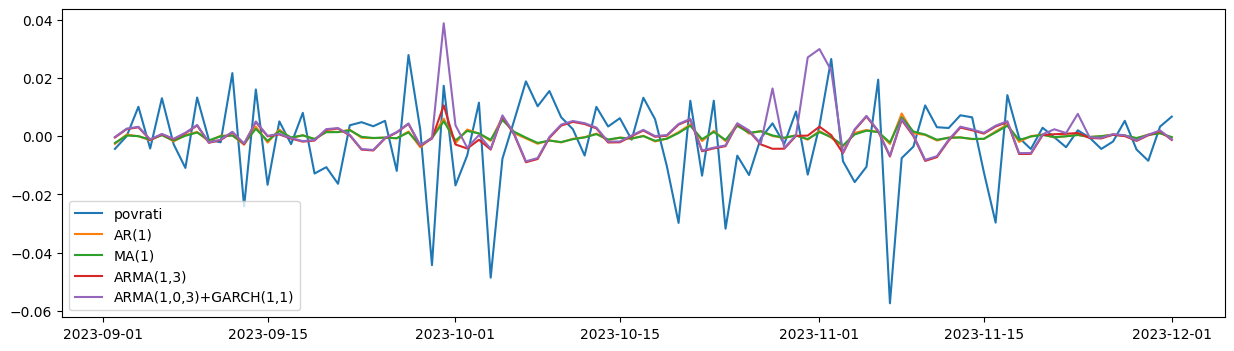

In [ ]:
plt.figure(figsize=(15,4))

plt.plot(test_data,label='povrati')
plt.plot(test_data_AR1_pred_rolling_najbolji["predvidanje_rolling_AR1"], label='AR(1)')
plt.plot(test_data_MA1_pred_rolling_najbolji["predvidanje_rolling_MA1"], label='MA(1)')
plt.plot(test_data_ARMA13_pred_rolling_najbolji["ARMA13_pred_rolling"], label='ARMA(1,3)')
plt.plot(total_predictions, label='ARMA(1,0,3)+GARCH(1,1)')
plt.legend()

plt.show()

AR(1)  -- Srednja kvadratna pogreška (MSE): 0.0002087909174307028 \
MA(1) -- Srednja kvadratna pogreška (MSE): 0.00020946053279922284 \
ARMA(1,3) -- Srednja kvadratna pogreška (MSE): 0.00021280011805027875\
ARMA(1,0,3) + GARCH(1,1) --Srednja kvadratna pogreška (MSE): 0.0002374118960658072

# Simuliranje kupovine i prodaje dionica SLB uz pomoć ARMA(p,q)

Prvo ćemo napraviti simulaciju gdje ćemo svaki dan nasumično odlučivati hoćemo li kupiti dionicu ili ne, ako smo je kupili sljedeći dan je prodajemo neovisno o njenoj cijeni. Zatim ćemo napravit simulaciju kupovine i prodaje dionica SLB uz pomoć ARMA(p,q).
Svaki dan ćemo predviđati povrat za sljedeći dan s ARMA(p,q) modelom i ako je taj predviđeni povrat veći od određene granice koju postavimo onda kupujemo dionicu i odmah je idući dan prodajemo.

In [ ]:
#from statsmodels.tsa.arima.model import ARIMA
#from statsmodels.tools.sm_exceptions import ValueWarning, HessianInversionWarning, ConvergenceWarning
#import warnings
#warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
from tqdm import tqdm #za prikazivanje napretka petlje

In [ ]:
def run_simulation(returns, prices, amt, order, thresh, verbose=False, plot=True):
    if type(order) == float:
        thresh = None

    curr_holding = False     #Postavljanje varijabli za praćenje trenutnog vlasništva (curr_holding),
                             #liste događaja (events_list) i početnog iznosa (init_amt).
    events_list = []
    init_amt = amt


    for date, r in tqdm (returns.items(), total=len(returns.iloc[14:])): #Petlja koja prolazi kroz datume i povrate, počevši od 15. dana kako bi se izbjegle početne vrijednosti koje mogu biti nedostajuće ili nedefinirane.


        if curr_holding:            #Ako trenutno držite dionicu, prodajte je
                                    #izračunava se stvarni povrat na osnovu cijene prodaje i cijene kupnje.
            sell_price = prices.loc[date]
            curr_holding=False
            ret = (sell_price-buy_price)/buy_price
            amt *= (1+ret)
            events_list.append(('s', date, ret))

            if verbose:
                print('Sold at $%s'%sell_price)
                print('Predicted Return: %s'%round(pred,4))
                print('Actual Return: %s'%(round(ret, 4)))
                print('=======================================')
            continue

        #get data til just before current date
        curr_data = returns[:date]
        #print(curr_data)
        if type(order) == tuple:       #Ako je redoslijed tipa tuple, pokušava se prilagoditi ARIMA model i dobiti prognozu.
            try:
                #fit model
                model = ARIMA(curr_data, order=order).fit()

                #get forecast
                pred = model.predict()[0]
                #print(pred)

            except Exception as e:

                pred = thresh - 1
                print("Greška pri prilagodbi modela ili dobivanju prognoze:", str(e))

        #Ako trenutno nije u vlasništvu dionica i ispunjeni su određeni uvjeti, kupite dionicu.
        #if you predict a high enough return and not holding, buy stock
        if (not curr_holding) and \
        ((type(order) == float and np.random.random() < order)
         or (type(order) == tuple and pred > thresh)
         or (order == 'last' and curr_data[-1] > 0)):

            curr_holding = True
            buy_price = prices.loc[date]
            events_list.append(('b', date))
            if verbose:
                print('Bought at $%s'%buy_price)


    #Ako je postavljena opcija za ispis (verbose), ispisuje se ukupni iznos.
    if verbose:
        print('Total Amount: $%s'%round(amt,2))

    #graph
    if plot:

        plt.figure(figsize=(10,4))
        plt.plot(prices)

        y_lims = (int(prices.min()*.95), int(prices.max()*1.05))
        shaded_y_lims = int(prices.min()*.5), int(prices.max()*1.5)

        for idx, event in enumerate(events_list):
            plt.axvline(event[1], color='k', linestyle='--', alpha=0.4)
            if event[0] == 's':
                color = 'green' if event[2] > 0 else 'red'
                plt.fill_betweenx(range(*shaded_y_lims),
                                  event[1], events_list[idx-1][1], color=color, alpha=0.1)

        tot_return = round(100*(amt / init_amt - 1), 2)
        tot_return = str(tot_return) + '%'
        plt.title("%s Price Data\nThresh=%s\nTotal Amt: $%s\nTotal Return: %s"%("SLB", thresh, round(amt,2), tot_return), fontsize=20)
        plt.ylim(*y_lims)
        plt.show()

    return amt

In [ ]:
SLB_dataset_Close_2023=SLB_dataset_Close_svi_datumi_nadopunjeno[SLB_dataset_Close_svi_datumi_nadopunjeno.index.year==2023]

In [ ]:
SLB_dataset_Close_2023["povrati"]= np.log(SLB_dataset_Close_2023["Close"]).diff()

In [ ]:
SLB_dataset_Close_2023=SLB_dataset_Close_2023[1:]

Ako nasumično kupujemo:

334it [00:00, 14724.13it/s]            


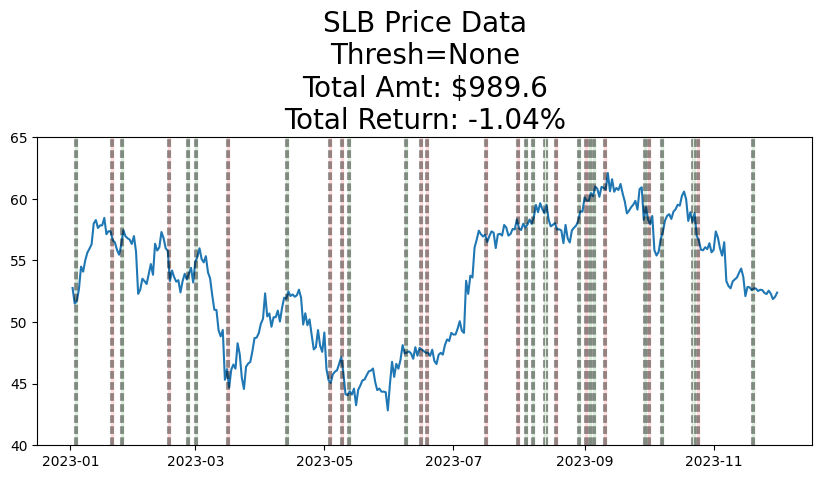

989.5978091111776

In [ ]:
run_simulation(SLB_dataset_Close_2023.povrati, SLB_dataset_Close_2023.Close, 1000, 0.1, None, verbose=False, plot=True)

Pogledajmo prosjek 1000 ovakvih nasumičnih kupovanja:

In [ ]:
final_amts = [run_simulation(SLB_dataset_Close_2023.povrati, SLB_dataset_Close_2023.Close, 100, 0.5, None, verbose=False, plot=False) for _ in range(1000)]

334it [00:00, 14068.49it/s]            
334it [00:00, 15739.01it/s]            
334it [00:00, 16621.95it/s]            
334it [00:00, 16006.60it/s]            
334it [00:00, 16022.34it/s]            
334it [00:00, 16188.42it/s]            
334it [00:00, 15810.59it/s]            
334it [00:00, 15530.50it/s]            
334it [00:00, 15712.70it/s]            
334it [00:00, 15730.35it/s]            
334it [00:00, 15517.60it/s]            
334it [00:00, 15991.43it/s]            
334it [00:00, 16477.66it/s]            
334it [00:00, 14427.67it/s]            
334it [00:00, 15668.24it/s]            
334it [00:00, 16280.61it/s]            
334it [00:00, 15473.55it/s]            
334it [00:00, 14752.97it/s]            
334it [00:00, 15153.36it/s]            
334it [00:00, 14443.28it/s]            
334it [00:00, 13999.32it/s]            
334it [00:00, 15493.40it/s]            
334it [00:00, 15664.04it/s]            
334it [00:00, 15874.01it/s]            
334it [00:00, 15187.69it/s]            


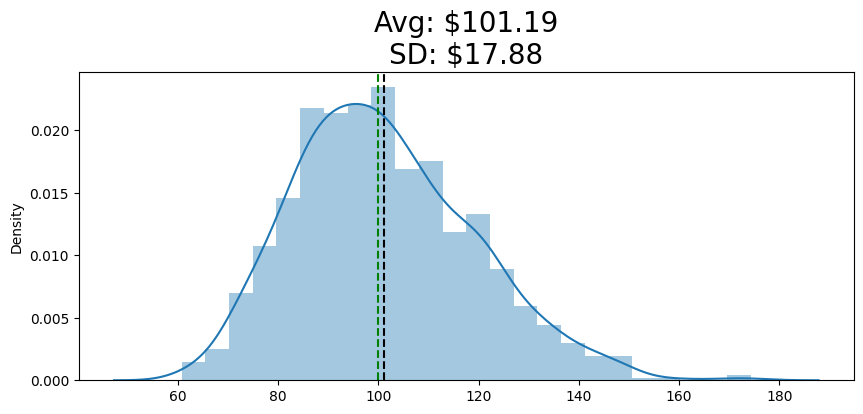

In [ ]:
plt.figure(figsize=(10,4))
sns.distplot(final_amts)
plt.axvline(np.mean(final_amts), color='k', linestyle='--')
plt.axvline(100, color='g', linestyle='--')
plt.title('Avg: $%s\nSD: $%s'%(round(np.mean(final_amts),2), round(np.std(final_amts),2)), fontsize=20)
plt.show()

Dakle počeli smo s $100\$$, a u prosijeku imamo $101.19\$$.

Kupujemo ako je zadnji povrat bio pozitivan i odmah nakon toga prodajemo:

334it [00:00, 14254.58it/s]            


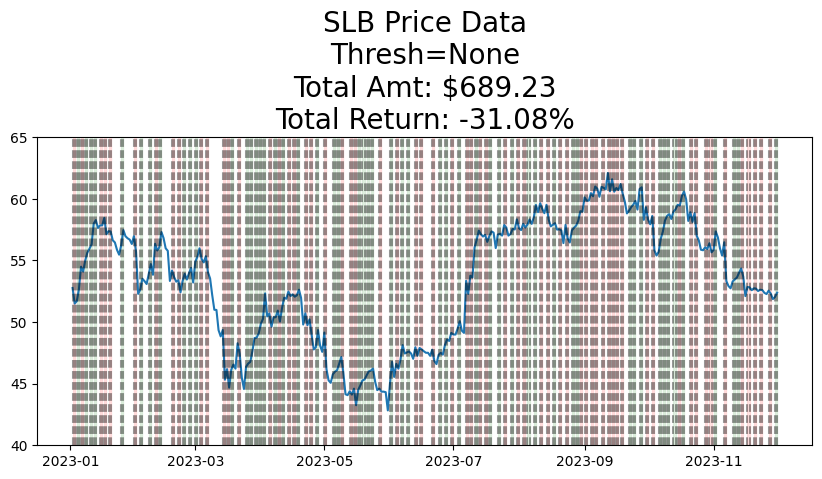

689.2251407385176

In [ ]:
run_simulation(SLB_dataset_Close_2023.povrati, SLB_dataset_Close_2023.Close, 1000, 'last', None, verbose=False,plot=True)

Gubimo novac.

Isprobajmo još uz pomoć  AR(1), MA(1), ARMA(1,3) modela predvidjeti povrat sljedeći dan i onda ako je povrat veći od postavljene granice kupiti dionicu i sljedeći dan je odmah  prodati.
Hoćemo li uspjeti nešto zaraditit?

  1%|          | 2/320 [00:00<00:20, 15.40it/s]

Greška pri prilagodbi modela ili dobivanju prognoze: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)


334it [00:10, 33.02it/s]


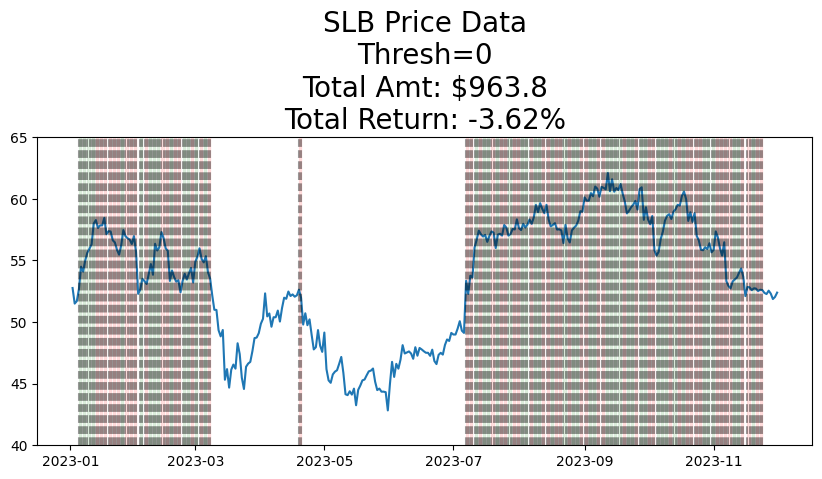

  1%|          | 2/320 [00:00<00:22, 13.84it/s]

Greška pri prilagodbi modela ili dobivanju prognoze: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)


334it [00:15, 22.02it/s]


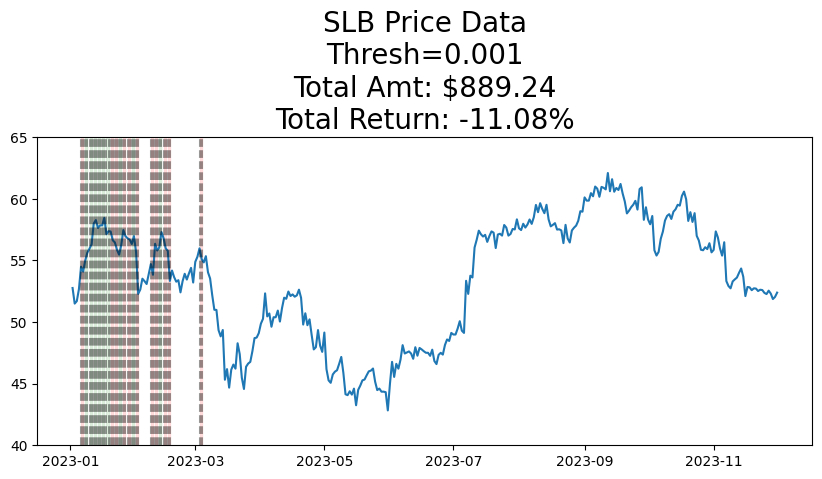

  1%|          | 2/320 [00:00<00:20, 15.34it/s]

Greška pri prilagodbi modela ili dobivanju prognoze: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)


334it [00:13, 24.98it/s]


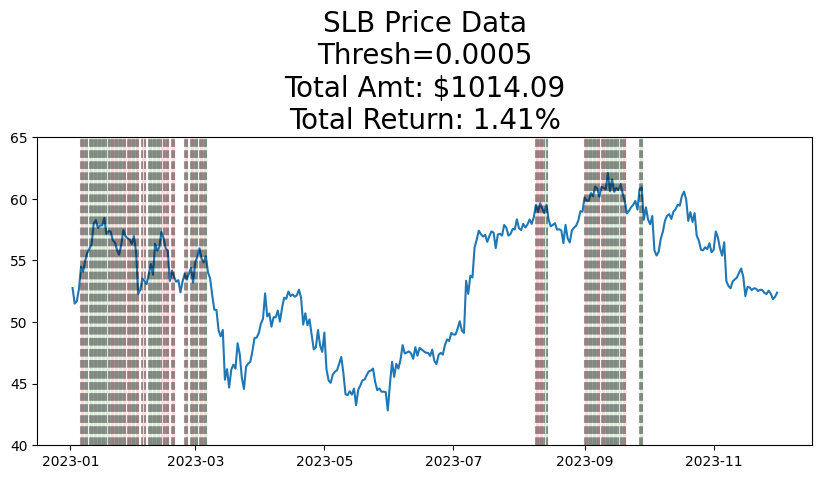

In [ ]:
for thresh in [0, 0.001, 0.0005]:
    run_simulation(SLB_dataset_Close_2023.povrati, SLB_dataset_Close_2023.Close, 1000, (1,0,0), thresh, verbose=False)

Ako povrat sljedeći dan predviđamo s AR(1) modelom i kupujemo dionicu samo ako je predviđeni povrat veći od 0.0005 uspijevamo zaraditi ($1.41\%$ povrat).

  1%|          | 3/320 [00:00<00:15, 20.22it/s]

Greška pri prilagodbi modela ili dobivanju prognoze: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)


334it [00:19, 17.02it/s]


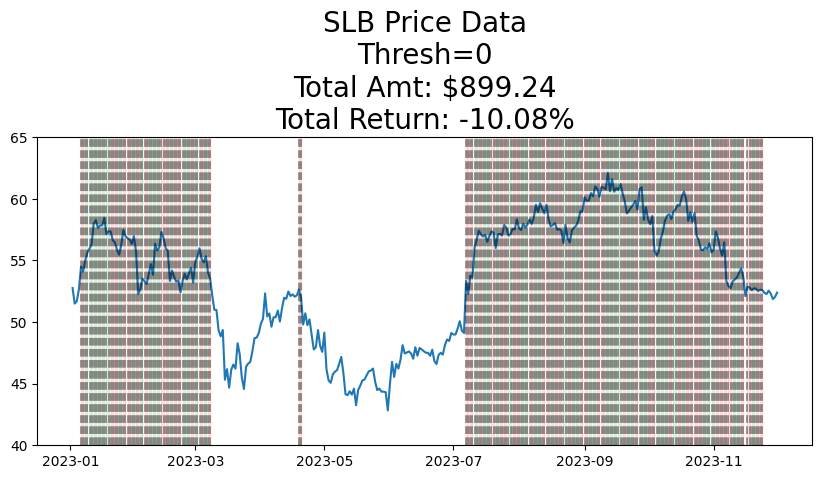

  1%|          | 3/320 [00:00<00:16, 19.51it/s]

Greška pri prilagodbi modela ili dobivanju prognoze: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)


334it [00:26, 12.66it/s]


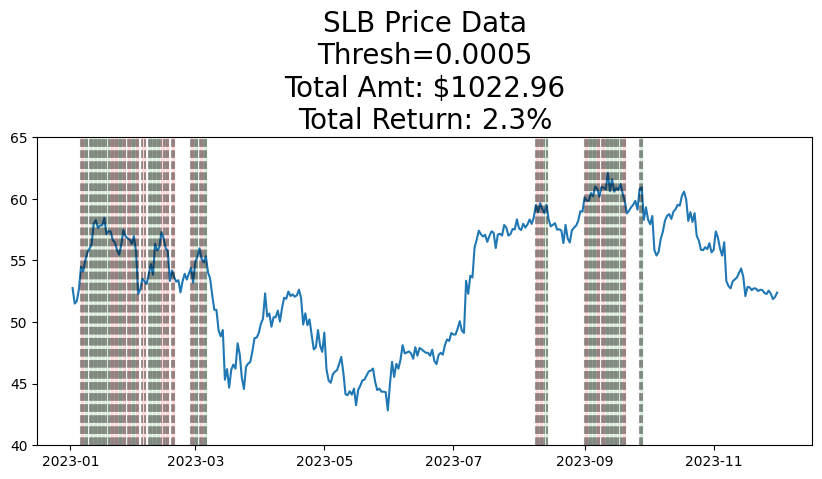

  1%|          | 3/320 [00:00<00:15, 21.10it/s]

Greška pri prilagodbi modela ili dobivanju prognoze: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)


334it [00:28, 11.56it/s]


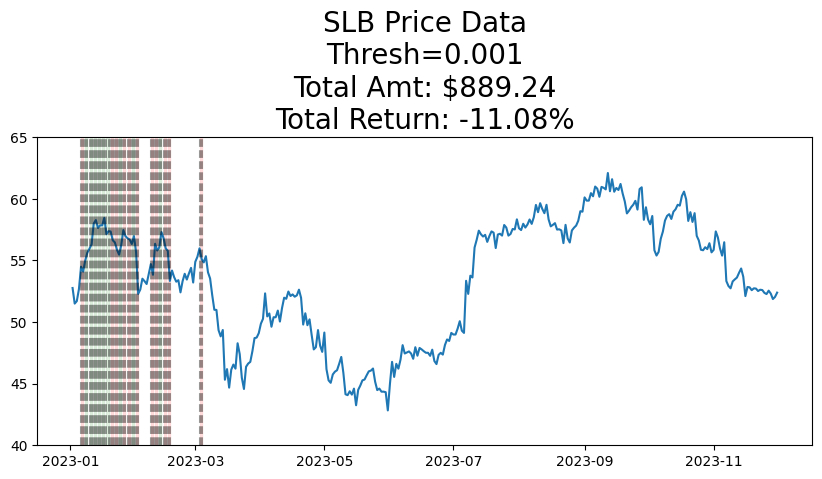

In [ ]:
for thresh in [0,0.0005, 0.001]:
    run_simulation(SLB_dataset_Close_2023.povrati, SLB_dataset_Close_2023.Close, 1000, (0,0,1), thresh, verbose=False)

Ako povrat sljedeći dan predviđamo s MA(1) modelom i kupujemo dionicu samo ako je predviđeni povrat veći od 0.0005 uspijevamo zaraditi ($2.3\%$ povrat).

  0%|          | 0/320 [00:00<?, ?it/s]

Greška pri prilagodbi modela ili dobivanju prognoze: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)


334it [00:57,  5.79it/s]


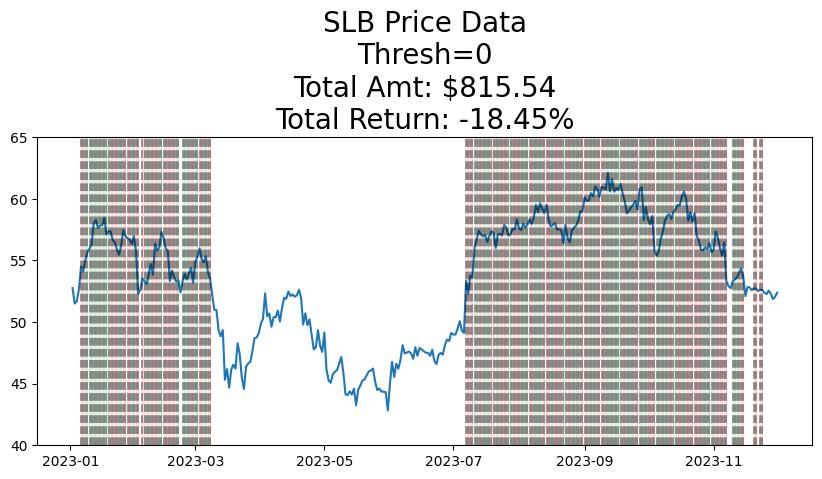

  0%|          | 0/320 [00:00<?, ?it/s]

Greška pri prilagodbi modela ili dobivanju prognoze: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)


334it [01:17,  4.33it/s]


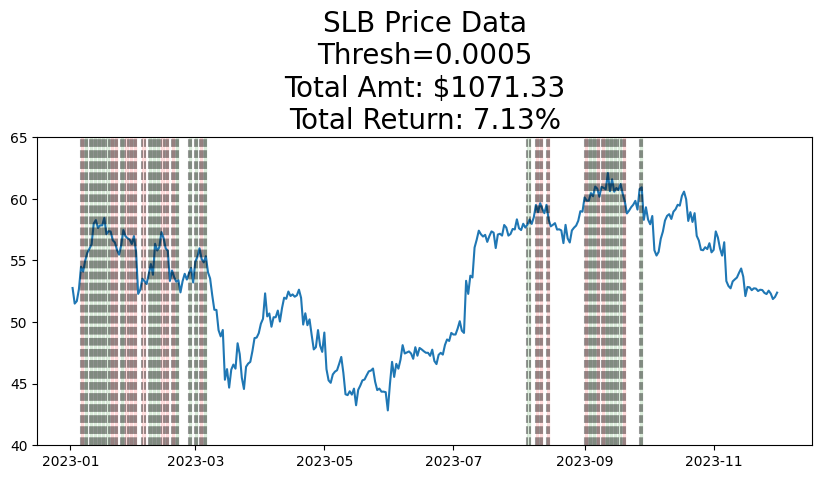

  0%|          | 0/320 [00:00<?, ?it/s]

Greška pri prilagodbi modela ili dobivanju prognoze: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)


334it [01:21,  4.10it/s]


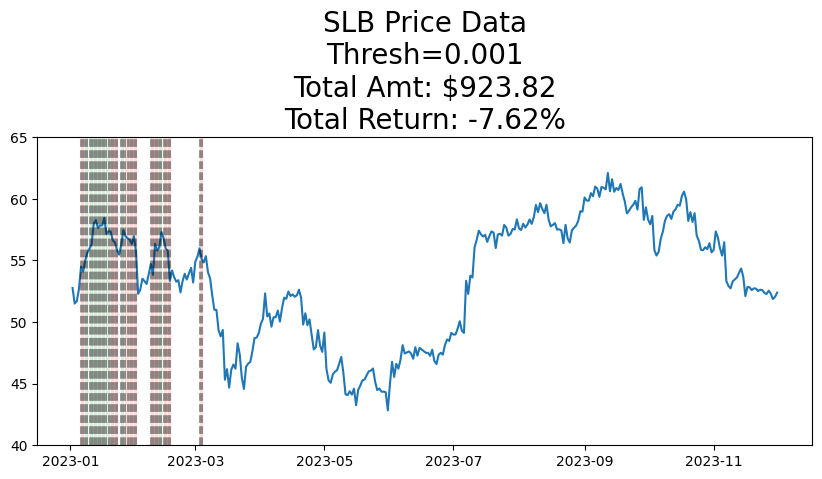

In [ ]:
for thresh in [0,0.0005, 0.001]:
    run_simulation(SLB_dataset_Close_2023.povrati, SLB_dataset_Close_2023.Close, 1000, (1,0,3), thresh, verbose=False)

Ako povrat sljedeći dan predviđamo s ARMA(1,3) modelom i kupujemo dionicu samo ako je predviđeni povrat veći od 0.0005 uspijevamo zaraditi ($7.13\%$ povrat). Ako kupujemo dionicu ako je predviđeni povrat veći od 0 gubimo čak $18.45\%$.

# Zaključak

 Procjena cijena dionica je izazovna zbog složenosti financijskih tržišta i različitih faktora koji utječu na cijene dionica. Financijska tržišta često pokazuju visoku razinu nepredvidljivosti i volatilnosti, što dodatno komplicira proces procjene. Stoga, iako se mogu primijeniti napredni matematički modeli poput ARIMA i GARCH za procjenu cijena dionica, njihova točnost i pouzdanost često je ograničena. Upravo zbog toga procjena cijena dionica ostaje izazovan zadatak za analitičare i investitore.

# Izvori:

https://www.youtube.com/watch?v=lyahjil8wYk \
https://www.youtube.com/watch?v=lObuM2O7wjY \
https://otexts.com/fpp3/what-can-be-forecast.html \
https://www.investopedia.com/terms/c/closingprice.asp \
https://www.researchgate.net/publication/330742498_Evaluation_of_statistical_and_machine_learning_models_for_time_series_prediction_Identifying_the_state-of-the-art_and_the_best_conditions_for_the_use_of_each_model \
https://otexts.com/fpp3/tspatterns.html \
https://www.hnb.hr/documents/20182/4535977/h-odabrane-teme-Uvod-u-analizu-vremenskih-nizova.pdf/4d8485df-2f0a-1b59-acba-eda537a8286d \
https://www.analyticsvidhya.com/blog/2021/10/end-to-end-introduction-to-handling-missing-values/ \
https://conferences.oreilly.com/strata/strata-ny-2019/cdn.oreillystatic.com/en/assets/1/event/300/Handling%20data%20gaps%20in%20time%20series%20using%20imputation%20Presentation.pdf \
https://www.geeksforgeeks.org/python-imputation-using-the-knnimputer/ \
https://www.hnb.hr/documents/20182/4535977/h-odabrane-teme-Uvod-u-analizu-vremenskih-nizova.pdf/4d8485df-2f0a-1b59-acba-eda537a8286d \
https://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/ \
https://medium.com/@ritusantra/stationarity-in-time-series-887eb42f62a9 \
https://www.youtube.com/watch?v=NuJMWEYSTXw&t=24s \
https://hex.tech/blog/stationarity-in-time-series/ \
https://www.analyticsvidhya.com/blog/2021/06/statistical-tests-to-check-stationarity-in-time-series-part-1/ \
https://towardsdatascience.com/what-is-a-time-series-unit-root-dba24fa099f4 \
https://www.youtube.com/watch?v=1opjnegd_hA \
https://www.hnb.hr/documents/20182/4535977/h-odabrane-teme-Uvod-u-analizu-vremenskih-nizova.pdf/4d8485df-2f0a-1b59-acba-eda537a8286d \
https://www.hnb.hr/documents/20182/4535977/h-odabrane-teme-Uvod-u-analizu-vremenskih-nizova.pdf/4d8485df-2f0a-1b59-acba-eda537a8286d \
https://www.youtube.com/watch?v=McEN54l3EPU \
https://www.scribbr.com/statistics/akaike-information-criterion/ \
https://www.hnb.hr/documents/20182/4535977/h-odabrane-teme-Uvod-u-analizu-vremenskih-nizova.pdf/4d8485df-2f0a-1b59-acba-eda537a8286d \
https://www.baeldung.com/cs/random-walk \
https://github.com/Auquan/Tutorials/blob/master/Time%20Series%20Analysis%20-%201.ipynb \
https://www.investopedia.com/terms/r/randomwalktheory.asp \
https://dlsun.github.io/probability/random-walk.html \
https://www.youtube.com/watch?app=desktop&v=ouahL4HbwBE \
https://www.hnb.hr/documents/20182/4535977/h-odabrane-teme-Uvod-u-analizu-vremenskih-nizova.pdf/4d8485df-2f0a-1b59-acba-eda537a8286d \
https://www.statsmodels.org/dev/generated/statsmodels.tsa.arima_process.arma_generate_sample.html \
https://www.youtube.com/watch?v=kgBDQ3baESw \
https://github.com/ritvikmath/Time-Series-Analysis/blob/master/Model%20Selection.ipynb \
https://www.hnb.hr/documents/20182/4535977/h-odabrane-teme-Uvod-u-analizu-vremenskih-nizova.pdf/4d8485df-2f0a-1b59-acba-eda537a8286d \
https://www.hnb.hr/documents/20182/4535977/h-odabrane-teme-Uvod-u-analizu-vremenskih-nizova.pdf/4d8485df-2f0a-1b59-acba-eda537a8286d \
https://github.com/Auquan/Tutorials/blob/master/Time%20Series%20Analysis%20-%203.ipynb \
https://github.com/Auquan/Tutorials/blob/master/Time%20Series%20Analysis%20-%204.ipynb \
https://www.youtube.com/watch?v=xg2-9DhE5vc&list=PLvcbYUQ5t0UHOLnBzl46_Q6QKtFgfMGc3&index=18 \


